#  Machine Learning project
## Election Exit Poll Prediction and U.S.A Presidential Speech Analysis using Machine Learning

## Packages Used:

In [1]:
# General
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
# Classification Models 
# Preprocessing
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Splitting and Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Evaulation Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
# Text Analytics
import re
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import inaugural
from collections import Counter
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [4]:
# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Problem 1 - Classification Models:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## Dataset Background:
- To create an exit poll on behalf of news channel CNBE that will help in predicting overall win and seats covered by a particular party: **'Conservative'** or **'Labour'** Party.
- Here the classification will be done using different classification models and finally these models are to be compared.

## Data Dictionary of the Dataset:
The description of the attributes present in the dataset are given below:
1. **vote :** The choice of Party either Conservative or Labour. This is the Target or Dependent variable.
2. **age :** The age of the voters in years.
3. **economic.cond.national :** Assessment of current national economic conditions, rated on a scale of 1 to 5.
4. **economic.cond.household :** Assessment of current household economic conditions, rated on a scale of 1 to 5.
5. **Blair :**  Assessment of the Labour leader, rated on a scale of 1 to 5.
6. **Hague :**  Assessment of the Conservative leader, rated on a scale of 1 to 5.
7. **Europe :** An 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment. 
8. **political.knowledge :** Knowledge of parties' positions on European integration, on a scale of 0 to 3. 
9. **gender :** Whether the voter is a female or male.

## Inferences from the Data Dictionary:
- There are 9 variables out of which the 'vote' variable is the dependent variable and the rest are independent variables.
- Among the independent variables, except for 'age' variable which is continuous, all the other seven variables are categorical type.
- Among the categorical independent variables, except for 'gender' all the others are ordered categorical variables.

## Data Ingestion:

## Loading the Dataset as a DataFrame:

In [6]:
election_excel = pd.ExcelFile('Election_Data.xlsx') 
election = pd.read_excel(election_excel, 'Election_Dataset_Two Classes')

In [7]:
printmd('**Viewing the top 5 rows of dataset :**')
election.head()

**Viewing the top 5 rows of dataset :**

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [8]:
printmd('**Viewing the bottom 5 rows of dataset :**')
election.tail()

**Viewing the bottom 5 rows of dataset :**

Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

## Inferences:
- All values are properly loaded.
- The column with the serial numbers is also loaded with 'Unnamed: 0' as the column name. It is dropped as it has no use in the classification models. Moreover the index number could be considered as the serial identification if a particular voter is to be referenced.

## Dropping the Serial Number column:

In [9]:
election.drop('Unnamed: 0', axis = 1, inplace =True)
printmd('**The column names after dropping the column with serial numbers:**')
election.columns

**The column names after dropping the column with serial numbers:**

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [10]:
printmd('**Viewing the top 5 rows of dataset after dropping the column with serial numbers:**')
election.head()

**Viewing the top 5 rows of dataset after dropping the column with serial numbers:**

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

## Inferences:
- The serial number column with column name 'Unnamed: 0' is dropped.

In [11]:
printmd('**Shape of the Dataset:**')
election.shape

**Shape of the Dataset:**

(1525, 9)

In [12]:
printmd('**Data types of the Dataset:**')
election.dtypes

**Data types of the Dataset:**

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [13]:
printmd('**Number of Null values for each variable:**')
election.isna().sum()

**Number of Null values for each variable:**

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [14]:
printmd('**Information of the Dataset:**')
election.info()

**Information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


## Inferences:
- The Dataset has 1525 rows and 9 columns of data.
- **There are no Null values present in the dataset.**
- Out of the 9 columns: 7 are 'int64' and 2 are 'object' data type.

## Checking for Duplicates:

In [15]:
printmd('**Total Number of Duplicate instances present in the dataset:**')
election.duplicated().sum()

**Total Number of Duplicate instances present in the dataset:**

8

In [16]:
printmd('**The Duplicate instances are:**')
election[election.duplicated() == True ]

**The Duplicate instances are:**

vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

## Inferences:
- There are 8 Duplicated instances.
- These are voter attributes and two or more voters with the all the attributes same does not seem to be logical and hence they are considered to be duplicates and are dropped.

## Deleting the duplicate instances from the dataset:
- The duplicates are deleted first so that it does not affect the description of the dataset.

In [17]:
election.drop_duplicates(inplace = True)
printmd('**Total Number of Duplicate instances in the dataset after dropping them:**')
election.duplicated().sum()

**Total Number of Duplicate instances in the dataset after dropping them:**

0

In [18]:
printmd('**Shape of the Dataset after dropping the duplicate instances:**')
election.shape

**Shape of the Dataset after dropping the duplicate instances:**

(1517, 9)

## Inference:
- The duplicate instances are deleted. Now we have 1517 instances present in the dataset.

## Data Description:

## Numerical:

In [19]:
printmd('**Describing the Numerical Variables:**')
num_vars = list(election.describe().columns)
ordered_vars = list(election.describe().columns)
ordered_vars.remove('age')
election.describe().T

**Describing the Numerical Variables:**

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic.cond.national   1517.0   3.245221   0.881792   1.0   3.0   3.0   4.0   
economic.cond.household  1517.0   3.137772   0.931069   1.0   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political.knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

## Inferences:
- 'age' variable is expected to be not skewed as mean and median values are nearly same. The minimum age of surveyed voter is 24 and maximum is 93.
- The ordered categorical variables are also observed.
- Two lists are created:
    - num_vars: It contains all the column names which have numerical values.
    - ordered_vars: It contains all the column names that are ordered categorical variables.

## Categorical:

In [20]:
printmd('**Describing the Nominal variables :**')
cat_vars = list(election.describe(include = 'object').columns)
all_cat_vars = cat_vars + ordered_vars
ind_cat_vars = list('gender'.split(" "))  + ordered_vars
election.describe(include = 'object').T

**Describing the Nominal variables :**

count unique     top  freq
vote    1517      2  Labour  1057
gender  1517      2  female   808

## Inferences:
- Among the voters surveyed most of them voted for 'Labour' Party.
- Two lists are created:
    - cat_vars: It contains all the column names which have categories.
    - all_cat_vars: It contains all the categorical variable names both ordered and nominal.
    - ind_cat_vars: It contains the independent categorical variable names both ordered and nominal.

In [21]:
printmd('**The count of the ordered and Nominal Categorical Variables:**')
for i in all_cat_vars:
    print('The count of categories in ' + str(i) + ' :')
    print(election[i].value_counts())
    print('')

**The count of the ordered and Nominal Categorical Variables:**

The count of categories in vote :
Labour          1057
Conservative     460
Name: vote, dtype: int64

The count of categories in gender :
female    808
male      709
Name: gender, dtype: int64

The count of categories in economic.cond.national :
3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

The count of categories in economic.cond.household :
3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

The count of categories in Blair :
4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

The count of categories in Hague :
2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

The count of categories in Europe :
11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

The count of categories in political.knowledge :
2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64



In [22]:
printmd('**The percentage count of the ordered and Nominal Categorical Variables:**')
for i in all_cat_vars:
    print('The percentage of categories in ' + str(i) + ' :')
    print(round(election[i].value_counts('Normalize')*100,2))
    print('')

**The percentage count of the ordered and Nominal Categorical Variables:**

The percentage of categories in vote :
Labour          69.68
Conservative    30.32
Name: vote, dtype: float64

The percentage of categories in gender :
female    53.26
male      46.74
Name: gender, dtype: float64

The percentage of categories in economic.cond.national :
3    39.82
4    35.46
2    16.88
5     5.41
1     2.44
Name: economic.cond.national, dtype: float64

The percentage of categories in economic.cond.household :
3    42.52
4    28.68
2    18.46
5     6.06
1     4.28
Name: economic.cond.household, dtype: float64

The percentage of categories in Blair :
4    54.91
2    28.61
5    10.02
1     6.39
3     0.07
Name: Blair, dtype: float64

The percentage of categories in Hague :
2    40.67
4    36.72
1    15.36
5     4.81
3     2.44
Name: Hague, dtype: float64

The percentage of categories in Europe :
11    22.28
6     13.65
3      8.44
4      8.31
5      8.11
9      7.32
8      7.32
1      7.19
10     6.66
7      5.67
2      5.08
Name: Europe, dtype: float64

The percentage of

## Inferences:
- **The target variable 'vote' shows that 69.68% voters are in favour of the 'Labour' Party and 32.32%  in favour of 'Conservative' Party. From the modelling point of view, there is some class imbalance observed. We will observe the outputs of classification models to see this effect and consider if any treatment is required.**
- The percentage of male and female voters are nearly same with 53.26% female and 46.74% male. Thus there seems to be equal representation of the either gender.
- Most of the voters surveyed assessed the current national economic conditions on average scale with around 75% voters giving a ratings of 3 or 4. Only around 8% of surveyed voters gave extreme ratings of 5 or 1.
- Most of the voters surveyed assessed the current household economic conditions on average scale with around 71% voters giving a ratings of 3 or 4. Only around 10% of surveyed voters gave extreme ratings of 5 or 1.
- The Labour Party Leader 'Blair' received ratings of 4 or above by around 65% of the surveyed voters. 
- The Conservative Party Leader 'Hague' received ratings of 2 or below by around 56% of the surveyed voters.
- Around 22% of the surveyed voters highly disregard closer links between Britain and European Union, i.e. they rated the maximum (11) on the 'Eurosceptic' sentiment scale.
- Around 67.5% of the surveyed voters have some idea about the Labour and Conservative Party's positions on European integration. And the rest of the surveyed voters had no or little idea on this front.

# EDA:

## Univariate Analysis:

## Numerical Variables:

**Histogram Plots of the Variables:**

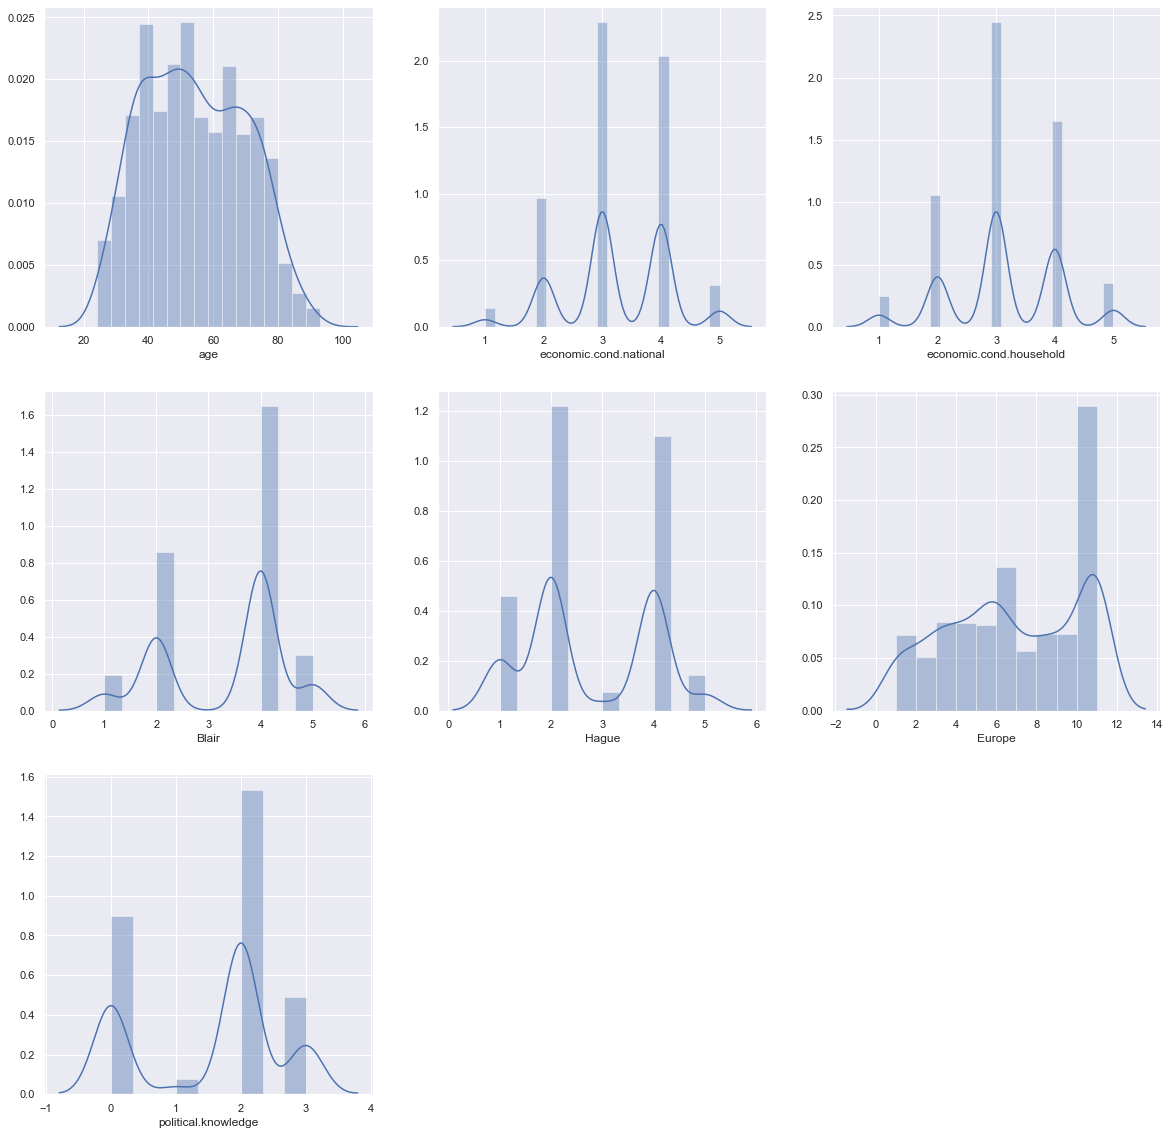

In [23]:
plt.figure(figsize=(20,20))
for i in range(0,7):
    plt.subplot(3,3,i+1)
    sns.distplot(election[num_vars[i]])
printmd('**Histogram Plots of the Variables:**')

## Inferences:
- In the 'age' variable it is observed that voters of all ages are taken in the survey with nearly equal representation of the different age groups. Although it may be noted that the number of higher and lower aged voters is comparitively less. There does not seem to be any skewness in the distribution.
- For 'economic.cond.national' and 'economic.cond.household' variables it is observed that most surveyed voters have given an average ratings of 3 or 4.
- The variables 'Blair' and 'Hague' show that for Blair of the Labour Party the surveyed voters have shown greater appreciation and for Hague lesser appreciation.
- The Eurosceptic sentiments are observed from low to high equally present among the surveyed voters. Although a high spike is observed in the number of voters who are highly sceptic of the European integration of Britian. 
- 'political.knowledge' variable shows that most surveyed voters have knowledge about the two parties' positions on European integration. Although there are some present who have no idea on this front.

In [24]:
printmd('**Skewness of the different variables in descending order of positive skewness:**')
election[num_vars].skew().sort_values(ascending = False)

**Skewness of the different variables in descending order of positive skewness:**

Hague                      0.146191
age                        0.139800
Europe                    -0.141891
economic.cond.household   -0.144148
economic.cond.national    -0.238474
political.knowledge       -0.422928
Blair                     -0.539514
dtype: float64

## Inferences:
- There is not much skewness observed in the variables.

**Observing the Boxplot :**

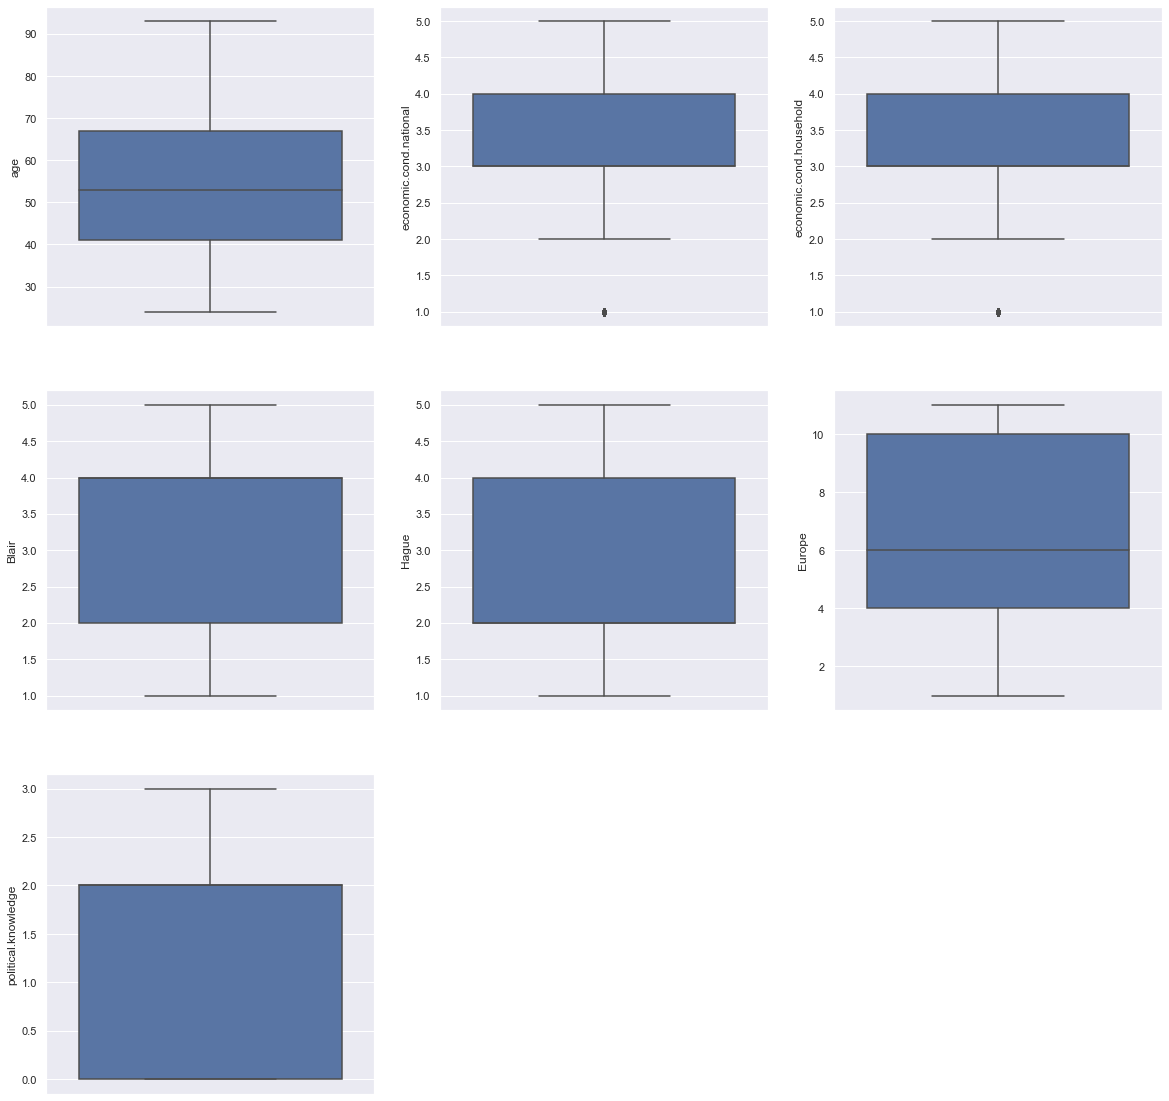

In [25]:
count = 1
plt.figure(figsize=(20,20))
for i in num_vars :
    plt.subplot(3,3,count)
    sns.boxplot(y= i, data = election[num_vars])
    count = count + 1
printmd('**Observing the Boxplot :**')

## Inferences:
- According to IQR rule there are no outliers in 'age' variable.
- As most of the ratings given by the surveyed voters for 'economic.cond.national' and 'economic.cond.household' variables are 3 or above, the ratings of 1 are considered as outliers by the IQR method.

In [26]:
Lower_outlier = []
Upper_outlier = []
for i in range(0,7):
    Q1 = election[num_vars[i]].quantile(0.25)
    Q3 = election[num_vars[i]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(election[election[num_vars[i]] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(election[election[num_vars[i]] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = num_vars)
outliers['Lower Outliers Percentage'] =  round(outliers['Lower Outliers Count'].apply(lambda x: x*100/len(election)),2)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Upper outliers Percentage'] = round(outliers['Upper Outliers Count'].apply(lambda x: x*100/len(election)),2)
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
outliers['Total Outliers Percentage'] = round(outliers['Total Outliers Count'].apply(lambda x: x*100/len(election)),2)
printmd('**The outlier counts and percentage values in each variable :**')
outliers

**The outlier counts and percentage values in each variable :**

Lower Outliers Count  Lower Outliers Percentage  \
age                                         0                       0.00   
economic.cond.national                     37                       2.44   
economic.cond.household                    65                       4.28   
Blair                                       0                       0.00   
Hague                                       0                       0.00   
Europe                                      0                       0.00   
political.knowledge                         0                       0.00   

                         Upper Outliers Count  Upper outliers Percentage  \
age                                         0                        0.0   
economic.cond.national                      0                        0.0   
economic.cond.household                     0                        0.0   
Blair                                       0                        0.0   
Hague                                       0                        0.0   
Europe                                      0                        0.0   
political.knowledge                         0                        0.0   

                         Total Outliers Count  Total Outliers Percentage  
age                                         0                       0.00  
economic.cond.national                     37                       2.44  
economic.cond.household                    65                       4.28  
Blair                                       0                       0.00  
Hague                                       0                       0.00  
Europe                                      0                       0.00  
political.knowledge                         0                       0.00

## Inferences:
- **Thus it is observed that all the ratings of 1 in 'economic.cond.national' and 'economic.cond.household' variables  are considered as outliers by IQR method. These values are not replaced and kept as it is.**

## Categorical Variables:

**Percentage counts in each category of the categorical variables:**

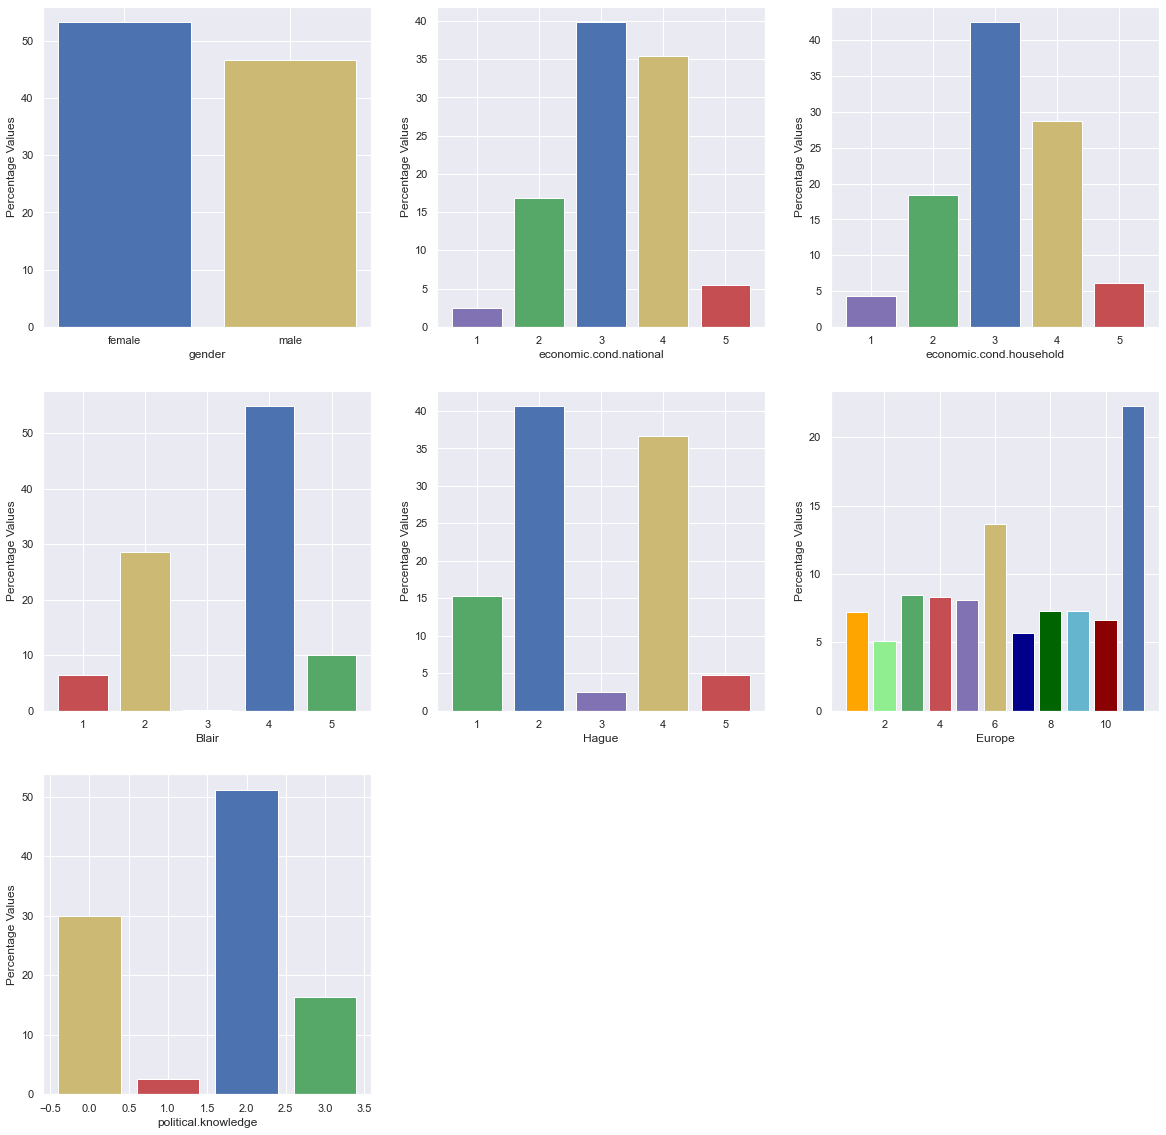

In [27]:
count = 1
plt.figure(figsize = (20,20))
for i in ind_cat_vars:
    plt.subplot(3,3,count)
    temp = election[i].value_counts('Normalize')*100
    plt.bar(x = temp.index, height = temp, color = ['b','y','g','r','m','c','darkgreen','orange','darkred', 'darkblue', 'lightgreen'])
    plt.ylabel('Percentage Values')
    plt.xlabel(str(i))
    count = count + 1
printmd('**Percentage counts in each category of the categorical variables:**')

## Inferences:
- From 'geneder' variable it is observed that male and female are nearly same.
- Most voters rated 3 or above for the national economic condition and economic condition of household.
- For 'Blair' of the Labour Party most surveyed voters gave a rating of 4 and above and for 'Hague' of the Conservative party most voters gave a rating of 2 or below.
- Although above 20% person of the surveyed voters are strongly Eurosceptic by giving a rating of 11, the rest of the surveyed voters seem to be nearly equally distributed from low to high Eurosceptic sentiments, with only a comparitively higher percentage of voters giving an average rating of 6. 
- Most of the surveyed voters have some idea about the Labour and Conservative Party's positions on European integration. But around 30% have no idea on this front.

## Bivariate/Multivariate Analysis between the Independent Variables:

## Numerical - Numerical Independent Variables:

**Pairplot of the variables :**

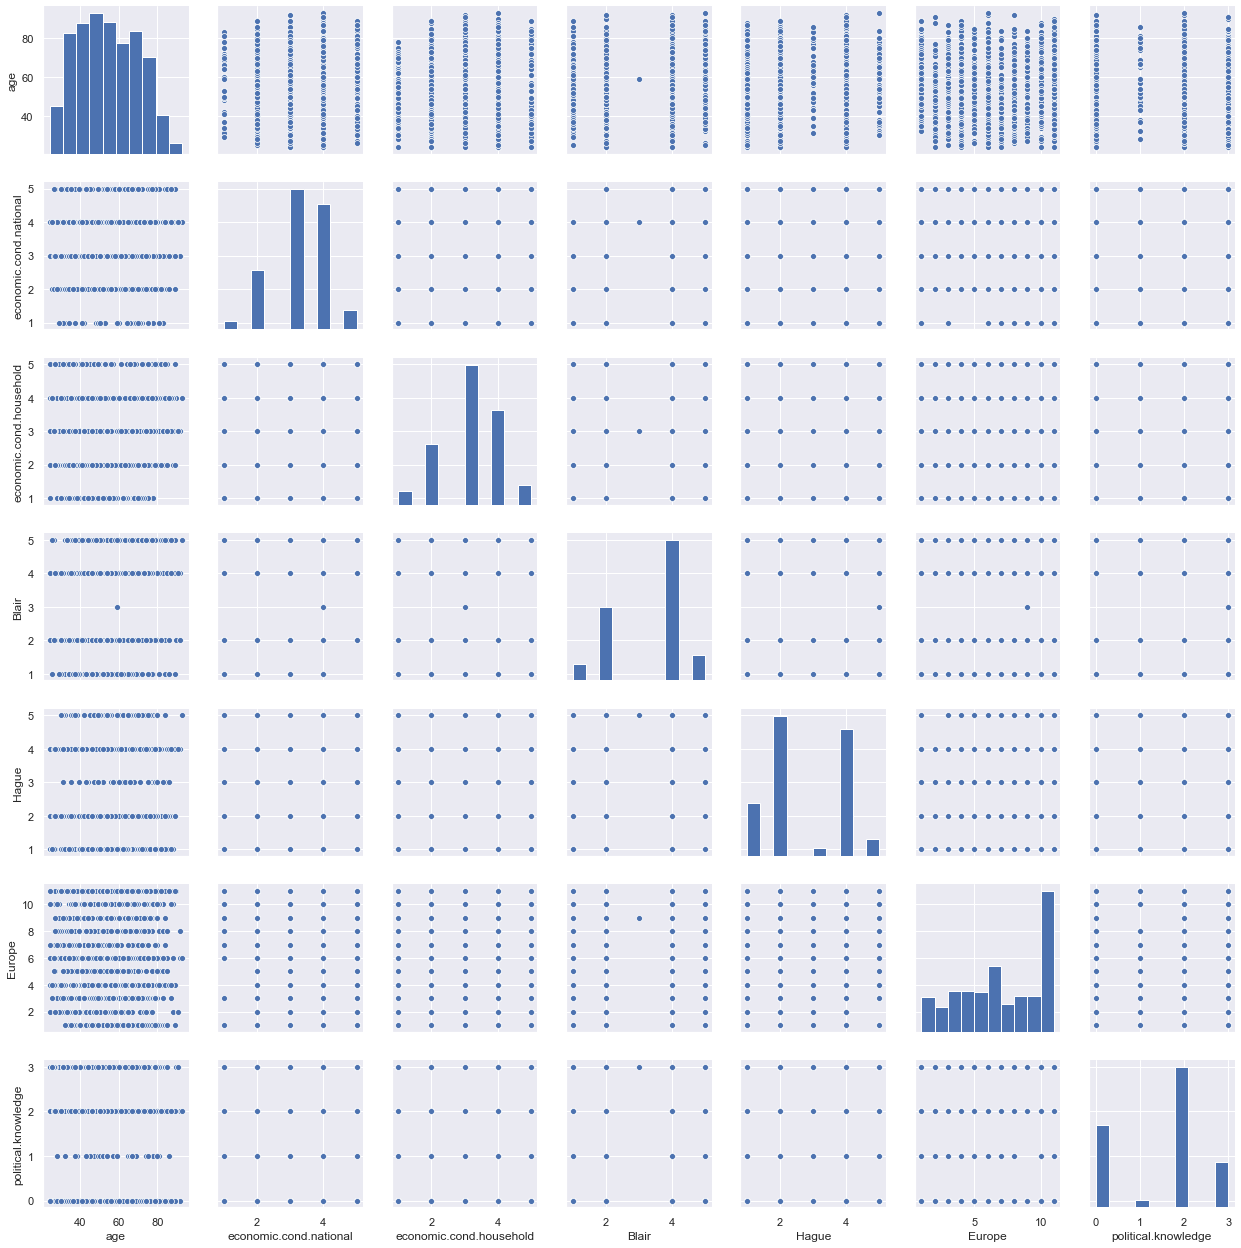

In [28]:
sns.pairplot(election.dropna()[num_vars])
printmd('**Pairplot of the variables :**')

In [29]:
printmd('**Correlation Matrix of the variables showing correlation with each other :**')
election[num_vars].corr()

**Correlation Matrix of the variables showing correlation with each other :**

age  economic.cond.national  \
age                      1.000000                0.018687   
economic.cond.national   0.018687                1.000000   
economic.cond.household -0.038868                0.347687   
Blair                    0.032084                0.326141   
Hague                    0.031144               -0.200790   
Europe                   0.064562               -0.209150   
political.knowledge     -0.046598               -0.023510   

                         economic.cond.household     Blair     Hague  \
age                                    -0.038868  0.032084  0.031144   
economic.cond.national                  0.347687  0.326141 -0.200790   
economic.cond.household                 1.000000  0.215822 -0.100392   
Blair                                   0.215822  1.000000 -0.243508   
Hague                                  -0.100392 -0.243508  1.000000   
Europe                                 -0.112897 -0.295944  0.285738   
political.knowledge                    -0.038528 -0.021299 -0.029906   

                           Europe  political.knowledge  
age                      0.064562            -0.046598  
economic.cond.national  -0.209150            -0.023510  
economic.cond.household -0.112897            -0.038528  
Blair                   -0.295944            -0.021299  
Hague                    0.285738            -0.029906  
Europe                   1.000000            -0.151197  
political.knowledge     -0.151197             1.000000

**Heatmap showing the correlation values between the variables :**

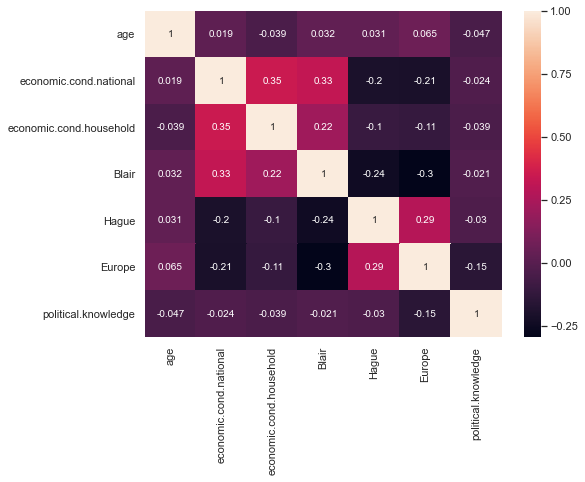

In [30]:
plt.figure(figsize = (8,6))
sns.heatmap(election[num_vars].corr(), annot = True)
printmd('**Heatmap showing the correlation values between the variables :**')

## Inferences:
- The pairplot does not give proper visual description as the variables except age are all ordered categorical variables and hence they are observed in a different way.
- **The correlation values show that there is no high correlation.**

## Numerical - Categorical Independent Variables:

## 'age' variable and the categorical variables:

Mean values of 'age' for each category of the different categorical variables :


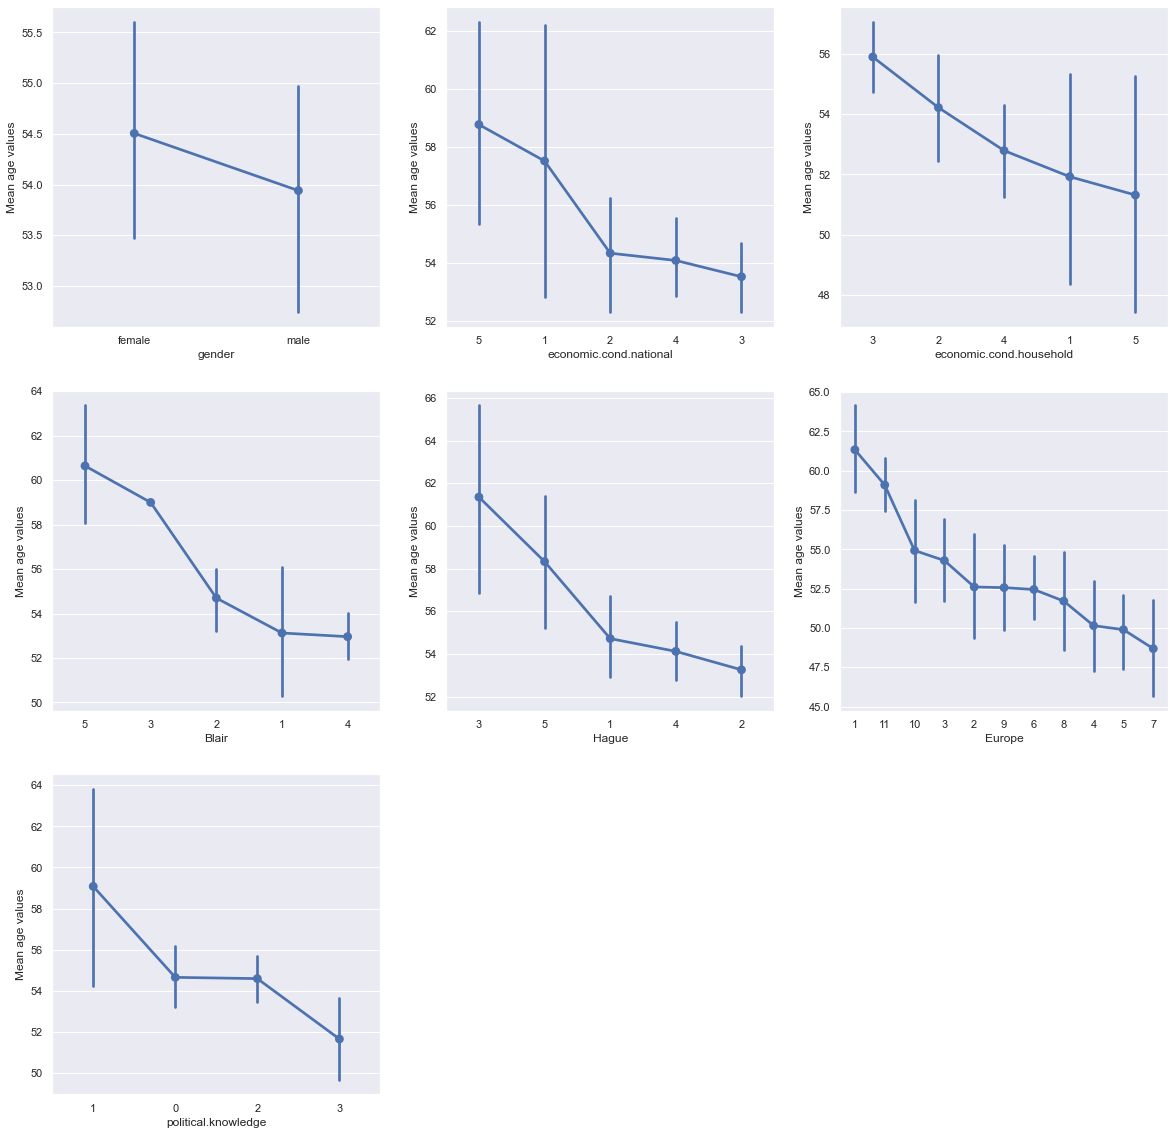

In [31]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    plt.subplot(3,3,count)
    sns.pointplot(x = j, y = num_vars[0], data = election,
                order = election.groupby(j)[num_vars[0]].mean().sort_values(ascending = False).index)
    plt.ylabel('Mean ' + str(num_vars[0]) + ' values')
    plt.xlabel(str(j))
    count = count + 1
print('Mean values of \''  + str(num_vars[0]) + '\' for each category of the different categorical variables :')

Boxplot of 'age' for each category of the different categorical variables :


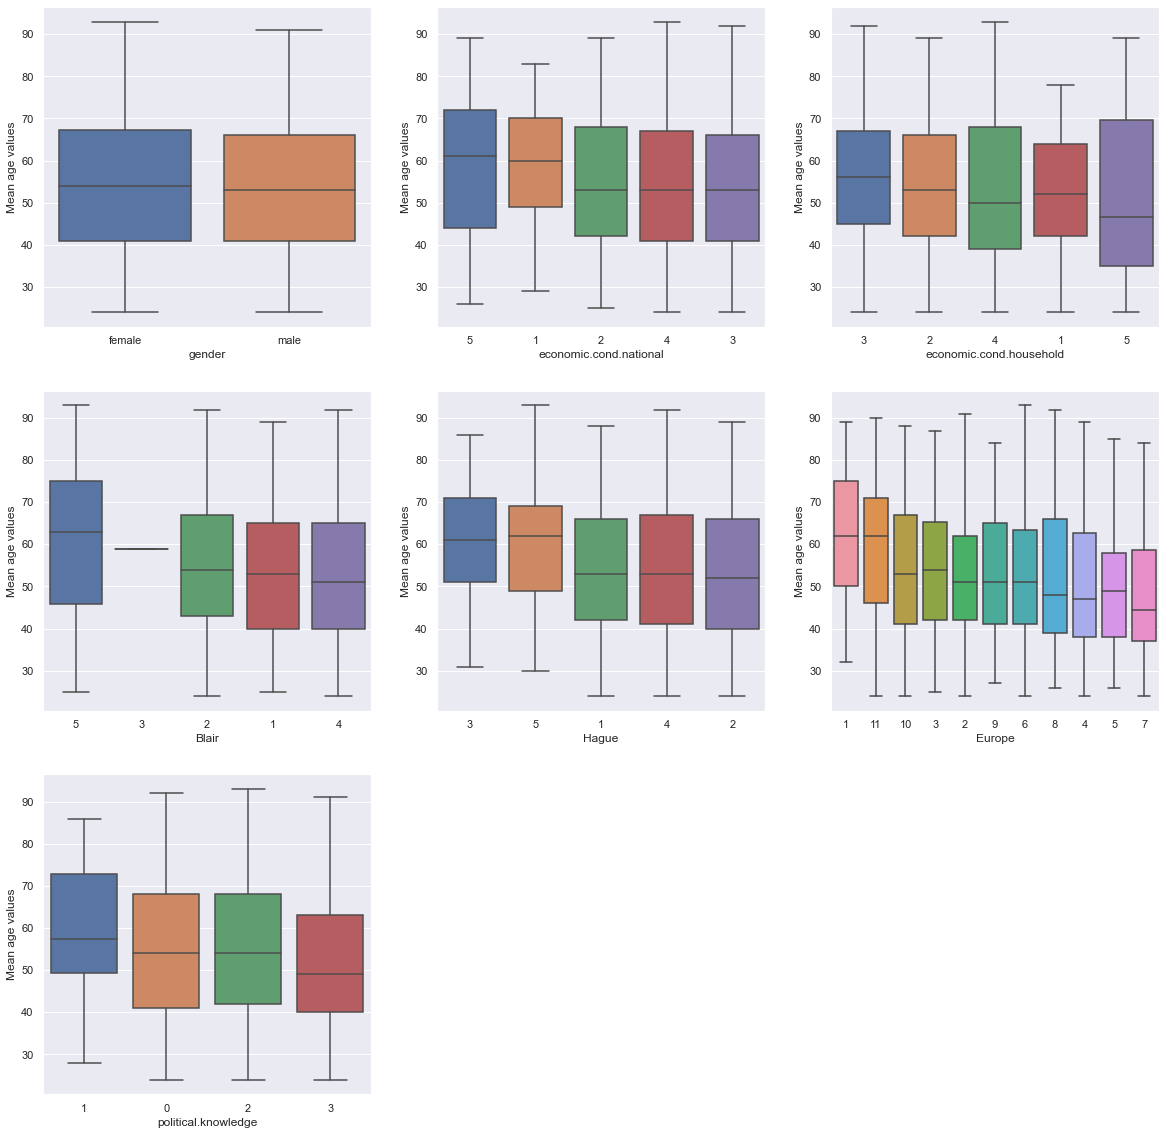

In [32]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    plt.subplot(3,3,count)
    sns.boxplot(x = j, y = num_vars[0], data = election,
                order = election.groupby(j)[num_vars[0]].mean().sort_values(ascending = False).index)
    plt.ylabel('Mean ' + str(num_vars[0]) + ' values')
    plt.xlabel(str(j))
    count = count + 1
print('Boxplot of \''  + str(num_vars[0]) + '\' for each category of the different categorical variables :')

Boxplot of 'age' for each category of the different categorical variables :


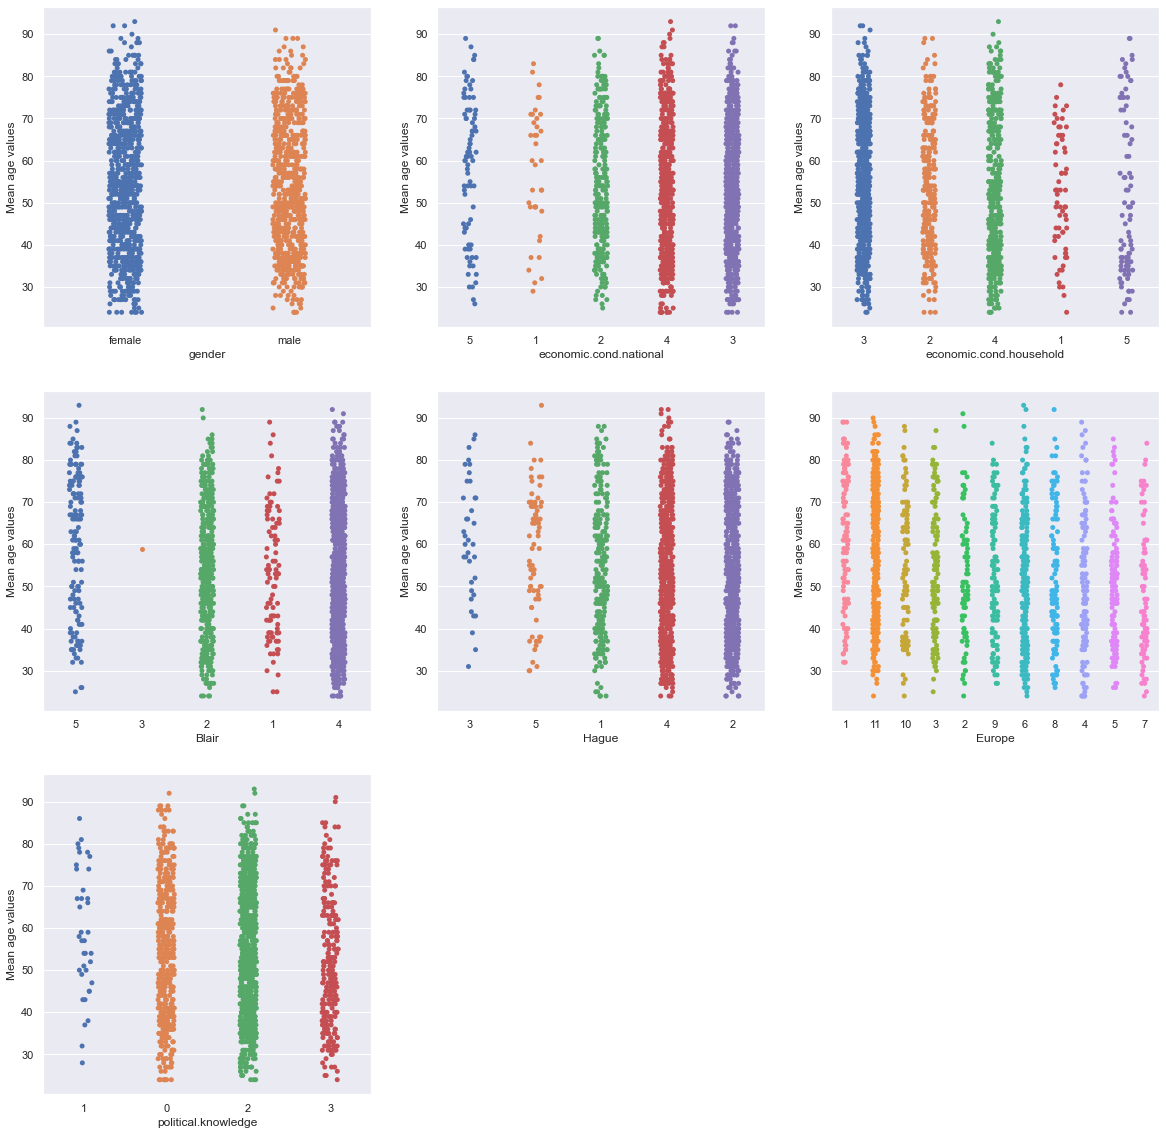

In [33]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    plt.subplot(3,3,count)
    sns.stripplot(x = j, y = num_vars[0], data = election,
                order = election.groupby(j)[num_vars[0]].mean().sort_values(ascending = False).index)
    
    plt.ylabel('Mean ' + str(num_vars[0]) + ' values')
    plt.xlabel(str(j))
    count = count + 1
print('Boxplot of \''  + str(num_vars[0]) + '\' for each category of the different categorical variables :')

## Inferences:
- The mean and median age of male and female surveyed voters are nearly same and standard deviation is also similar. **This shows that the male and female of all ages were covered in the survey.**
- **Although the mean and median age of surveyed voters are higher for those who gave extreme ratings of 1 or 5 for the economic condition of the nation, there is very high variance for each ratings and hence we conclusively cannot say that more aged voters have more extreme views on the economic situation of the nation.**
- **In case of ratings for the economic situation of household it is observed that the mean age of surveyed voters are lower for those who gave extreme ratings of 1 or 5 but here also there is a lot variance in age for each rating and hence nothing can be said conclusively.**
- **The mean and median age of the surveyed voters who gave ratings of 5 for Blair is much higher and the variance is also low. But again surveyed voters who gave ratings of 4 have the minimum mean and median age, thus we cannot say that aged voters preferred Blair as candidate.**
- No observable trend could be observed for Hague.
- **The mean and median age of voters seem to higher for extreme views on Eurosceptic sentiment both in favour and against. The variance observed in the poinplot is also less and hence it may be concluded that more aged voters have strong 'Eurosceptic' sentiments both in favour and against.**
- No observable trend is observed in case of knowledge of voters on either parties' stand on European Integration and their age.

## 'economic.cond.national' variable and the categorical variables:

Mean values of 'economic.cond.national' for each category of the different categorical variables :


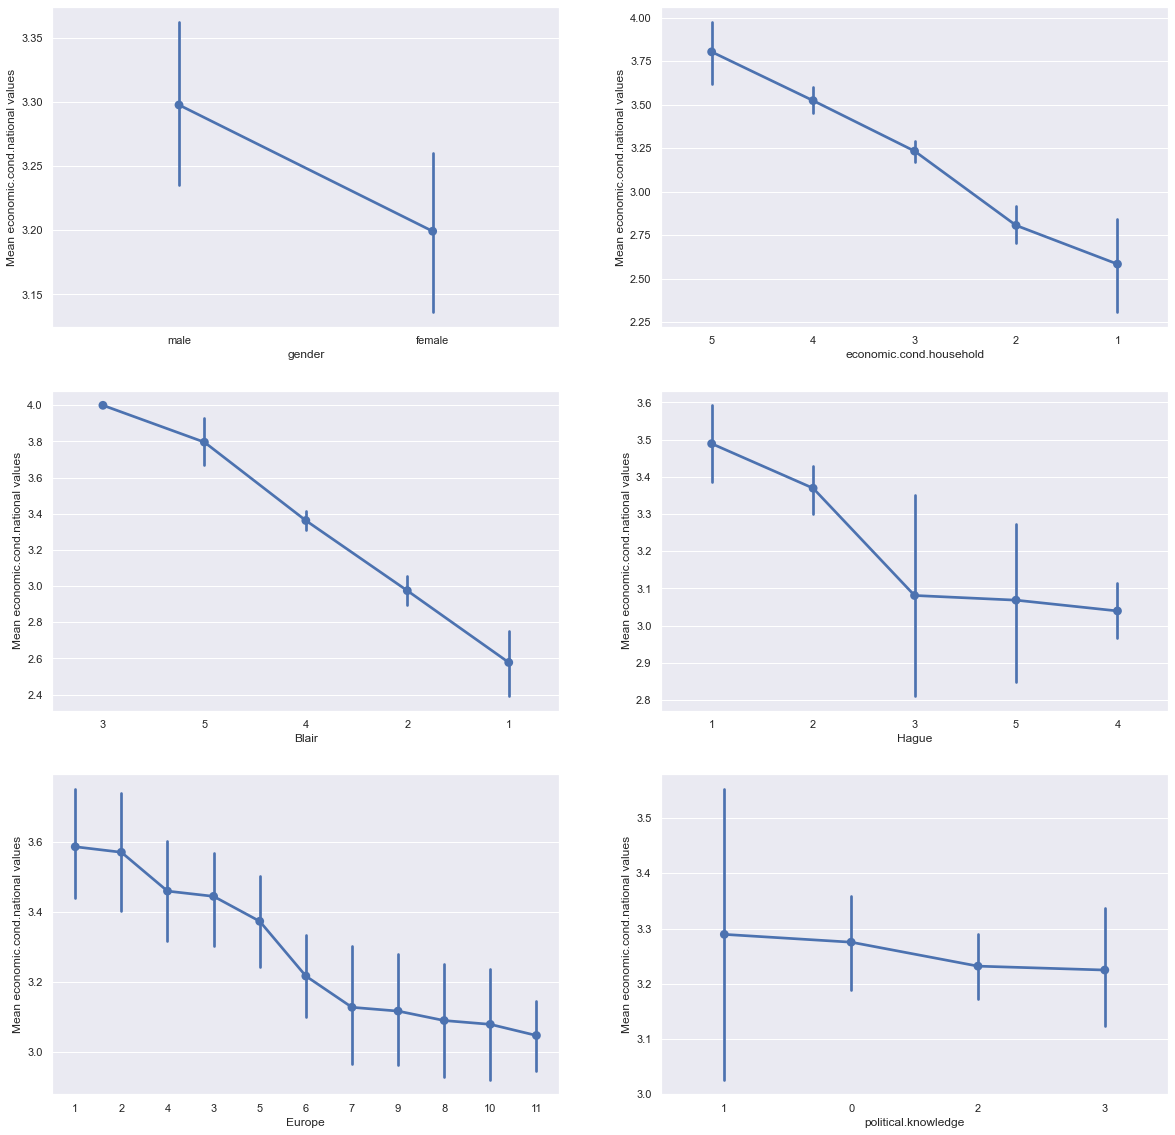

In [34]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[1]:
        plt.subplot(3,2,count)
        sns.pointplot(x = j, y = num_vars[1], data = election,
                order = election.groupby(j)[num_vars[1]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[1]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[1]) + '\' for each category of the different categorical variables :')

Barplot of 'economic.cond.national' for each category of the different categorical variables :


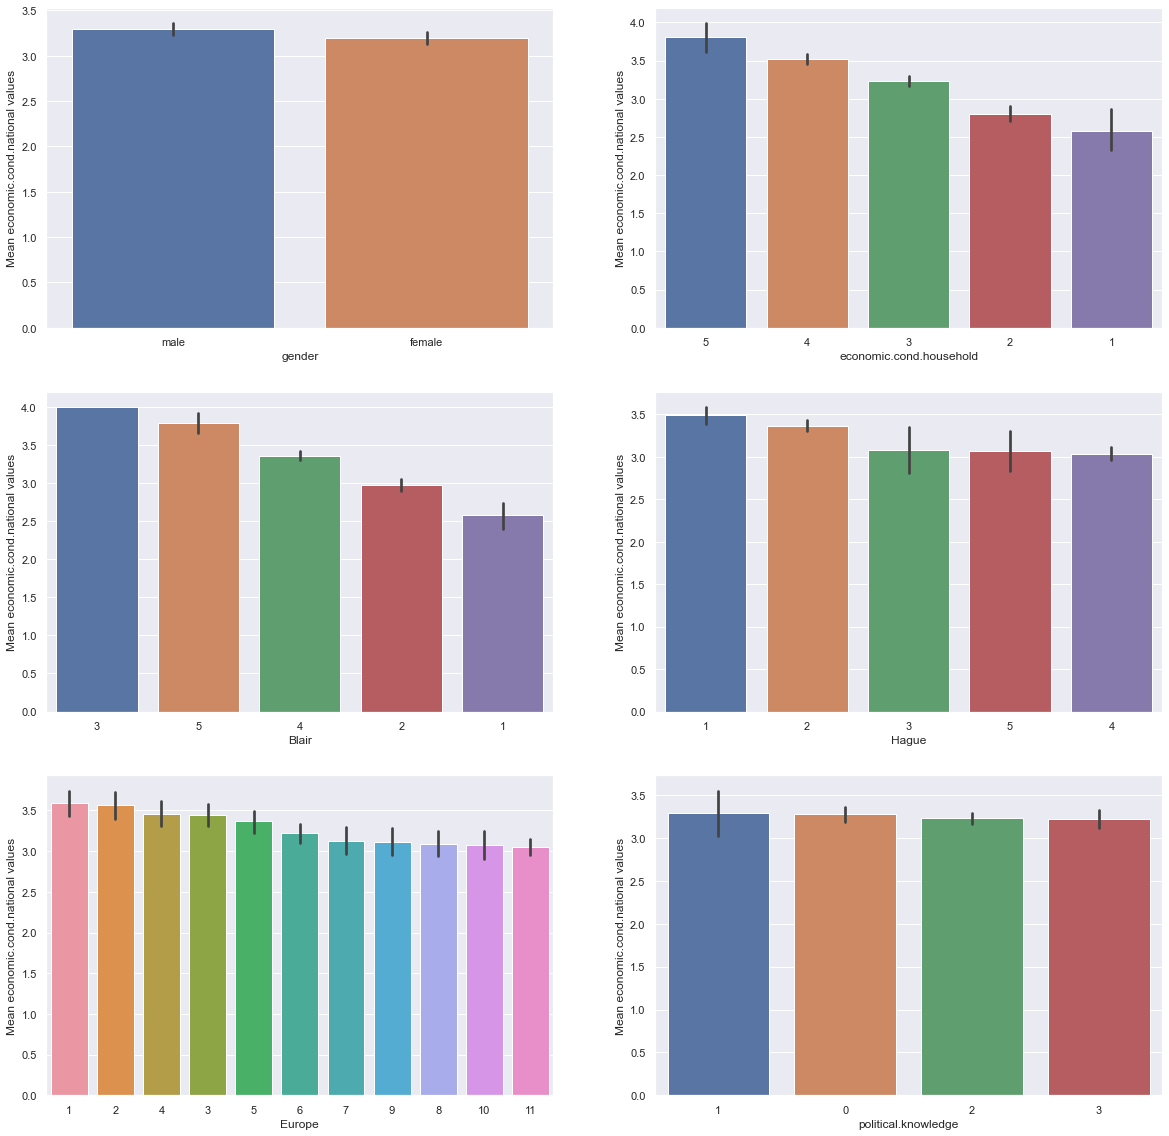

In [35]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[1]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[1], data = election,
                order = election.groupby(j)[num_vars[1]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[1]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Barplot of \''  + str(num_vars[1]) + '\' for each category of the different categorical variables :')

## Inferences:
- No noticeable difference is observed in ratings of national economic conditions based on gender.
- **As expected similar ratings trend is observed for national economic conditions and household economic conditions, i.e. higher mean ratings of current national economic condition observed for voters who gave high ratings for household economic coditions.**
- **The surveyed voters who have lower ratings of 1 and 2 for Blair of Labour Party also have less average ratings for the current national economic situation but interestingly opposite trend is observed for Hague of the Conservative Party. This may give us the insight that voters who have more positive outlook for the current national economic condition seem to be more in favour of Blair of the Labour Party.**
- **The voters who show more Eurosceptic sentiments also have lower mean ratings for the current national economic condition. Thus it may be inferred that the voters consider the European integration to have an impact on the current national economic condition *(note that the exit poll is considered before Brexit).***
- No noticeable difference is observed in ratings of national economic conditions based on the voters' knowledge on stand of the political parties on European Integration.

## 'economic.cond.household' variable and the categorical variables:

Mean values of 'economic.cond.household' for each category of the different categorical variables :


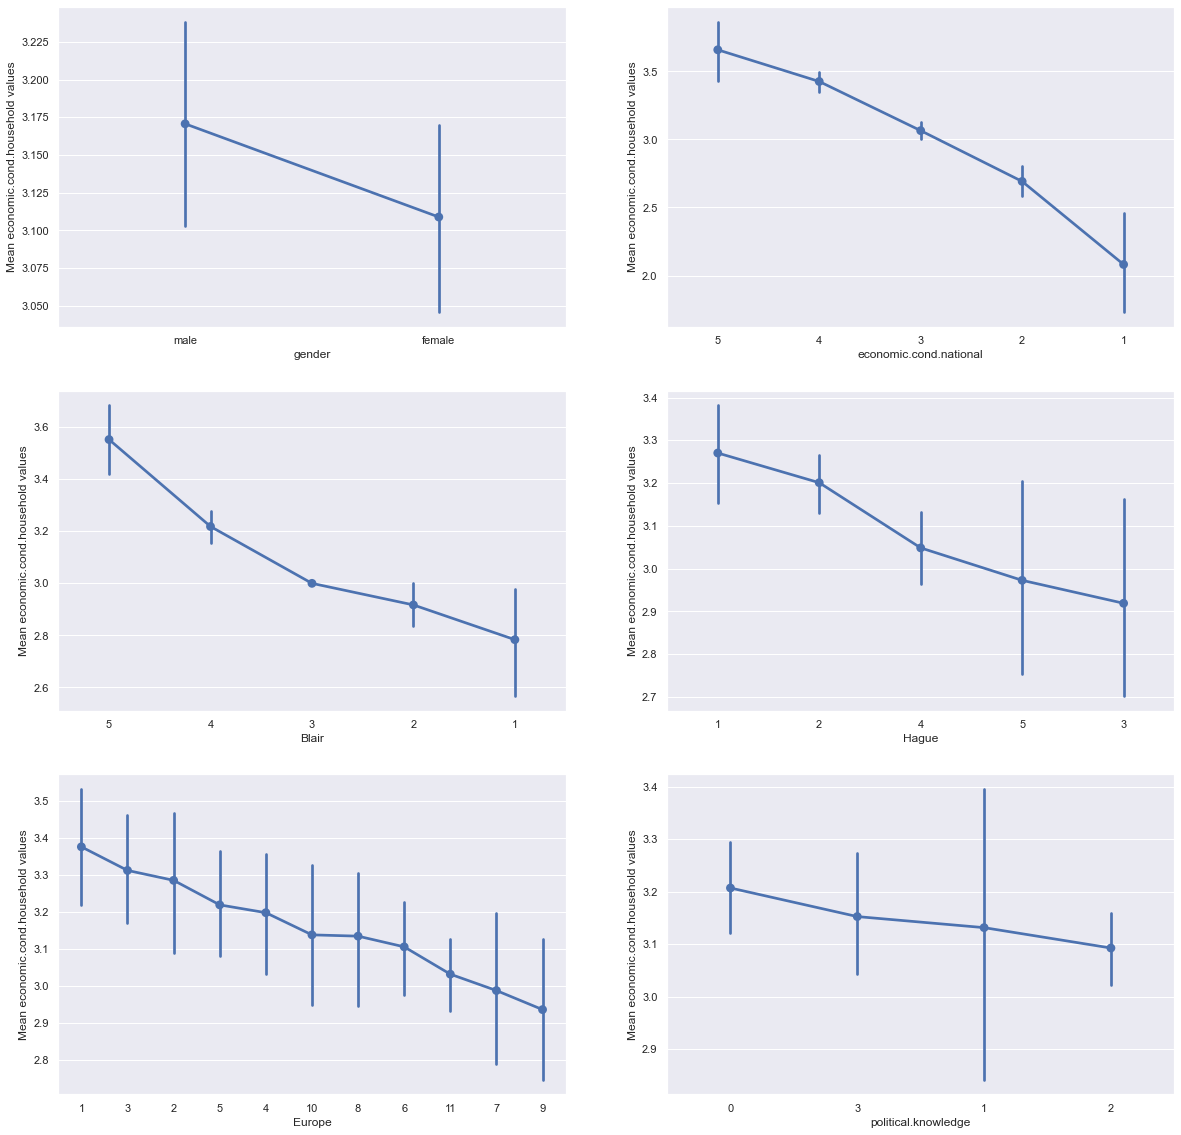

In [36]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[2]:
        plt.subplot(3,2,count)
        sns.pointplot(x = j, y = num_vars[2], data = election,
                order = election.groupby(j)[num_vars[2]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[2]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[2]) + '\' for each category of the different categorical variables :')

Mean values of 'economic.cond.household' for each category of the different categorical variables :


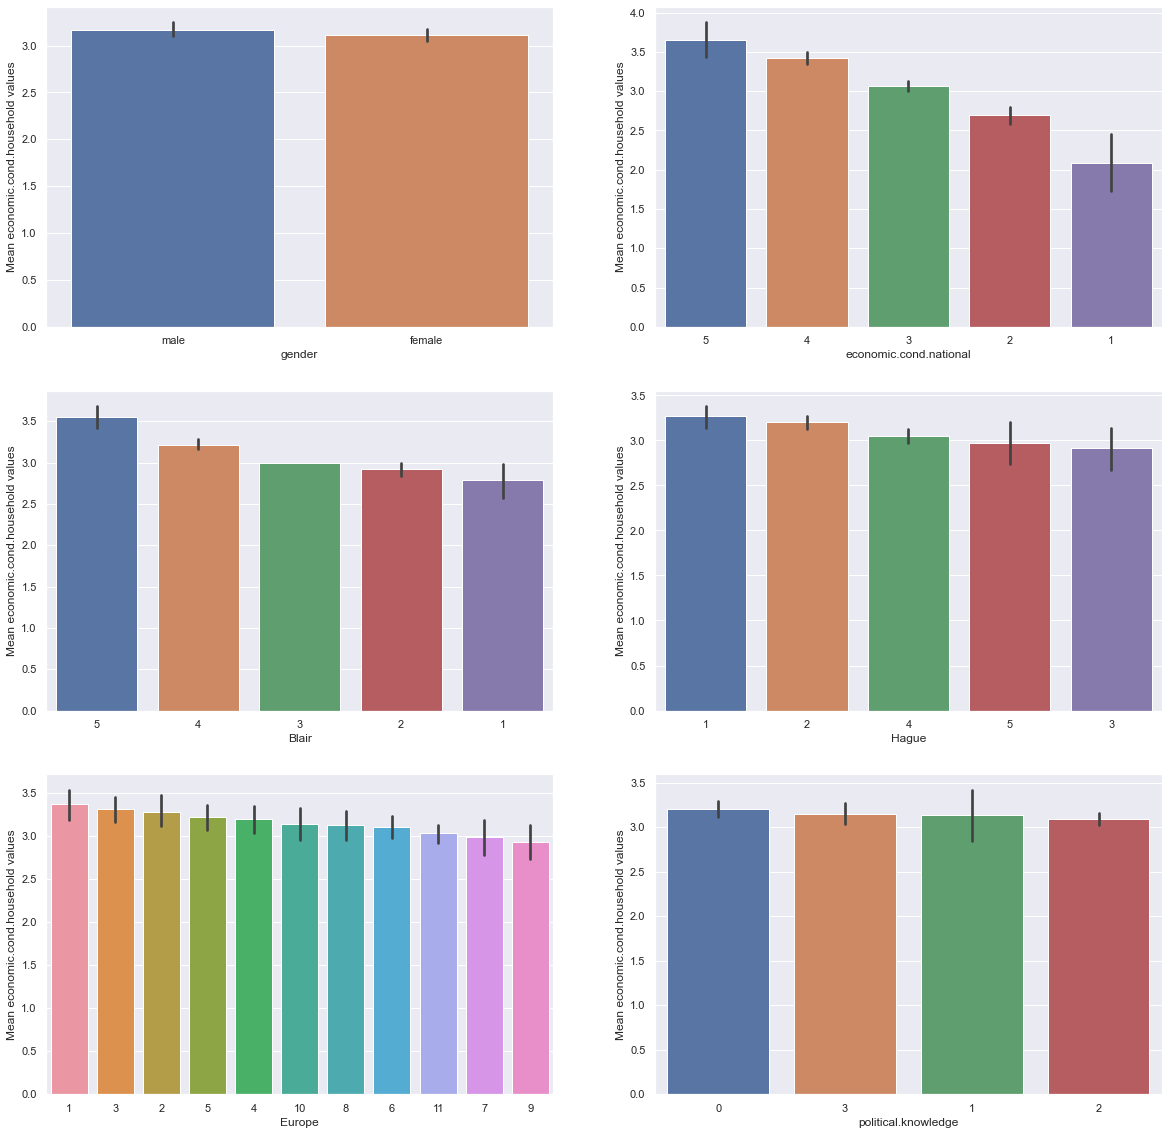

In [37]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[2]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[2], data = election,
                order = election.groupby(j)[num_vars[2]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[2]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[2]) + '\' for each category of the different categorical variables :')

## Inferences:
- No noticeable difference is observed in ratings of household economic conditions based on gender.
- **As expected similar ratings trend is observed for national economic conditions and household economic conditions, i.e. higher mean ratings of household economic conditions observed for voters who gave high ratings for national economic coditions.**
- **The surveyed voters who have lower ratings of 1 and 2 for Blair of Labour Party also have less average ratings for the household economic situation but interestingly opposite trend is observed for Hague of the Conservative Party. This may give us the insight that voters who have more positive outlook for the household economic conditions also seem to be more in favour of Blair of the Labour Party.**
- No noticeable trend is observed for ratings of household economic conditions with respect to Eurosceptic sentiments of voters or voters' knowledge on stand of the political parties on European Integration.

## 'Blair' variable and the categorical variables:

Mean values of 'Blair' for each category of the different categorical variables :


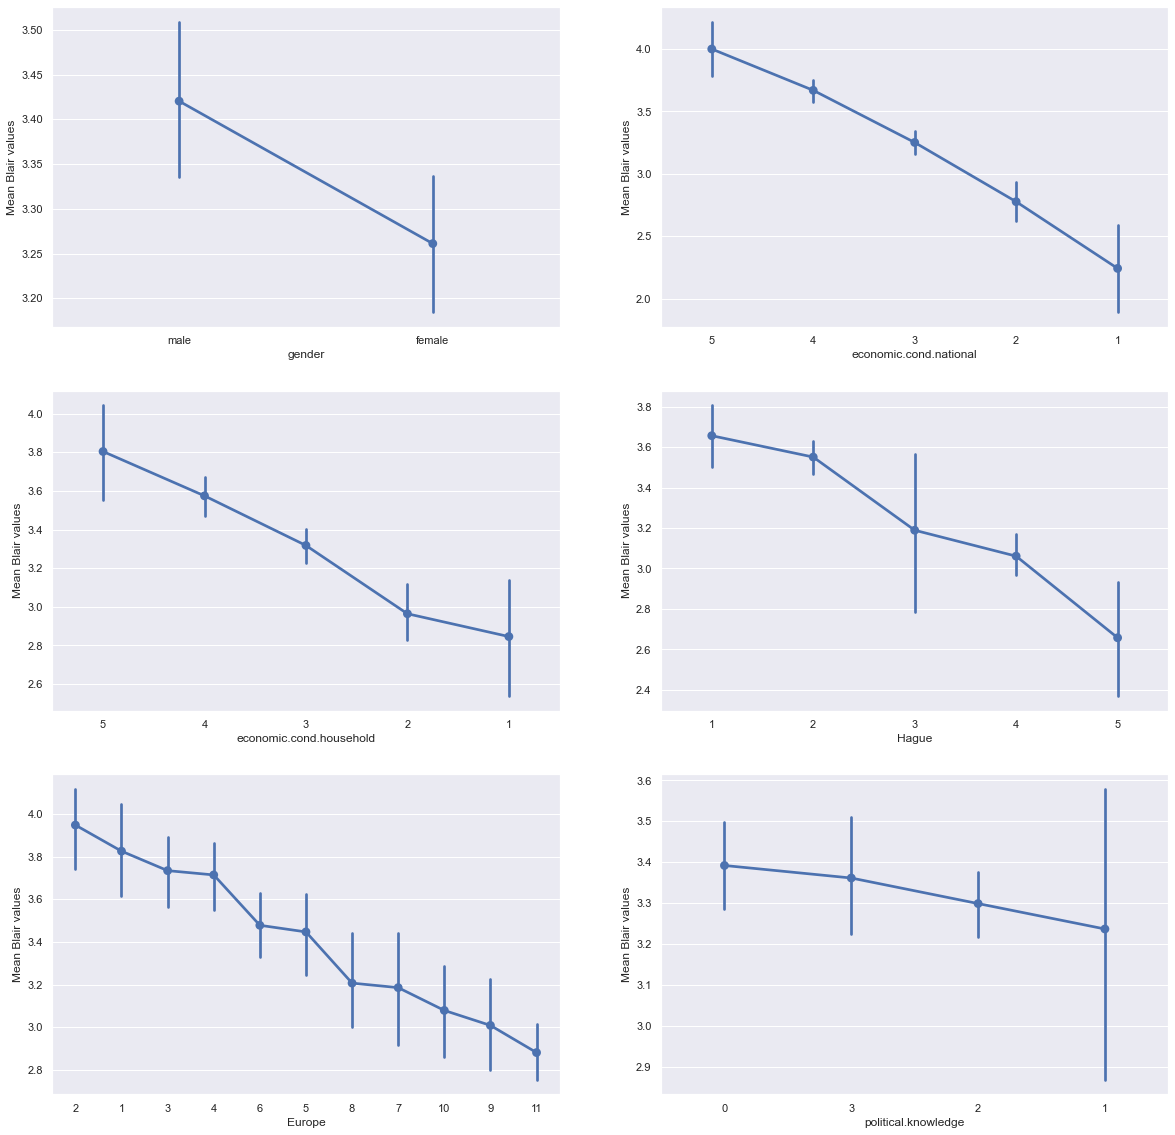

In [38]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[3]:
        plt.subplot(3,2,count)
        sns.pointplot(x = j, y = num_vars[3], data = election,
                order = election.groupby(j)[num_vars[3]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[3]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[3]) + '\' for each category of the different categorical variables :')

Mean values of 'Blair' for each category of the different categorical variables :


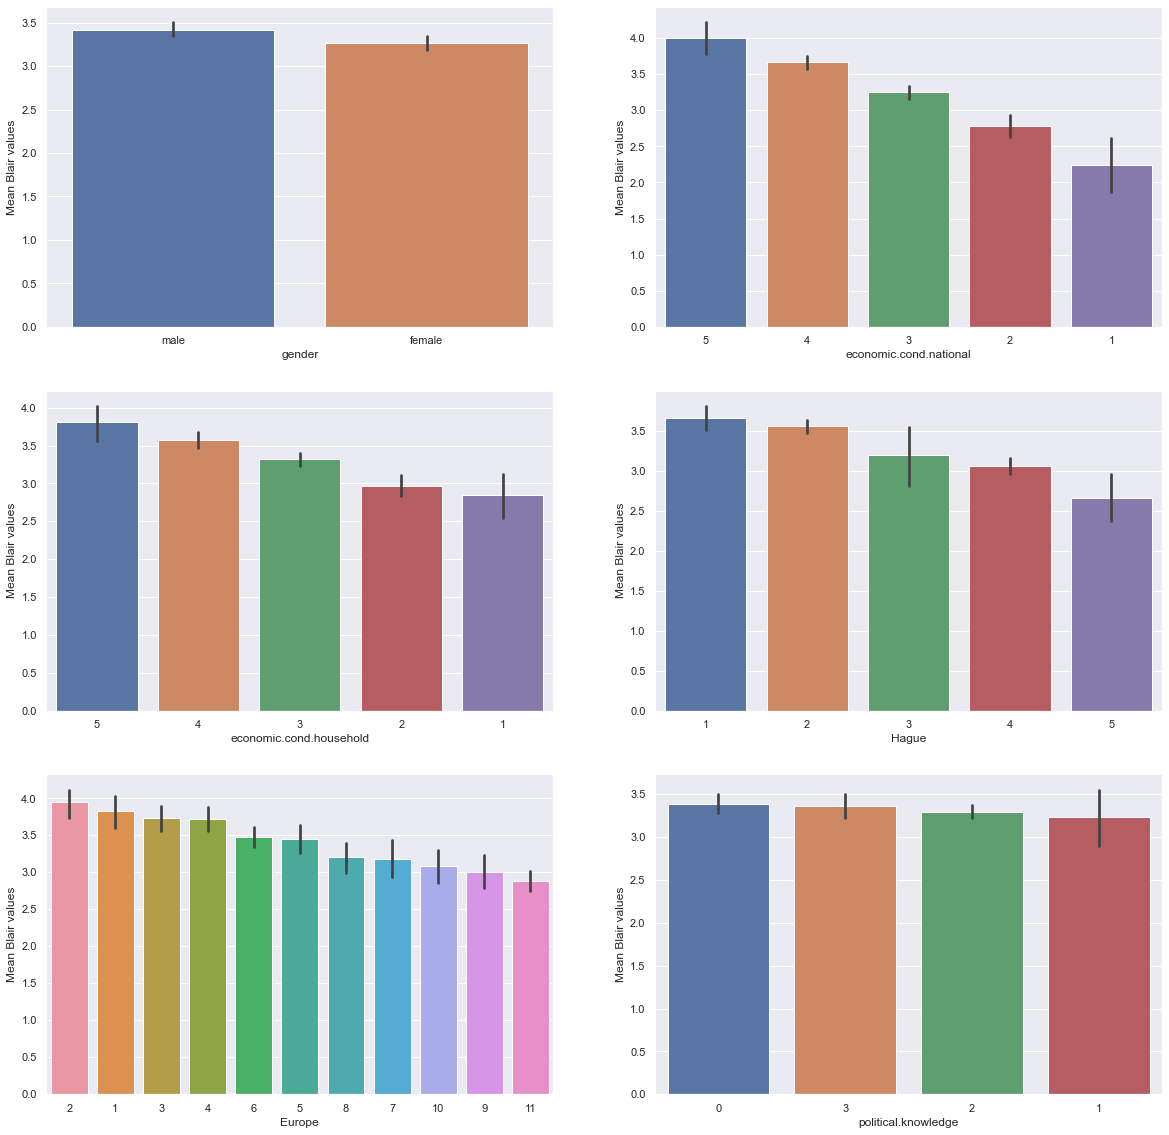

In [39]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[3]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[3], data = election,
                order = election.groupby(j)[num_vars[3]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[3]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[3]) + '\' for each category of the different categorical variables :')

## Inferences:
- The male and female voters' average ratings for Blair as the candidate is nearly same.
- **The mean ratings for Blair seem to decrease with decrease in ratings of the national economic and household economic conditions. This may suggest that the voters' on an average who are in favour of Blair also seem to have overall positive outlook on the current national and household economic condition.**
- **As expected voters who have higher ratings for Hague seem to have lower mean ratings for Blair and vice versa.**
- **Overall it is observed that the mean ratings for Blair is more for voters who have less Eurosceptic sentiments. This may suggest Blair's agenda for the election may be in favour of staying in the Eurpean Union or in similar lines *(note that the exit poll is considered before Brexit).***
- No noticeable difference is observed in ratings of Blair based on the voters' knowledge on stand of the political parties on European Integration.

## 'Hague' variable and the categorical variables:

Mean values of 'Hague' for each category of the different categorical variables :


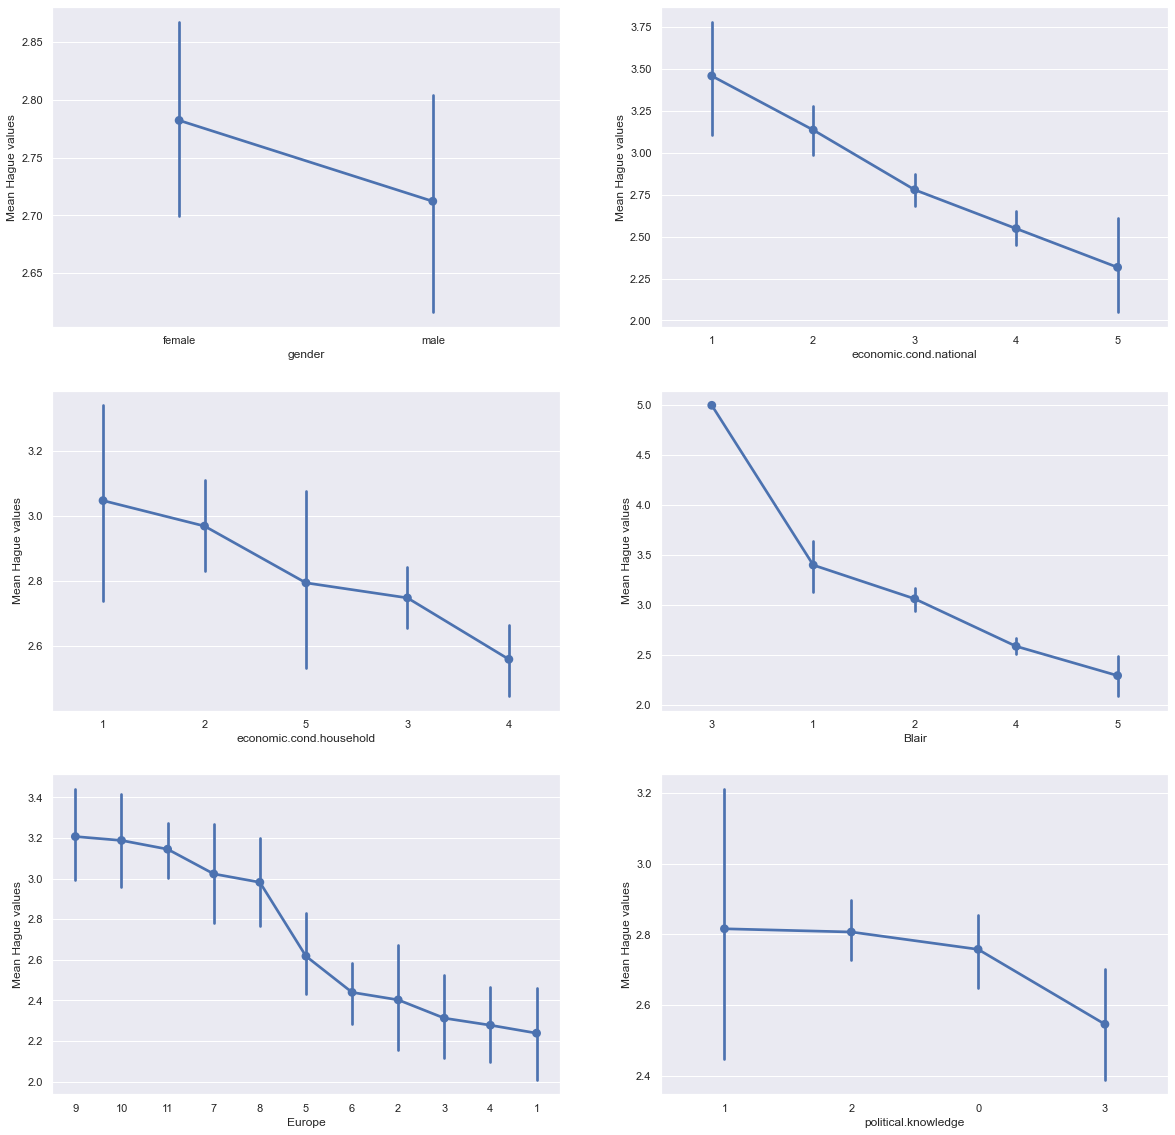

In [40]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[4]:
        plt.subplot(3,2,count)
        sns.pointplot(x = j, y = num_vars[4], data = election,
                order = election.groupby(j)[num_vars[4]].mean().sort_values(ascending = False).index)
                
        plt.ylabel('Mean ' + str(num_vars[4]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[4]) + '\' for each category of the different categorical variables :')

Mean values of 'Hague' for each category of the different categorical variables :


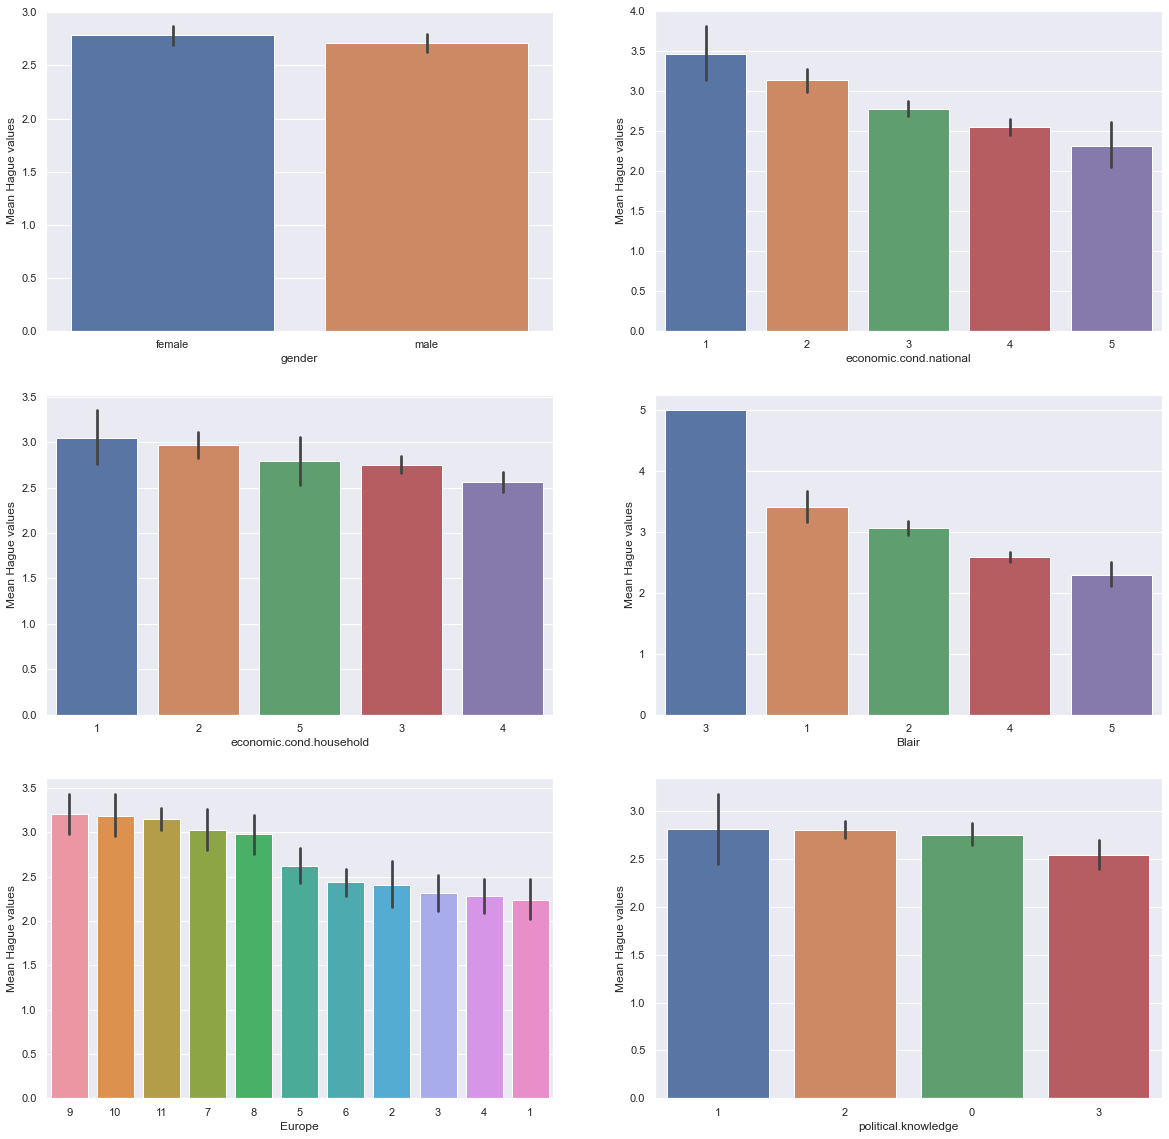

In [41]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[4]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[4], data = election,
                order = election.groupby(j)[num_vars[4]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[4]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[4]) + '\' for each category of the different categorical variables :')

## Inferences:
- The male and female voters' average ratings for Hague as the candidate is nearly same.
- **The mean ratings for Hague seem to decrease with increase in ratings of the national economic and household economic conditions. This may suggest that the voters' on an average who are in favour of Hague seem to have overall negative outlook on the current national and household economic condition.**
- **As expected voters who have higher ratings for Blair seem to have lower mean ratings for hague and vice versa.**
- **Overall it is observed that the mean ratings for Hague is more for voters who have more Eurosceptic sentiments. This may suggest Hague's agenda for the election may be in favour of exiting from the Eurpean Union or in similar lines *(note that the exit poll is considered before Brexit).***
- No noticeable difference is observed in ratings of Hague based on the voters' knowledge on stand of the political parties on European Integration.

## 'Europe' variable and the categorical variables:

Mean values of 'Europe' for each category of the different categorical variables :


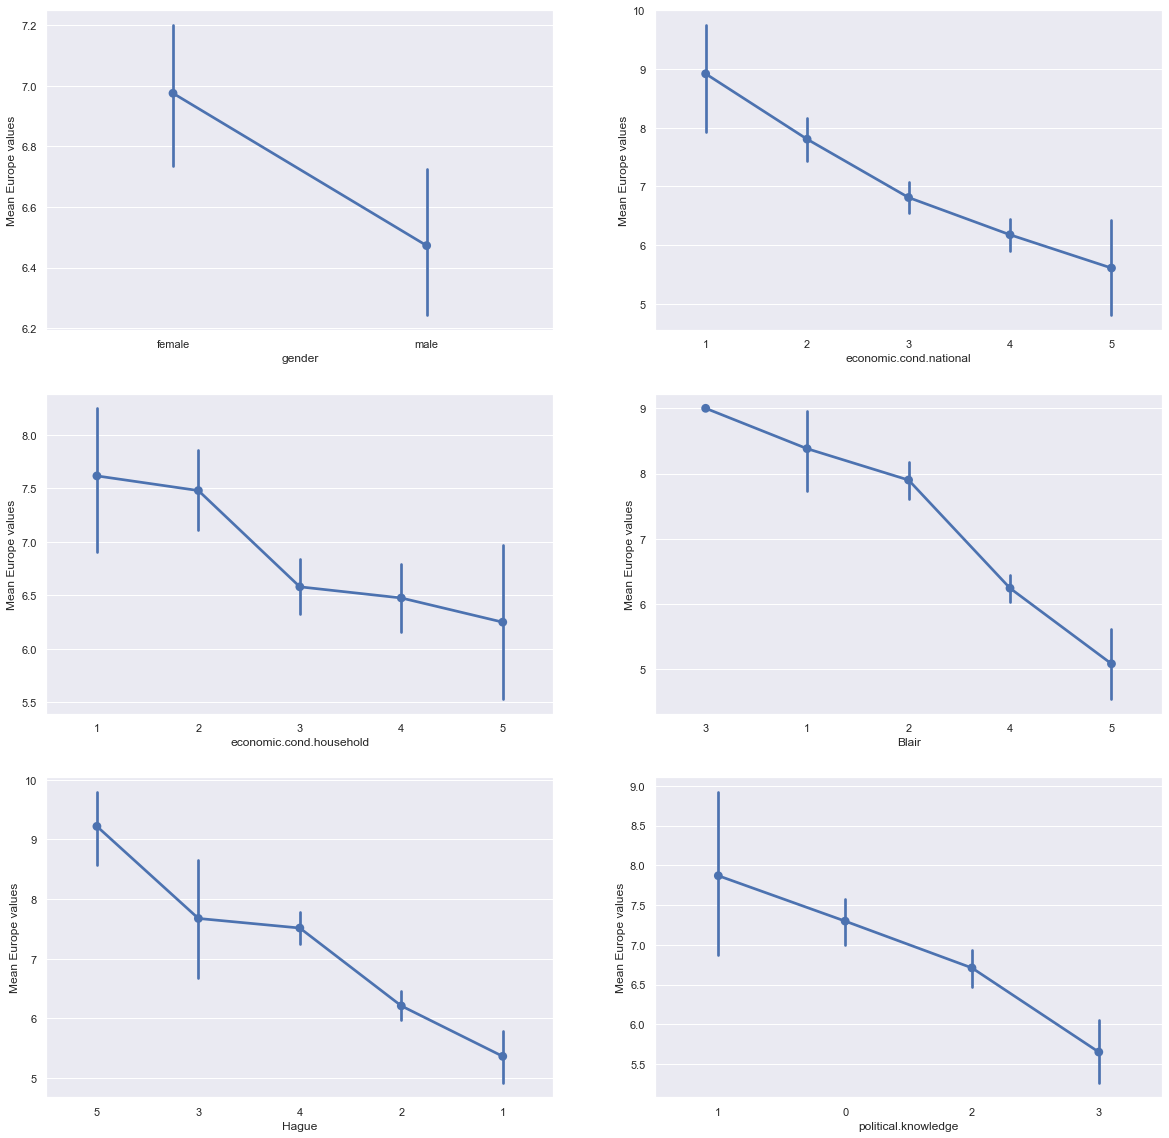

In [42]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[5]:
        plt.subplot(3,2,count)
        sns.pointplot(x = j, y = num_vars[5], data = election,
                order = election.groupby(j)[num_vars[5]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[5]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[5]) + '\' for each category of the different categorical variables :')

Mean values of 'Europe' for each category of the different categorical variables :


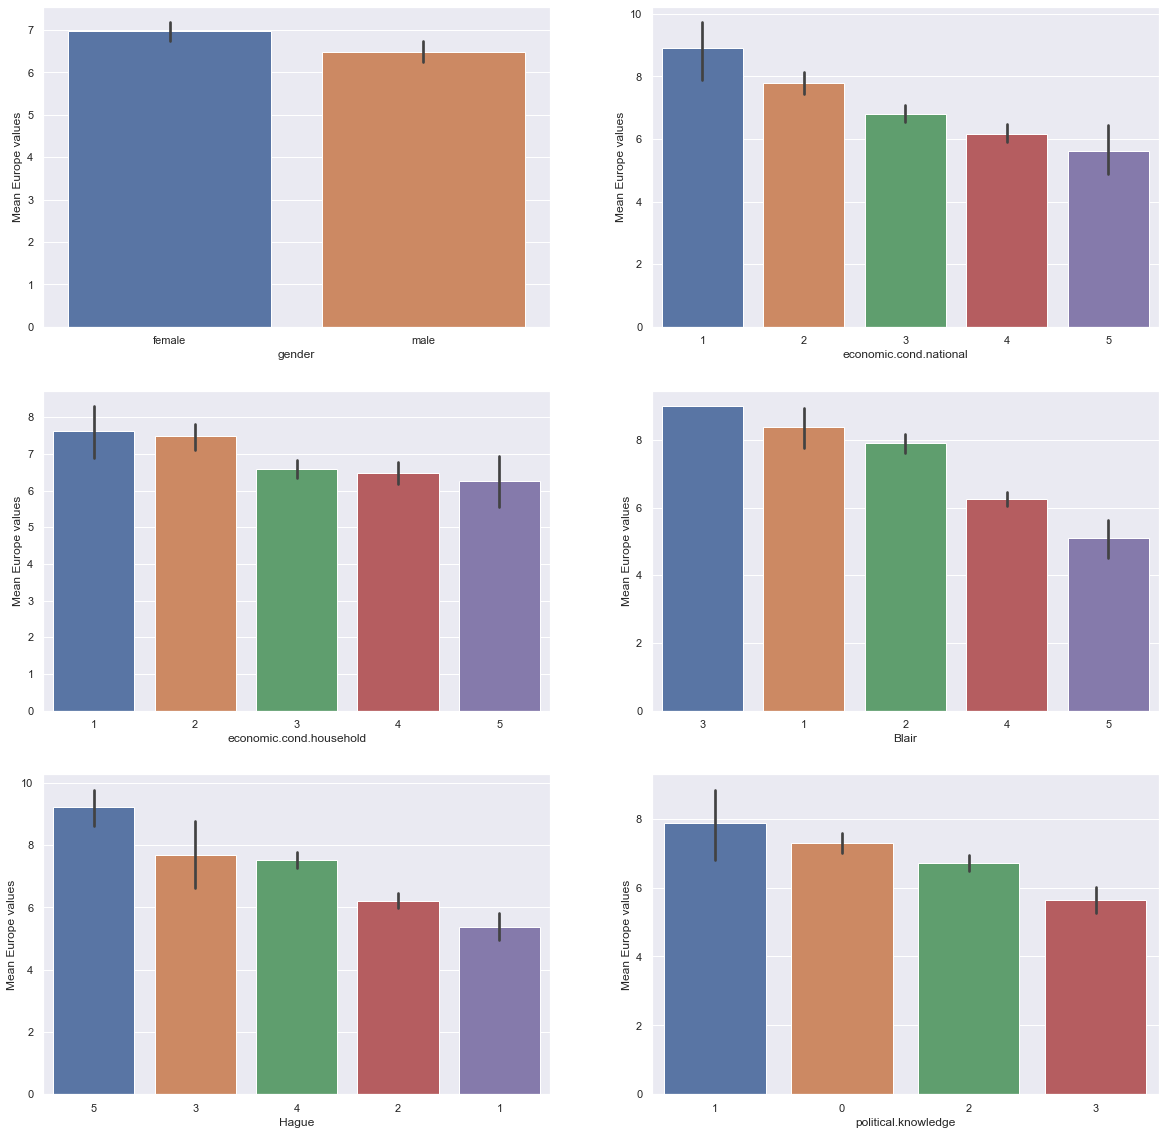

In [43]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[5]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[5], data = election,
                order = election.groupby(j)[num_vars[5]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[5]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[5]) + '\' for each category of the different categorical variables :')

## Inferences:
- The male and female voters' average ratings on European Integration is nearly same.
- **The voters' with lower ratings for current national economic condition have higher mean ratings for 'Europe' variable thus indicating a more Eurosceptic sentiment. Hence suggesting that the voters may believe that the national economic condition is affected by the position of Britain in European Integration.**
- **The voters' with lower ratings for current household economic condition have higher mean ratings for 'Europe' variable thus indicating a more Eurosceptic sentiment. Hence suggesting that the voters may believe that household economic condition is affected by the position of Britain in European Integration but it is to be noted that this affect is not as clearly observed as in case of national economic condition.**
- **Overall it is observed that the mean ratings for 'Europe' is more i.e. Eurosceptic sentiments for voters who gave less ratings for Blair. This may suggest Blair's agenda for the election may be in favour of staying in the Eurpean Union or in similar lines *(note that the exit poll is considered before Brexit).***
- **Overall it is observed that the mean ratings for 'Europe' is more i.e. Eurosceptic sentiments for voters who  gave high ratings for Hague. This may suggest Hague's agenda for the election may be in favour of exiting from the Eurpean Union or in similar lines *(note that the exit poll is considered before Brexit).***
- **Overall it may be observed that voters with less or no knowledge on the either Parties' stand on European Integration seem to have higher Eurosceptic sentiment on an average and the voters with more knowledge seem to have less Eurosceptic sentiments on an average.**

## 'political.knowledge' variable and the categorical variables:

Mean values of 'political.knowledge' for each category of the different categorical variables :


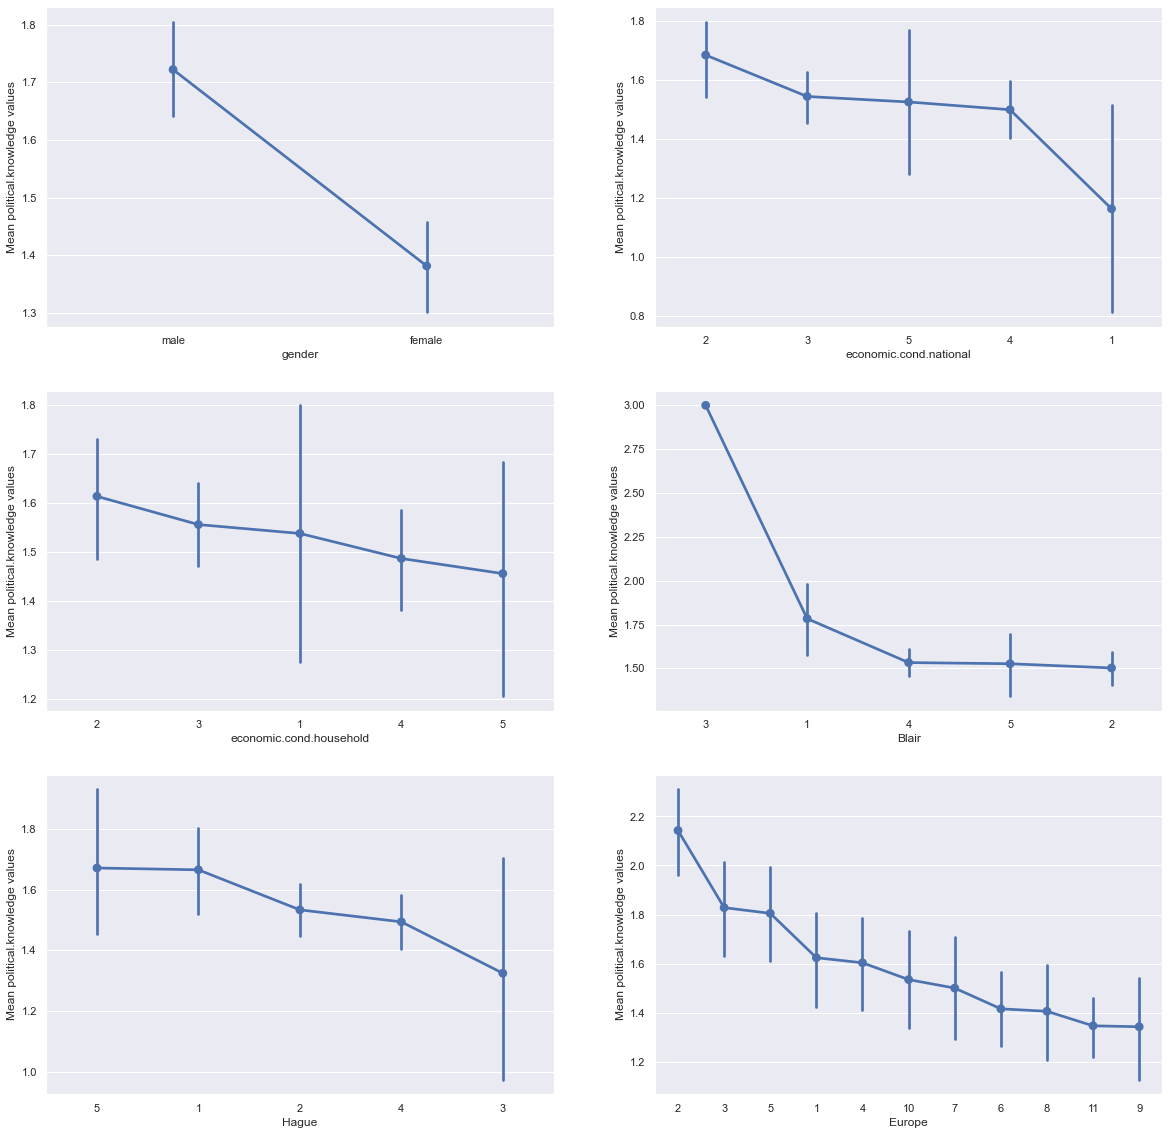

In [44]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[6]:
        plt.subplot(3,2,count)
        sns.pointplot(x = j, y = num_vars[6], data = election,
                order = election.groupby(j)[num_vars[6]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[6]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[6]) + '\' for each category of the different categorical variables :')

Mean values of 'political.knowledge' for each category of the different categorical variables :


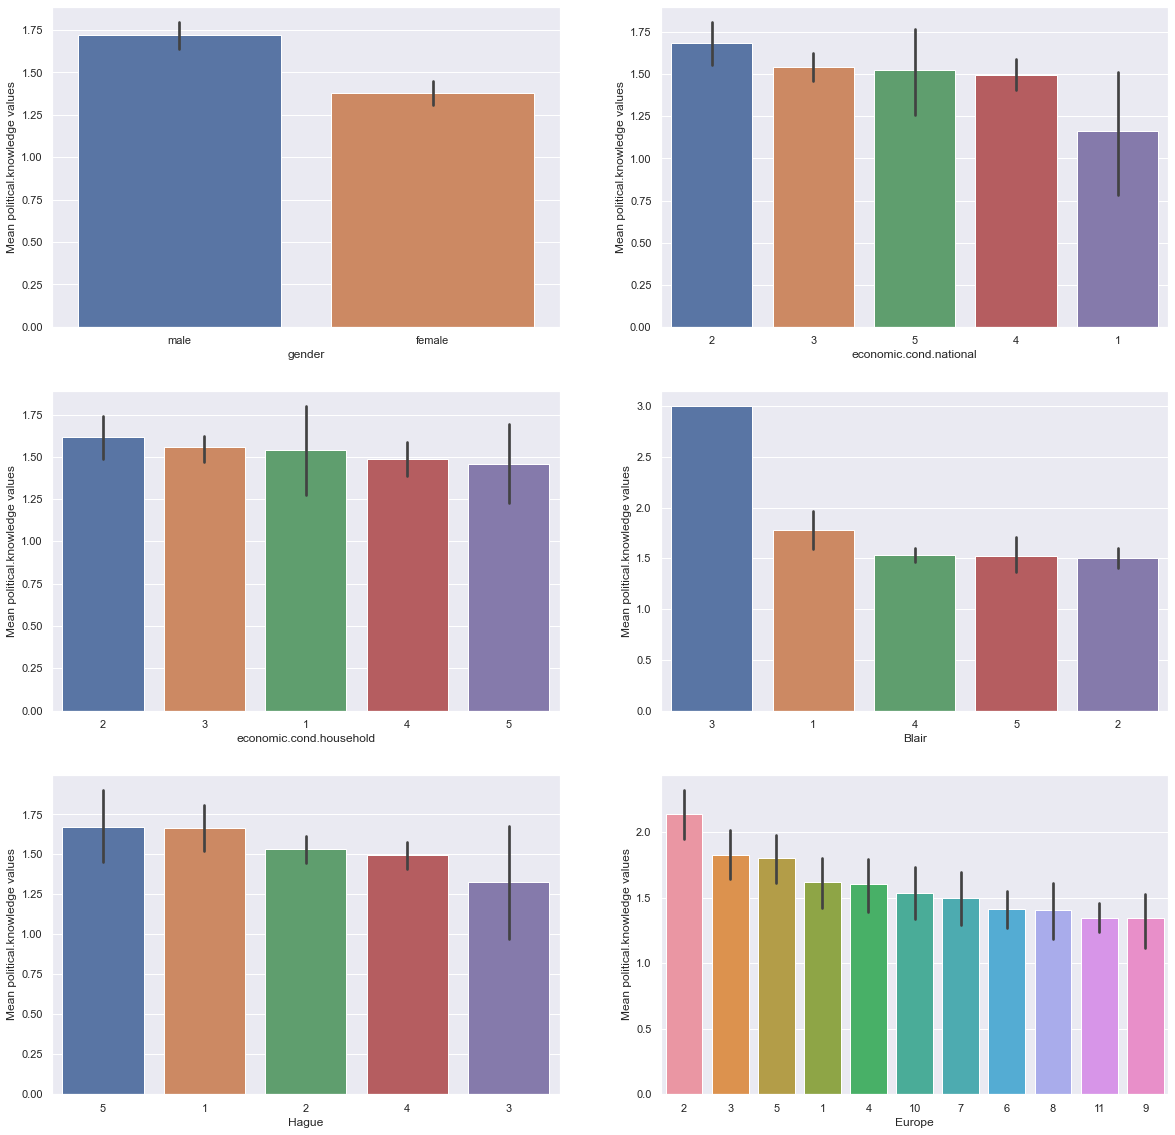

In [45]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[6]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[6], data = election,
                order = election.groupby(j)[num_vars[6]].mean().sort_values(ascending = False).index)
        plt.ylabel('Mean ' + str(num_vars[6]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[6]) + '\' for each category of the different categorical variables :')

## Inferences:
- **The male voters seem to have a litte higher knowledge on an average on the stand of the Parties' on European Integration.**
- **Overall it may be observed that voters having more Eurosceptic views seem to have lower knowledge on an average on the stand of the Parties' on European Integration.**

## Bivariate Analysis with the Target Variable: 
- The target variable is 'vote'.

**Distribution of the numerical variables with respect to Holiday packages:**

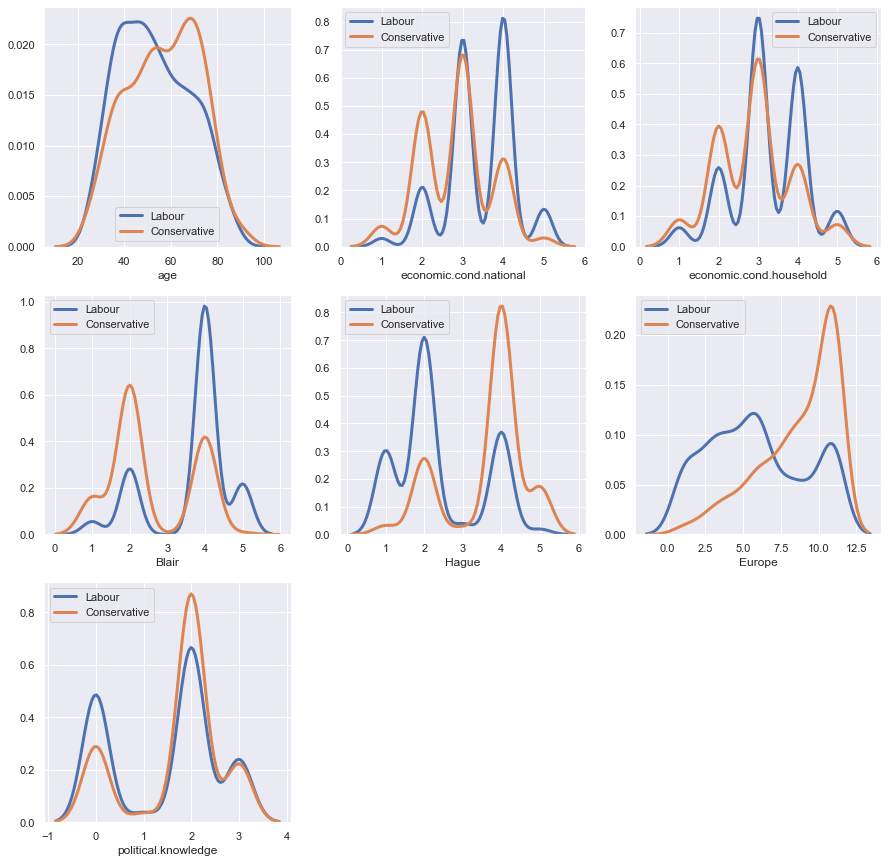

In [46]:
sns.distributions._has_statsmodels = False
count = 1
plt.figure(figsize = (15,15))
for i in num_vars:
    plt.subplot(3,3,count)

    
    sns.distplot(election[election['vote']== 'Labour'][i], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Labour')
    
    sns.distplot(election[election['vote']== 'Conservative'][i], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Conservative')
    
    
    count = count +1
sns.distributions._has_statsmodels = True
printmd('**Distribution of the numerical variables with respect to Holiday packages:**')

## Inferences:
- **For all the numerical variables the density differences in the distributions could be observed for Labour Party and Conservative Party, thus indicating that these variables are expected to be useful in the classifiaction of the target variable.**


**Mean values of the different numerical variables for each category in target variable:**

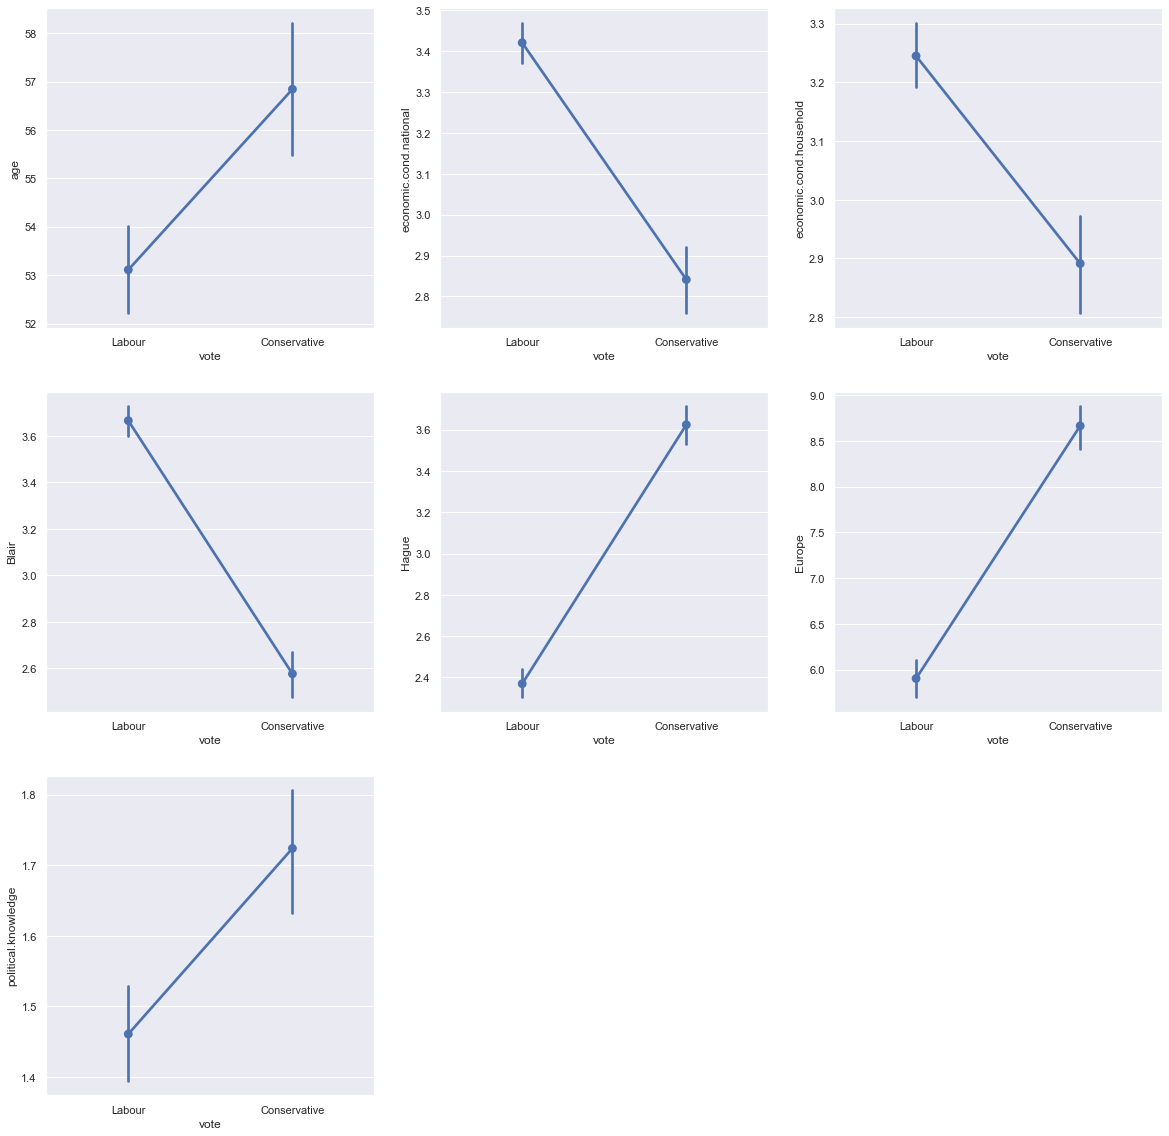

In [47]:
count = 1
plt.figure(figsize = (20,20))
for i in num_vars:
    plt.subplot(3,3,count)
    sns.pointplot(x = 'vote', y = i, data = election)
    count = count +1
printmd('**Mean values of the different numerical variables for each category in target variable:**')

**Mean values of the different numerical variables for each category in target variable:**

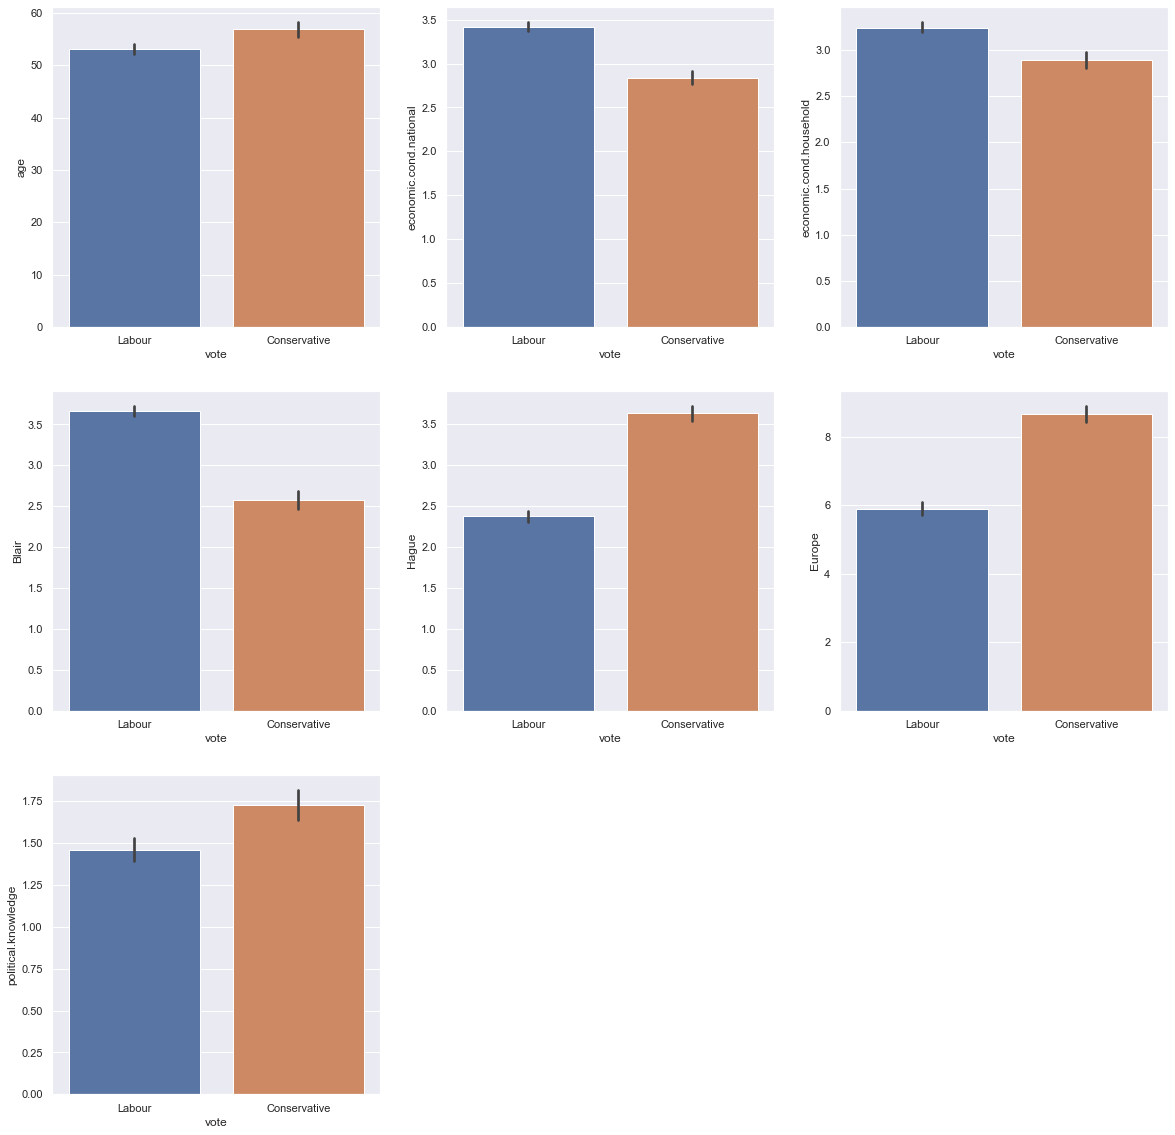

In [48]:
count = 1
plt.figure(figsize = (20,20))
for i in num_vars:
    plt.subplot(3,3,count)
    sns.barplot(x = 'vote', y = i, data = election)
    count = count +1
printmd('**Mean values of the different numerical variables for each category in target variable:**')

## Inferences:
- **The average age of voters in favour of Conservative Party seem to be a little higher than those in favour of Labour Party.**
- **The average ratings of voters according to current national economic condition and current household economic condition seem to be higher for those in favour of Labour Party than those in favour of Conservative Party.**
- **As expected the average ratings of voters in favour of Blair, the Labour Party leader seem to be higher for Labour Party as compared to Conservative Party. Similarly the average ratings of voters in favour of Hague, the Conservative Party leader seem to be higher for Conservative Party as compared to Labour Party.**
- **Those voters who show more Eurosceptic sentiments on an average are in favour of Conservative Party as compared to Labour Party.**
- **The ratings of voters who have knowledge of the parties' stand on European Integration on an average seem to be low for those in favour of Labour Party as compared to Conservative Party.**

**Perecentage wise tabulation of gender of voters as per Party choice :**

gender        female   male
vote                       
Conservative   31.81  28.63
Labour         68.19  71.37


**Countplot of gender Variable according to Party choice :**

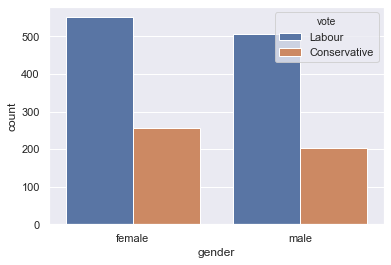

In [49]:
sns.countplot(election['gender'], hue  = election['vote'])
printmd('**Perecentage wise tabulation of gender of voters as per Party choice :**')
print(round(pd.crosstab(index = election['vote'], columns = election['gender']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of gender Variable according to Party choice :**')

## Inferences:
- No special observation can be made as the overall percentage of votes in favour of either Party remain same even when the gender of voters are considered.

**Perecentage wise tabulation of National economic condition ratings given by voter as per Party choice :**

economic.cond.national      1      2      3      4      5
vote                                                     
Conservative            56.76  54.69  32.95  16.91  10.98
Labour                  43.24  45.31  67.05  83.09  89.02


**Countplot of economic.cond.national variable according to Party choice :**

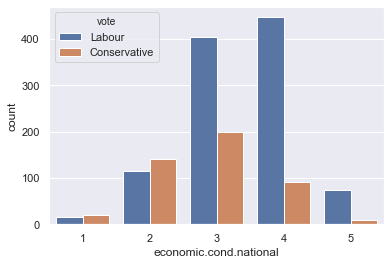

In [50]:
sns.countplot(election['economic.cond.national'], hue  = election['vote'])
printmd('**Perecentage wise tabulation of National economic condition ratings given by voter as per Party choice :**')
print(round(pd.crosstab(index = election['vote'], columns = election['economic.cond.national']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of economic.cond.national variable according to Party choice :**')

## Inferences:
- **Voters who have given higher ratings for current national economic condition show favour the Labour Party more.** 

**Perecentage wise tabulation of household economic condition ratings given by voter as per Party choice :**

economic.cond.household      1     2      3      4     5
vote                                                    
Conservative             43.08  45.0  30.54  19.77  25.0
Labour                   56.92  55.0  69.46  80.23  75.0


**Countplot of economic.cond.household Variable according to Party choice :**

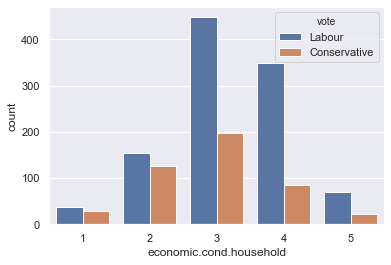

In [51]:
sns.countplot(election['economic.cond.household'], hue  = election['vote'])
printmd('**Perecentage wise tabulation of household economic condition ratings given by voter as per Party choice :**')
print(round(pd.crosstab(index = election['vote'], columns = election['economic.cond.household']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of economic.cond.household Variable according to Party choice :**')

## Inferences:
- **Voters who have given higher ratings for current household economic condition favour the Labour Party more.** 

**Perecentage wise tabulation of ratings given in favour of Blair by voter as per Party choice :**

Blair             1     2      3      4      5
vote                                          
Conservative  60.82  55.3  100.0  18.85   1.97
Labour        39.18  44.7    0.0  81.15  98.03


**Countplot of Blair Variable according to Party choice :**

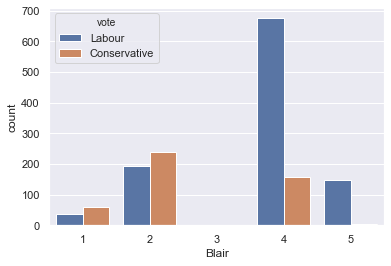

In [52]:
sns.countplot(election['Blair'], hue  = election['vote'])
printmd('**Perecentage wise tabulation of ratings given in favour of Blair by voter as per Party choice :**')
print(round(pd.crosstab(index = election['vote'], columns = election['Blair']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of Blair Variable according to Party choice :**')

## Inferences:
- **Voters who have given higher ratings for Blair favour the Labour Party more.** 

**Perecentage wise tabulation of  ratings given in favour of Hague by voter as per Party choice :**

Hague             1     2      3      4      5
vote                                          
Conservative   4.72  15.4  24.32  51.35  80.82
Labour        95.28  84.6  75.68  48.65  19.18


**Countplot of  Hague Variable according to Party choice :**

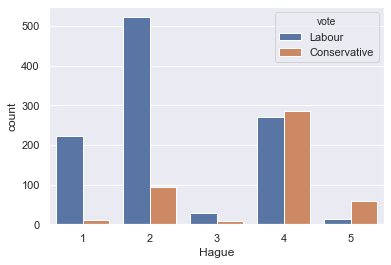

In [53]:
sns.countplot(election['Hague'], hue  = election['vote'])
printmd('**Perecentage wise tabulation of  ratings given in favour of Hague by voter as per Party choice :**')
print(round(pd.crosstab(index = election['vote'], columns = election['Hague']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of  Hague Variable according to Party choice :**')

## Inferences:
- **Voters who have given ratings of 3 or less for Hague are more in favour of the Labour party. Voters who have given a rating of 4 for Hague seem to be equally in favour of either parties, and voters who have given a rating of 5 for Hague seem to favour the Conservative party more.** 

**Perecentage wise tabulation of ratings according to Eurosceptic Sentiment level by voter as per Party choice :**

Europe           1      2      3      4      5      6      7      8      9   \
vote                                                                          
Conservative   4.59   7.79  10.94  14.29  16.26  16.91  37.21  43.24  50.45   
Labour        95.41  92.21  89.06  85.71  83.74  83.09  62.79  56.76  49.55   

Europe           10     11  
vote                        
Conservative  53.47  50.89  
Labour        46.53  49.11  


**Countplot of  Europe Variable according to Party choice :**

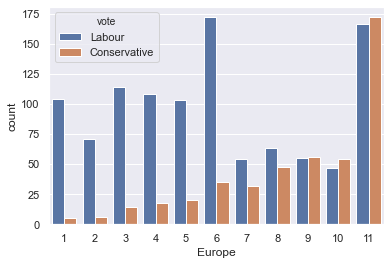

In [54]:
sns.countplot(election['Europe'], hue  = election['vote'])
printmd('**Perecentage wise tabulation of ratings according to Eurosceptic Sentiment level by voter as per Party choice :**')
print(round(pd.crosstab(index = election['vote'], columns = election['Europe']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of  Europe Variable according to Party choice :**')

## Inferences:
- As the Eurosceptic sentiments of the voters increase the percentage of voters in favour of Conservative Party also increase. For the lower ratings it is observed that the percentage of voters is much higher for Labour Party. **Thus overall the voters who have less Eurosceptic sentiments seem to favour the Labour Party more.**

**Perecentage wise tabulation of ratings according to knowledge of parties positions on European integration by voter as per Party choice :**

political.knowledge     0      1      2      3
vote                                          
Conservative         20.7  28.95  36.47  28.92
Labour               79.3  71.05  63.53  71.08


**Countplot of political.knowledge Variable according to Party choice :**

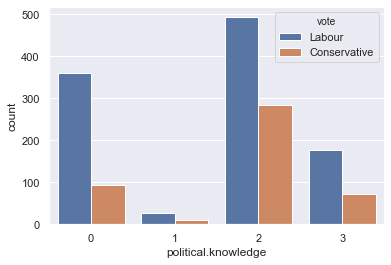

In [55]:
sns.countplot(election['political.knowledge'], hue  = election['vote'])
printmd('**Perecentage wise tabulation of ratings according to knowledge of parties positions on European integration by voter as per Party choice :**')
print(round(pd.crosstab(index = election['vote'], columns = election['political.knowledge']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of political.knowledge Variable according to Party choice :**')

## Inferences:
- No particular trend could be observed here.

## Multivariate Analysis with the Target Variable: 

**Average values according to gender of voters as per Party choice:**

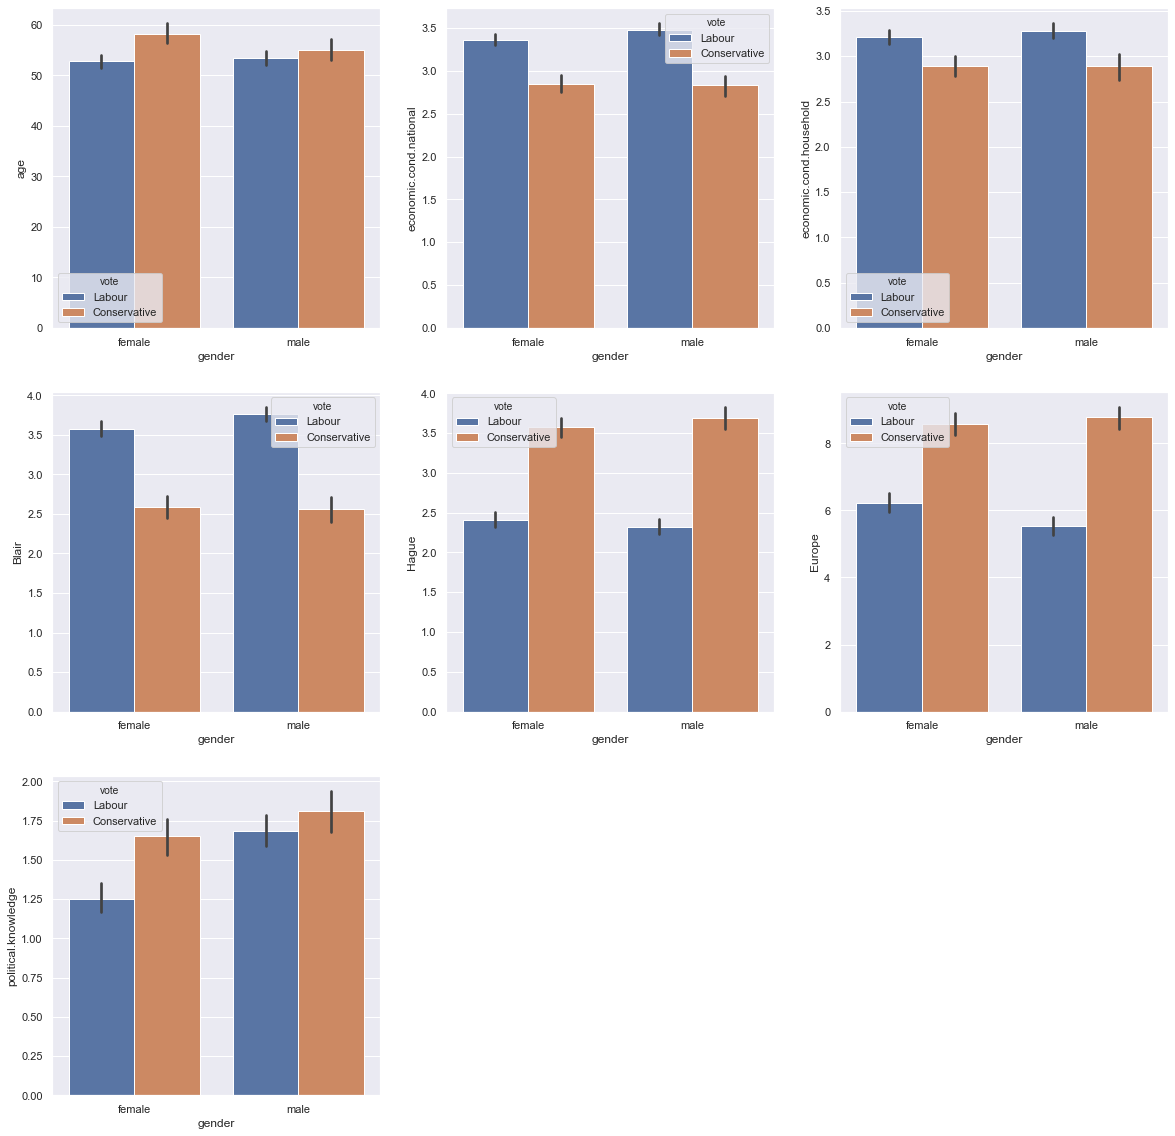

In [56]:
count = 1
plt.figure(figsize = (20,20))
for i in num_vars:
    plt.subplot(3,3,count)
    sns.barplot(x = 'gender', y = i, data = election, hue = 'vote')
    count = count +1
printmd('**Average values according to gender of voters as per Party choice:**')

## Inferences:
- No different trend based on the gender could be observed.

Mean values of 'age' for each category of the different categorical variables :


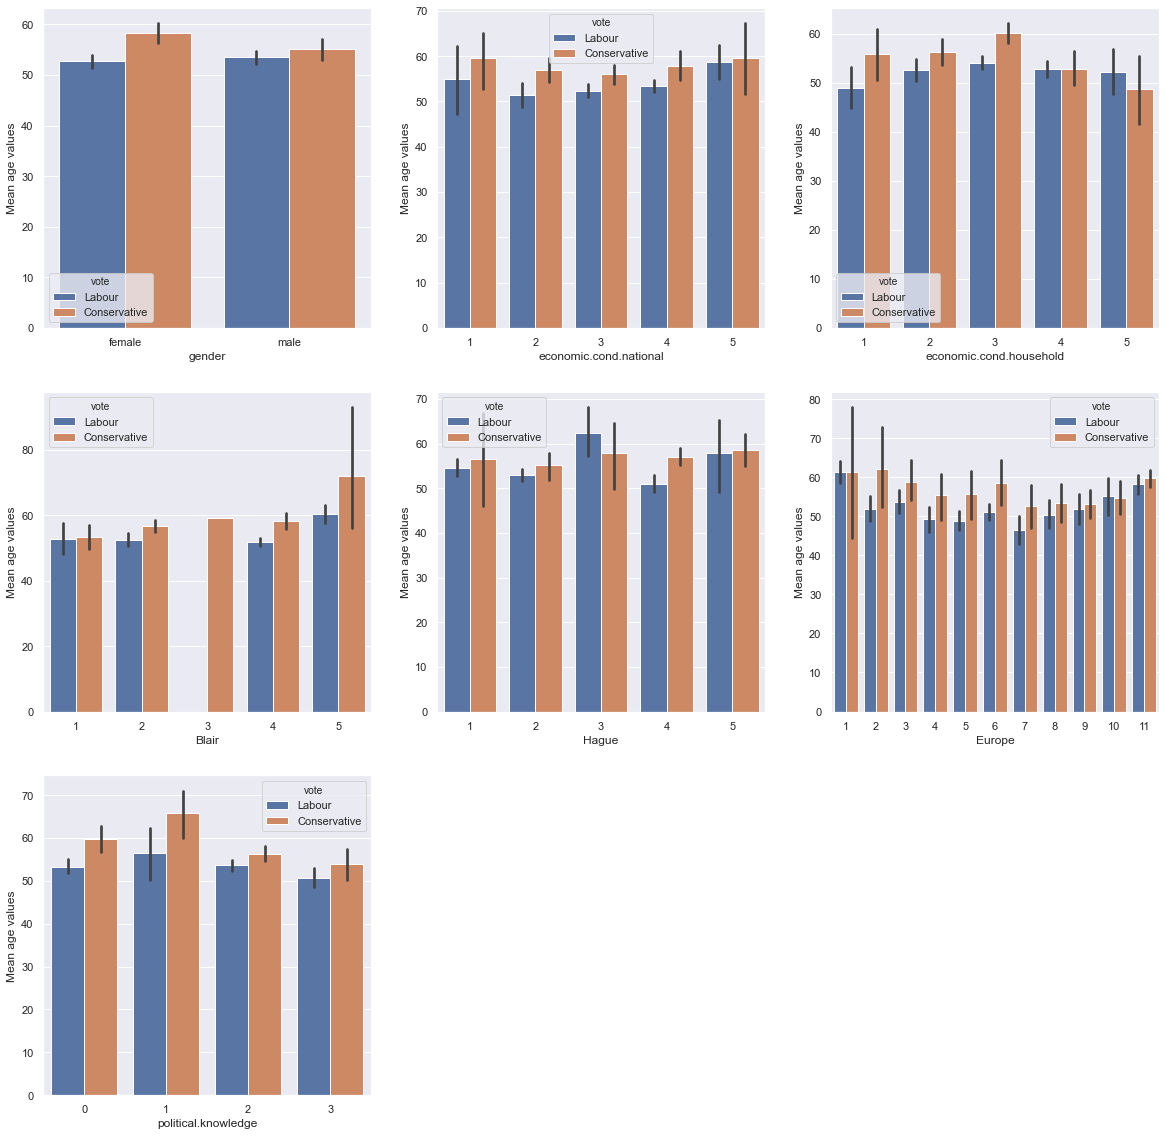

In [57]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    plt.subplot(3,3,count)
    sns.barplot(x = j, y = num_vars[0], data = election, hue = 'vote')
    plt.ylabel('Mean ' + str(num_vars[0]) + ' values')
    plt.xlabel(str(j))
    count = count + 1
print('Mean values of \''  + str(num_vars[0]) + '\' for each category of the different categorical variables :')

## Inferences:
- Mean age of voters in favour of Conservative Party was observed earlier and similar observations can be observed for the different categories.

Mean values of 'economic.cond.national' for each category of the different categorical variables :


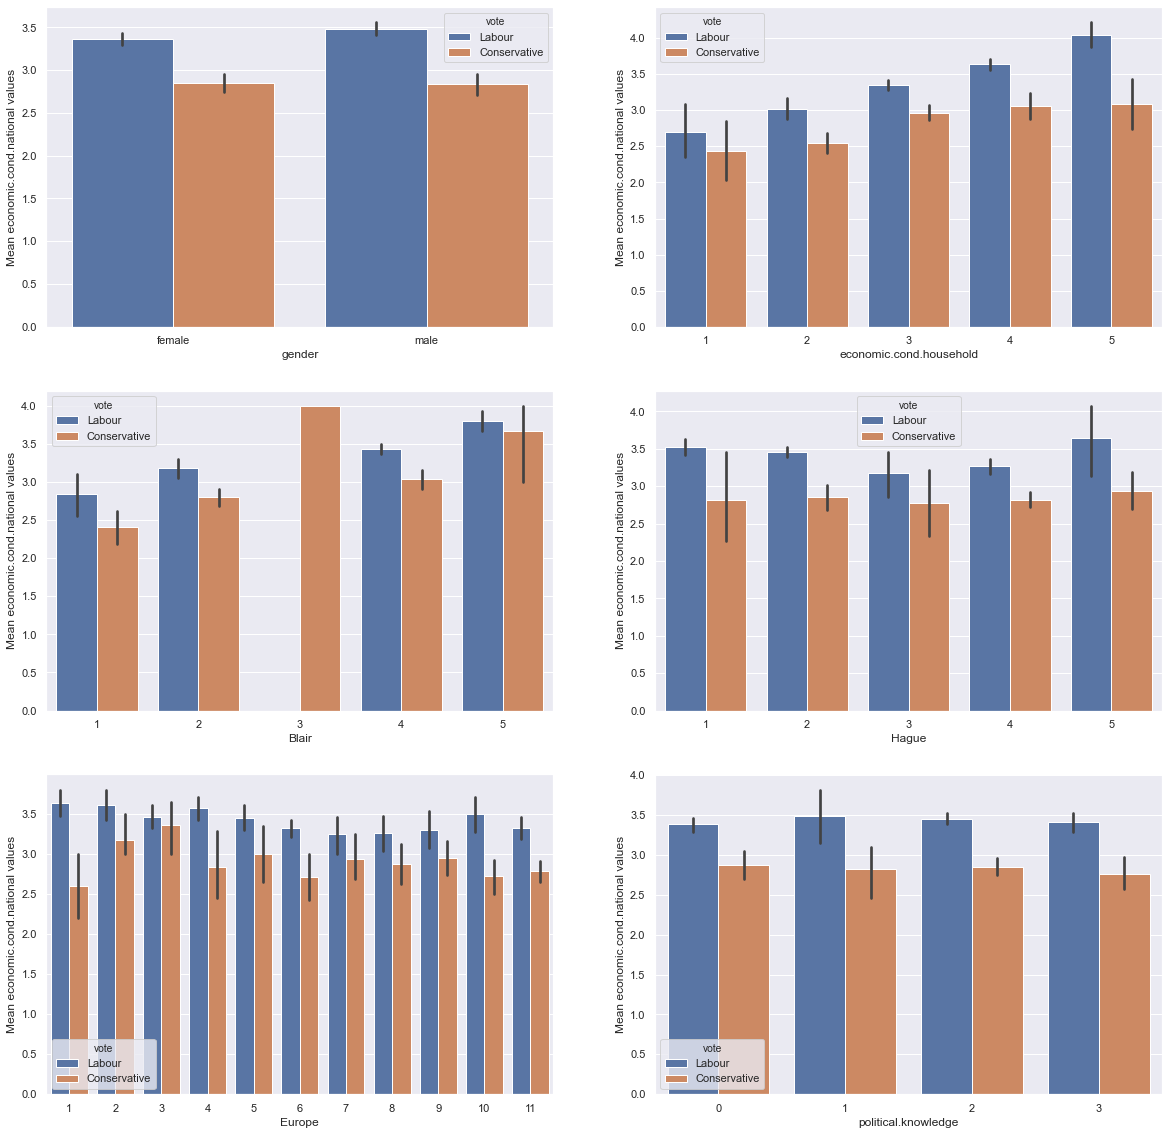

In [58]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[1]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[1], data = election, hue = 'vote')
                
        plt.ylabel('Mean ' + str(num_vars[1]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[1]) + '\' for each category of the different categorical variables :')

## Inferences:
- Mean ratings for current national economic condition in favour of Labour Party was observed earlier and similar observations can be observed for the different categories.

Mean values of 'economic.cond.household' for each category of the different categorical variables :


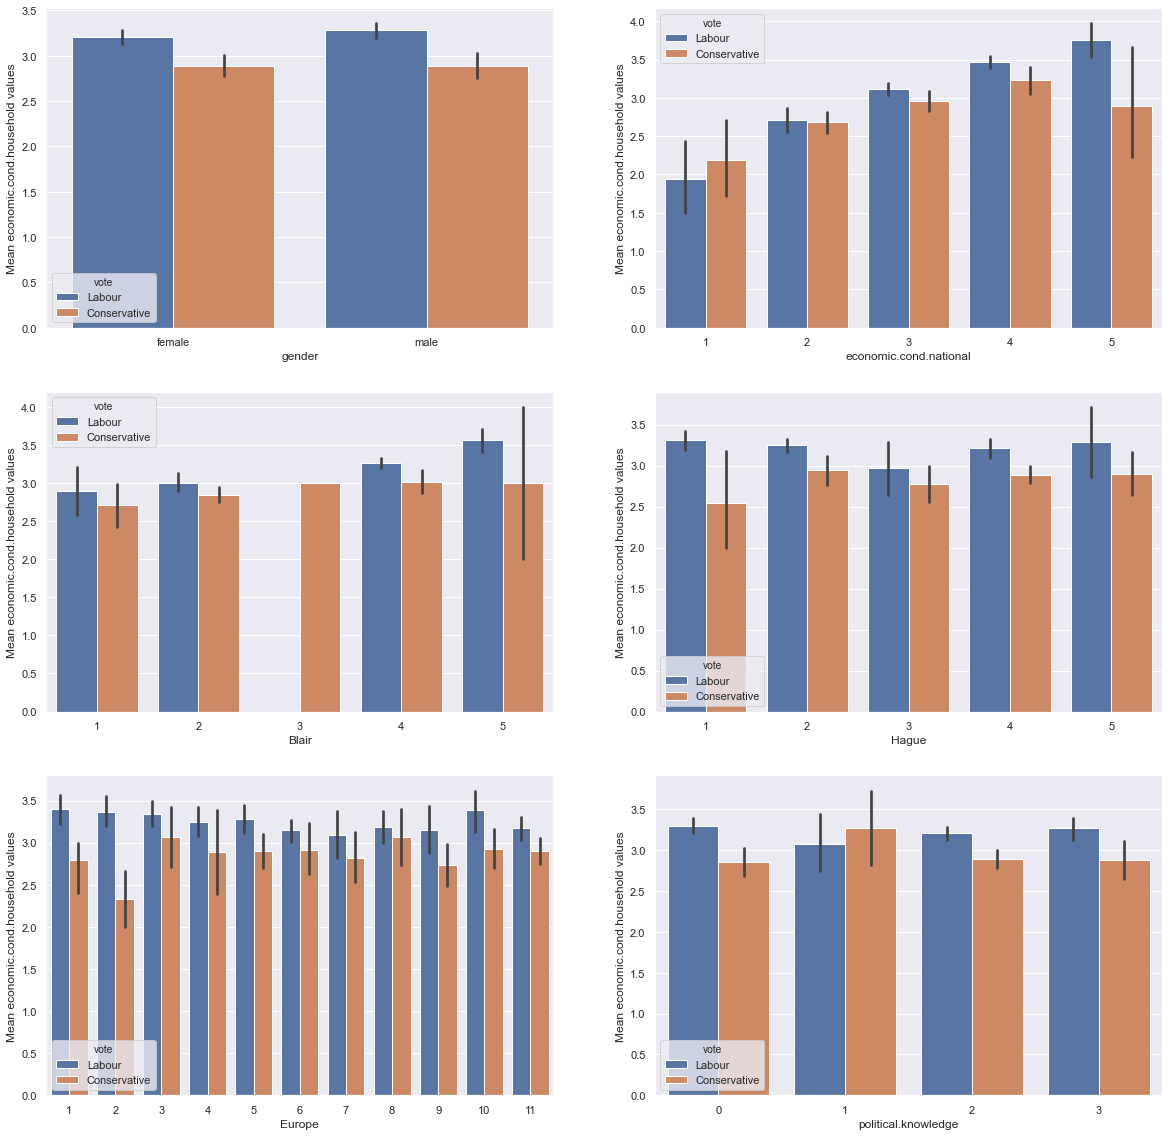

In [59]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[2]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[2], data = election, hue = 'vote')
                
        plt.ylabel('Mean ' + str(num_vars[2]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[2]) + '\' for each category of the different categorical variables :')

## Inferences:
- No special observations could be observed as compared to before.

Mean values of 'Blair' for each category of the different categorical variables :


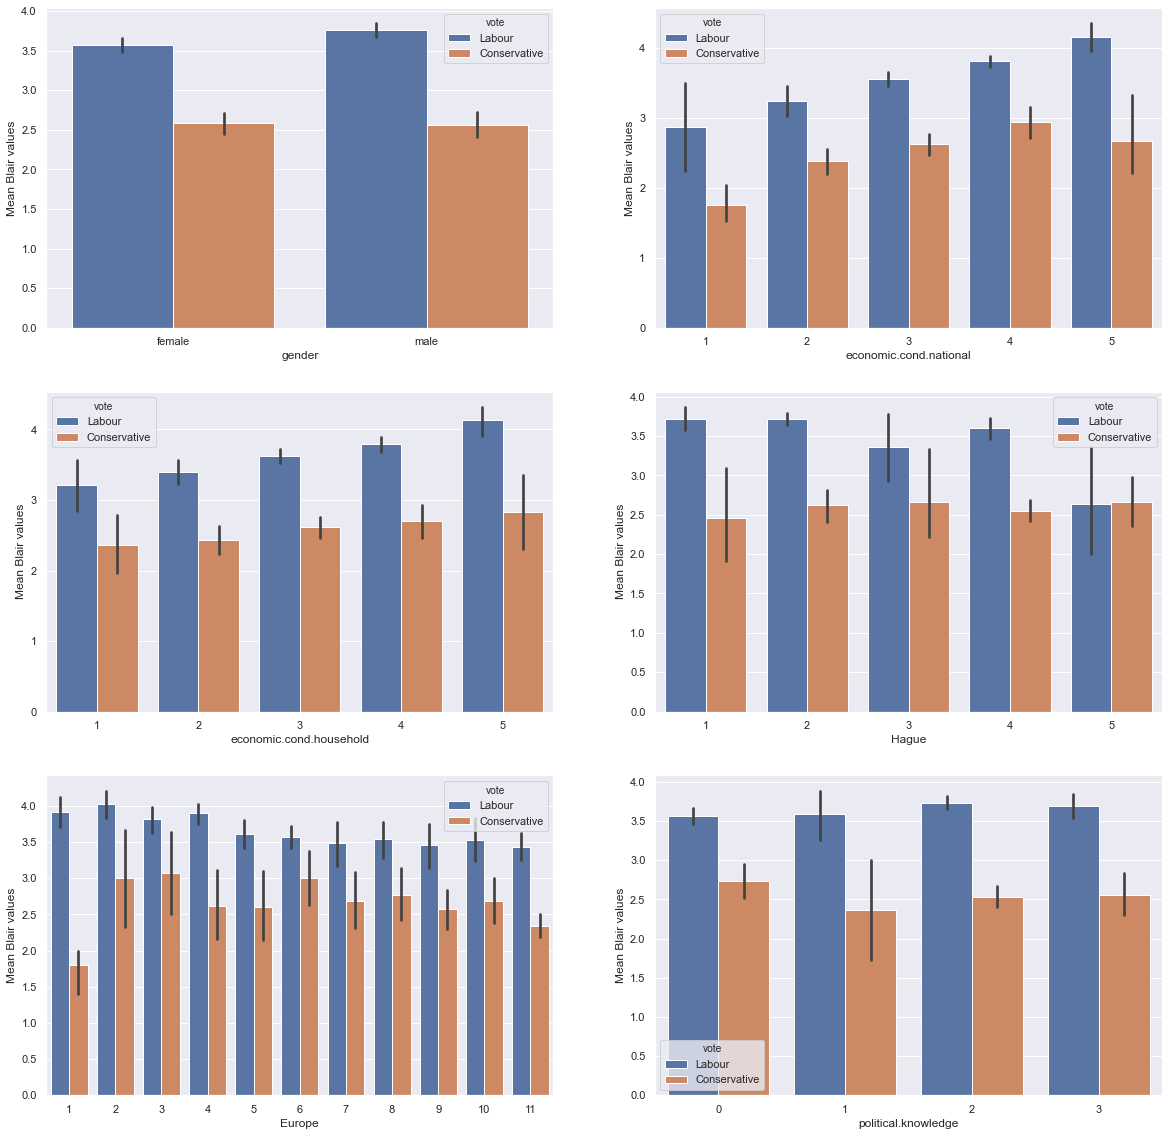

In [60]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[3]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[3], data = election, hue = 'vote')
                
        plt.ylabel('Mean ' + str(num_vars[3]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[3]) + '\' for each category of the different categorical variables :')

## Inferences:
- No special observations could be observed as compared to analysis above.

Mean values of 'Hague' for each category of the different categorical variables :


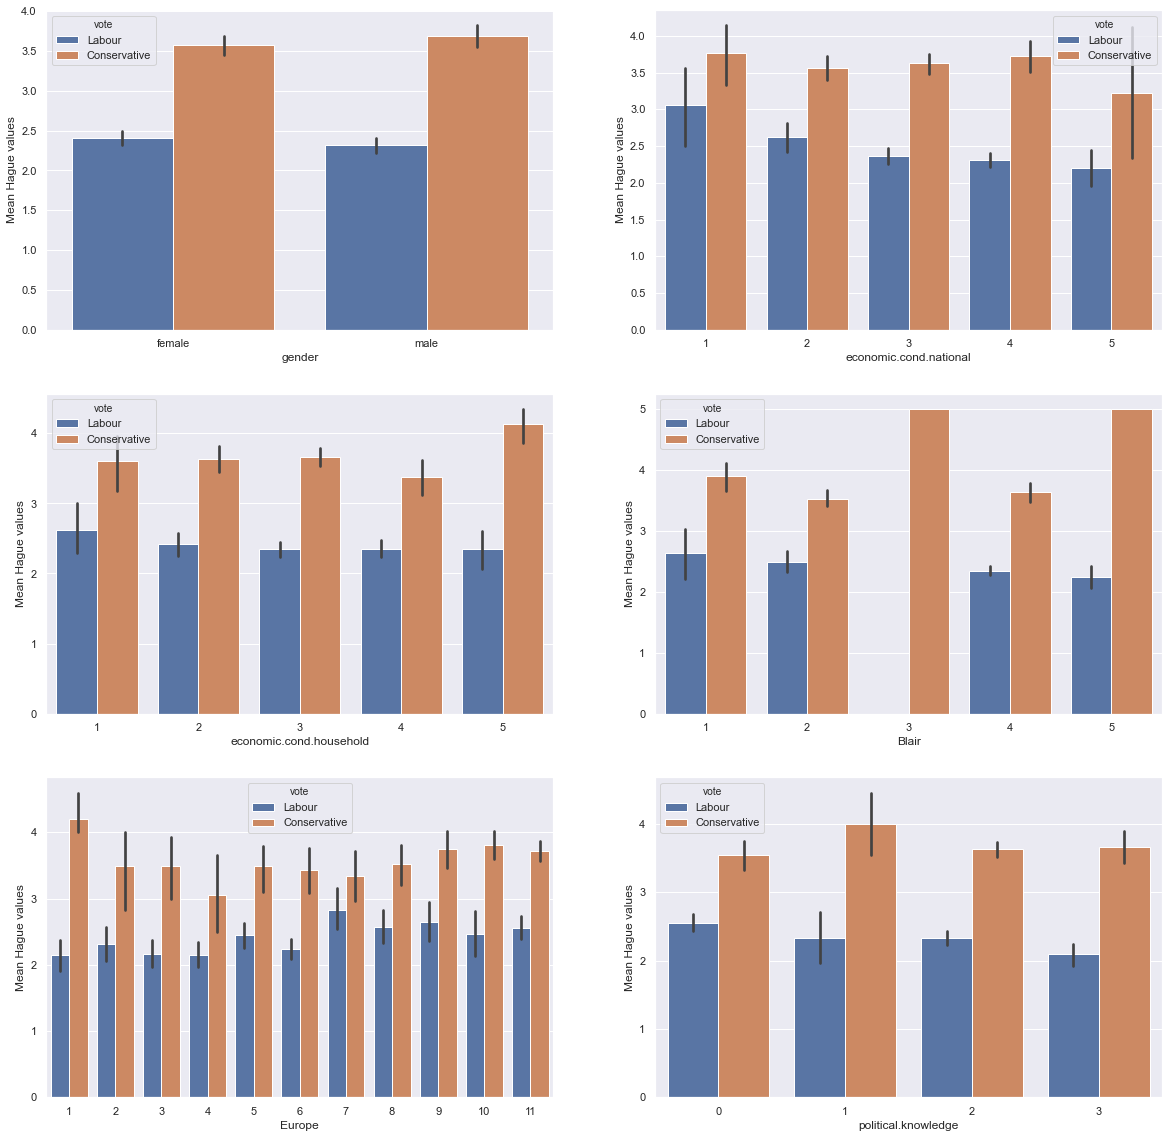

In [61]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[4]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[4], data = election, hue = 'vote')
                
        plt.ylabel('Mean ' + str(num_vars[4]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[4]) + '\' for each category of the different categorical variables :')

## Inferences:
- No special observations could be observed as compared to analysis above.

Mean values of 'Europe' for each category of the different categorical variables :


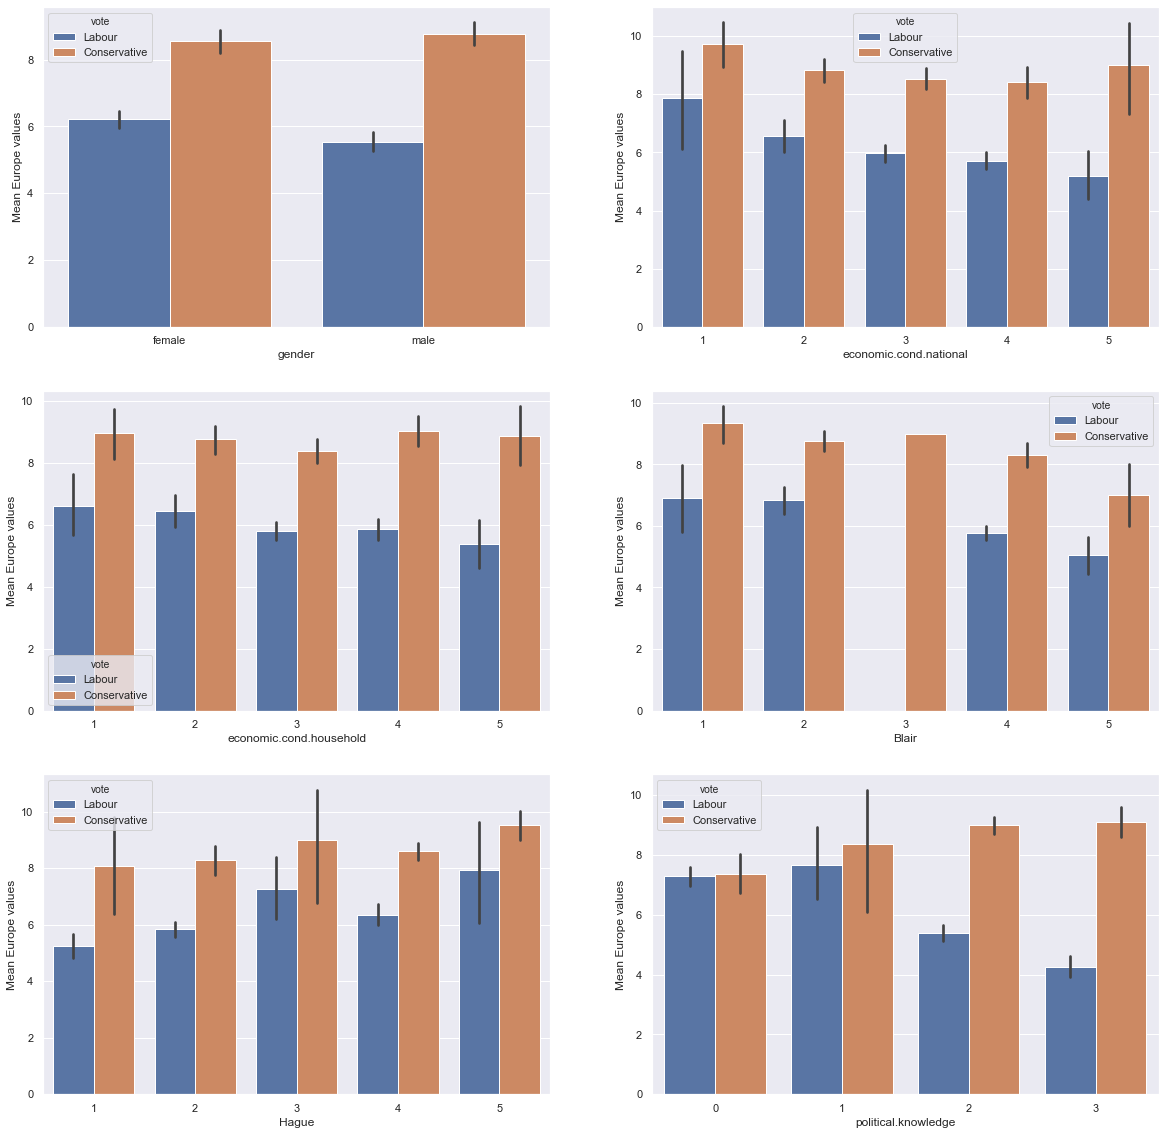

In [62]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[5]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[5], data = election, hue = 'vote')
                
        plt.ylabel('Mean ' + str(num_vars[5]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[5]) + '\' for each category of the different categorical variables :')

## Inferences:
- No special observations could be observed as compared to analysis above.

Mean values of 'political.knowledge' for each category of the different categorical variables :


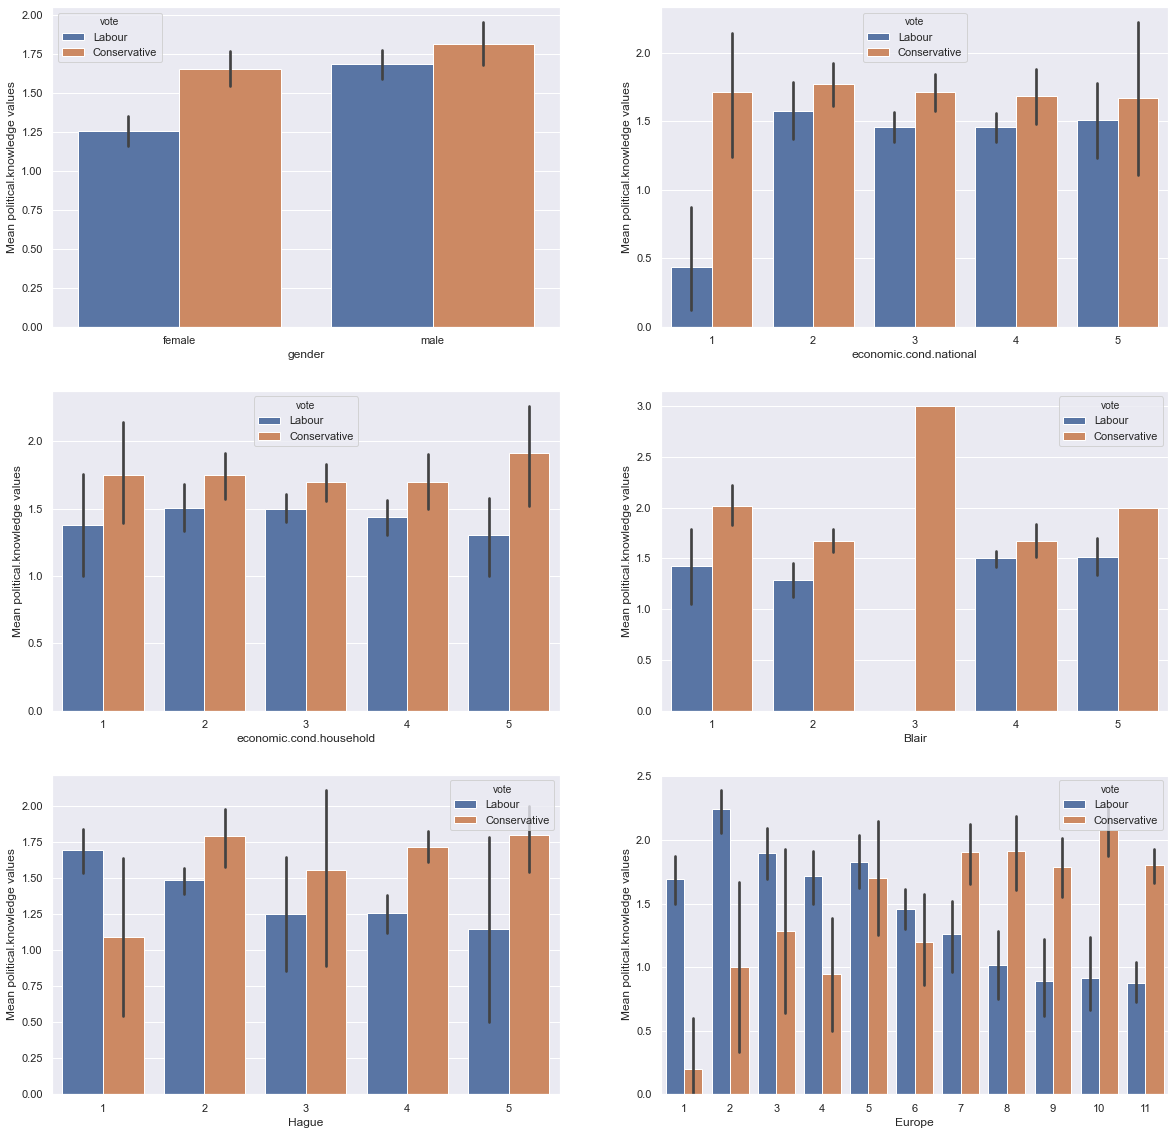

In [63]:
count = 1
plt.figure(figsize = (20,20))

for j in ind_cat_vars:
    if j != num_vars[6]:
        plt.subplot(3,2,count)
        sns.barplot(x = j, y = num_vars[6], data = election, hue = 'vote')
                
        plt.ylabel('Mean ' + str(num_vars[6]) + ' values')
        plt.xlabel(str(j))
        count = count + 1
print('Mean values of \''  + str(num_vars[6]) + '\' for each category of the different categorical variables :')

## Inferences:
- No special observations could be observed as compared to analysis above.

# Final Inferences from EDA:
- **Univariate Analysis :** Some important insights are mentioned below:
    - **'age' :** It is observed that voters of all ages are taken in the survey with nearly equal representation of the different age groups. Although it may be noted that the number of higher and lower aged voters is comparitively less. There does not seem to be any skewness in the distribution.
    - **'economic.cond.national' :** It is observed that most surveyed voters have given an average ratings of 3 or 4.
    - **'economic.cond.household' "** It is observed that most surveyed voters have given an average ratings of 3 or 4.
    - **'Blair' :** Most voters gave a rating of 4 and above.
    - **'Hague' :** Most voters gave a rating of 2 and below.
    - **'Europe' :** Although above 20% person of the surveyed voters are strongly Eurosceptic by giving a rating of 11, the rest of the surveyed voters seem to be nearly equally distributed from low to high Eurosceptic sentiments, with only a comparitively higher percentage of voters giving an average rating of 6. 
    - **'political.knowledge' :** Most of the surveyed voters have some idea about the Labour and Conservative Party's positions on European integration. But around 30% have no idea on this front.
    - **'gender' :** It is observed that male and female are nearly same.
- **Outliers :** The outliers are observed using IQR method. 
    - It is observed that all the ratings of 1 in 'economic.cond.national' and 'economic.cond.household' variables are considered as outliers by IQR method. **These values are not replaced and kept as it is.**
- **Bivariate/Multivariate Analysis between the Independent Variables:**
    - The pairplot and the correlation values between the numerical values show that there is no high correlation observed.
    - The Bivariate analysis of 'age' with other independent variables give us the following insights:
        - Male and female of all ages were covered in the survey.
        - The mean and median age of voters seem to higher for extreme views on Eurosceptic sentiment both in favour and against. The variance observed in the poinplot is also less and hence it may be concluded that more aged voters have strong 'Eurosceptic' sentiments both in favour and against.
    - The Bivariate analysis of 'economic.cond.national' with other independent variables give us the following insights:
        - As expected similar ratings trend is observed for national economic conditions and household economic conditions, i.e. higher mean ratings of current national economic condition observed for voters who gave high ratings for household economic coditions.
        - The surveyed voters who have lower ratings of 1 and 2 for Blair of Labour Party also have less average ratings for the current national economic situation but interestingly opposite trend is observed for Hague of the Conservative Party. This may give us the insight that voters who have more positive outlook for the current national economic condition seem to be more in favour of Blair of the Labour Party.
        - The voters who show more Eurosceptic sentiments also have lower mean ratings for the current national economic condition. Thus it may be inferred that the voters consider the European integration to have an impact on the current national economic condition *(note that the exit poll is considered before Brexit ).*
    - The Bivariate analysis of 'economic.cond.household' with other independent variables it is observed to have similar trends like the variable 'economic.cond.national' with variables 'Blair' and 'Hague'.
    - The Bivariate analysis of 'Blair' with other independent variables give us the following insights:
        - The mean ratings for Blair seem to decrease with decrease in ratings of the national economic and household economic conditions. This may suggest that the voters' on an average who are in favour of Blair also seem to have overall positive outlook on the current national and household economic condition.
        - As expected voters who have higher ratings for Hague seem to have lower mean ratings for Blair and vice versa.
        - Overall it is observed that the mean ratings for Blair is more for voters who have less Eurosceptic sentiments. This may suggest Blair's agenda for the election may be in favour of staying in the Eurpean Union or in similar lines *(note that the exit poll is considered before Brexit)*.
    - The Bivariate analysis of 'Hague' with other independent variables seem to follow a opposite trend of 'Blair'.
    - The Bivariate analysis of 'Europe' with other independent variables give the same insights as mentioned above. Only new insight is observed with 'political.knowledge': overall it may be observed that voters with less or no knowledge on the either Parties' stand on European Integration seem to have higher Eurosceptic sentiment on an average and the voters with more knowledge seem to have less Eurosceptic sentiments on an average.
    - The Bivariate analysis of 'political.knowledge' with other independent variables give us the following insights:
        - The male voters seem to have a litte higher knowledge on an average on the stand of the Parties' on European Integration.
        - Overall it may be observed that voters having more Eurosceptic views seem to have lower knowledge on an average on the stand of the Parties' on European Integration.
- **The important insights from the Bivariate/Multivariate analysis with the Target variable 'vote' are given in Answer 1.8.**

In [64]:
election_copy = election.copy()

## Data Preprocessing:

## Outliers:
- As observed before most of the ratings given by the surveyed voters for 'economic.cond.national' and 'economic.cond.household' variables are 3 or above, the ratings of 1 are considered as outliers by the IQR method. These are not replaced and kept as it is.

## Scaling:
- **Our dataset has age as variable which ranges from 24 to 93 and also there are variables which are ordered categorical type and are in the range of 1 to 5 or 1 to 11 or 0 to 3. Moreover there is nominal categorical variable which after encoding will have only two values 0 and 1. Thus we can observe the magnitudes of the categorical variables are not same as that of the 'age' variable.**
- **Now, after we have established the fact that there is magnitude difference between variables, next we need consider the models we are going to use and see if they require scaling.** The different models that we are expected to use are:
    1. **Logistic Regression:** For proper interpretation of coeffiecients, scaling is required but it does not affect the classification task of the model. Hence scaling is not necessary in this case.
    2. **LDA:** Scaling is not necessary in case of LDA.
    3. **KNN:** It uses different distance metrics to find out the nearest neighbours and hence scaling is necessary for KNN.
    4. **Naive Bayes:** Scaling is not necessary in case of Naive Bayes.
    5. **SVM:** Since Hingle loss or penalty is proprtional to distance, hence scaling is necessary in SVM.
    6. **Bagging (Random Forest):** Scaling is not necessary in case of Random Forest.
    7. **Boosting (Adaptive and XGB):** Scaling is not necessary in case of Boosting models.
- **Thus we have observed above that scaling is necessary for certain algorithms like KNN and SVM, although not necessary in other models. Since scaling will not negatively affect the models even when it is not necessary, we will do scaling.**
- **Thus considering the magnitude difference between the independent variables and the affect of this on the models, we can say scaling is necessary. The age variable is scaled as the other variables are categorical in nature and scaling them is not appropriate.**

In [65]:
printmd('**Observing the magnitude difference between the different independent variables :**')
election.describe().drop(['count', '25%', '50%', '75%', 'std']).T

**Observing the magnitude difference between the different independent variables :**

mean   min   max
age                      54.241266  24.0  93.0
economic.cond.national    3.245221   1.0   5.0
economic.cond.household   3.137772   1.0   5.0
Blair                     3.335531   1.0   5.0
Hague                     2.749506   1.0   5.0
Europe                    6.740277   1.0  11.0
political.knowledge       1.540541   0.0   3.0

## Conversion of 'object' data type variables:
- It is a prerequisite for Modelling that the object data type independent variables are converted to numerical data type.
- All the ordered categorical variables are already integer and onle the gender variable is required to be encoded. Since it is a nominal variable it is better is dummy encoding is done, but as there are only two categories present label encoding will also give similar result. Hence Label encoding is done.

In [66]:
printmd('**The data types of the dataset before conversion of Object data types:**')
election.dtypes

**The data types of the dataset before conversion of Object data types:**

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [67]:
for feature in election.columns: 
    if election[feature].dtype == 'object':
        election[feature] = pd.Categorical(election[feature]).codes 

In [68]:
printmd('**The data types of the dataset before conversion of Object data types:**')
election.dtypes

**The data types of the dataset before conversion of Object data types:**

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

## Inferences:
- The object data types are converted to numerical. Now the data types of all the variables are in acceptable format for Modeling.
- **In the target variable 'vote', the category: 'Conservative' is coded as 0 and 'Labour' is coded as 1.**
- **In the variable 'geneder', the category: 'female' is coded as 0 and 'male' is coded as 1.**

## Train and Test split:

In [69]:
y = election['vote']
X = election.drop('vote', axis = 1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

In [71]:
print('Number of instances in Training set :', len(X_train))
print('Percentage of voters whose choice is Labour Party in training set', round(y_train.value_counts('Normalize').iloc[0]*100,2))
print('Percentage of voters whose choice is Conservative Party in training set', round(y_train.value_counts('Normalize').iloc[1]*100,2))

Number of instances in Training set : 1061
Percentage of voters whose choice is Labour Party in training set 71.07
Percentage of voters whose choice is Conservative Party in training set 28.93


In [72]:
print('Number of instances in Testing set :', len(X_test))
print('Percentage of voters whose choice is Labour Party in testing set', round(y_test.value_counts('Normalize').iloc[0]*100,2))
print('Percentage of voters whose choice is for Conservative Party in testing set', round(y_test.value_counts('Normalize').iloc[1]*100,2))

Number of instances in Testing set : 456
Percentage of voters whose choice is Labour Party in testing set 66.45
Percentage of voters whose choice is for Conservative Party in testing set 33.55


## Inferences:
- The number of instances in Training set is 1061 and in Testing set it is 456.
- The number of voters in Training set is 1061 out of which 71.07% are voters whose choice is Labour Party and 28.93% are voters whose choice is Conservative Party.
- The number of voters in Training set is 456 out of which 66.45% are voters whose choice is Labour Party and 33.55% are voters whose choice is Conservative Party.

## Scaling:

In [73]:
sc = StandardScaler()
train_age = sc.fit_transform(np.array(X_train['age']).reshape(-1,1))
test_age = sc.transform(np.array(X_test['age']).reshape(-1,1))

In [74]:
X_train.loc[:,'age'] = train_age
X_test.loc[:,'age'] = test_age

In [75]:
printmd('**Observing the Train Data after Scaling :**')
X_train.describe().drop(['count', '25%', '50%', '75%', 'std']).T

**Observing the Train Data after Scaling :**

mean       min        max
age                      1.887693e-16 -1.940665   2.502624
economic.cond.national   3.247879e+00  1.000000   5.000000
economic.cond.household  3.153629e+00  1.000000   5.000000
Blair                    3.357210e+00  1.000000   5.000000
Hague                    2.731385e+00  1.000000   5.000000
Europe                   6.658812e+00  1.000000  11.000000
political.knowledge      1.513666e+00  0.000000   3.000000
gender                   4.674835e-01  0.000000   1.000000

In [76]:
printmd('**Observing the Test Data after Scaling :**')
X_test.describe().drop(['count', '25%', '50%', '75%', 'std']).T

**Observing the Test Data after Scaling :**

mean       min        max
age                      0.022409 -1.940665   2.245042
economic.cond.national   3.239035  1.000000   5.000000
economic.cond.household  3.100877  1.000000   5.000000
Blair                    3.285088  1.000000   5.000000
Hague                    2.791667  1.000000   5.000000
Europe                   6.929825  1.000000  11.000000
political.knowledge      1.603070  0.000000   3.000000
gender                   0.467105  0.000000   1.000000

## Grid Search and Scoring used for hyperparameter Tuning:
- **In the given case study we want to predict both the voters whose choice is Labour Party  and voters whose choice is Conservative Party accurately. Thus type I error and type II error are both equally important for us. Thus 'f1 score' of both the Classes, i.e. 'Conservative' (0) and 'Labour' (1) is important, we choose 'f1_macro' (which is unweighted average 'f1 score' of both the classes) as the scoring parameter and maximize it in Grid Search.**
- **Certain parameters only work with a particular combination of hyperparameters. Hence if all combinations are used in a single Grid Search then it does not fit the grid search parameter. So separate Grid Search combinations are run. And finally based on evaluation parameters a particular combination is choosen.**

# ML Models:

## 1. Logistic Regression:

In [77]:
Log_Reg = LogisticRegression(random_state = 1) 

## Logistic Regression Grid Search:
**The restrictions are mainly in 'solver' and 'penalty' used, hence for these different combinations are tried and for the other hyperparameters a particular set of values are used for grid search.**
- The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization with primal formulation, or no regularization.
- The Elastic-Net regularization is only supported by the 'saga' solver.
- 'none', i.e. no regularization is applied is not supported by the liblinear solver.

## Hyperparameters Tuned:
- **'solver', 'penalty', 'max_iter', 'tol', 'C', 'class_weight'.**

## Combination 1:
- penalty: 'l2'
- solver: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

In [78]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2'],
    'max_iter': [ 1000, 5000, 10000 ], 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
     'C': [0.001,.009,0.01,.09,1,5,10,25],
     'class_weight': [{1: 0.5, 0: 0.5},{1:0.4, 0:0.6}, {1: 0.35, 0: 0.65}]
    }

In [79]:
grid_search_Log = GridSearchCV(estimator = Log_Reg, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [80]:
grid_search_Log.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.65, 1: 0.35}],
                         'max_iter': [1000, 5000, 10000], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs

In [81]:
printmd('**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**')
grid_search_Log.best_params_

**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**

{'C': 5,
 'class_weight': {1: 0.4, 0: 0.6},
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'sag',
 'tol': 0.1}

In [82]:
model_Log_Reg_1 = grid_search_Log.best_estimator_

## Evaluation Parameters:

In [83]:
ytrain_predict_Log = model_Log_Reg_1.predict(X_train)
ytest_predict_Log = model_Log_Reg_1.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Logistic Regression Combination 1:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_Log))
# Train AUC Score
probs = model_Log_Reg_1.predict_proba(X_train)
ytrain_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_Log))
# AUC Score
probs = model_Log_Reg_1.predict_proba(X_test)
ytest_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Logistic Regression Combination 1:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       307
           1       0.89      0.87      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.81      0.80      1061
weighted avg       0.84      0.83      0.83      1061

AUC Score Training Data: 0.890

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       153
           1       0.89      0.84      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.83      0.82      0.82       456

AUC Score Testing Data: 0.877


## Combination 2:
- penalty: 'l1'
- solver: 'liblinear', 'saga'

In [84]:
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1'],
    'max_iter': [ 1000, 5000, 10000 ], 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'C': [0.001,.009,0.01,.09,1,5,10,25],
    'class_weight': [{1: 0.5, 0: 0.5},{1:0.4, 0:0.6}, {1: 0.35, 0: 0.65}]
    }

In [85]:
grid_search_Log = GridSearchCV(estimator = Log_Reg, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [86]:
grid_search_Log.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.65, 1: 0.35}],
                         'max_iter': [1000, 5000, 10000], 'penalty': ['l1'],
                         'solver': ['liblinear', 'saga'

In [87]:
printmd('**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**')
grid_search_Log.best_params_

**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**

{'C': 25,
 'class_weight': {1: 0.35, 0: 0.65},
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.1}

In [88]:
model_Log_Reg_2 = grid_search_Log.best_estimator_

## Evaluation Parameters:

In [89]:
ytrain_predict_Log = model_Log_Reg_2.predict(X_train)
ytest_predict_Log = model_Log_Reg_2.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Logistic Regression Combination 2:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_Log))
# Train AUC Score
probs = model_Log_Reg_2.predict_proba(X_train)
ytrain_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_Log))
# AUC Score
probs = model_Log_Reg_2.predict_proba(X_test)
ytest_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Logistic Regression Combination 2:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       307
           1       0.90      0.85      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.81      0.80      1061
weighted avg       0.84      0.83      0.83      1061

AUC Score Training Data: 0.890

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       153
           1       0.90      0.83      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.83      0.82      0.83       456

AUC Score Testing Data: 0.882


## Combination 3:
- penalty: 'elasticnet'
- solver: 'saga'

In [90]:
param_grid = {
    'solver': ['saga'],
    'penalty': ['elasticnet'],
    'max_iter': [ 1000, 5000, 10000 ], 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'C':[0.001,.009,0.01,.09,1,5,10,25],
    'l1_ratio': [0.1, 0.3, 0.5, 0.9],
    'class_weight': [{1: 0.5, 0: 0.5},{1:0.4, 0:0.6}, {1: 0.35, 0: 0.65}]
    }

In [91]:
grid_search_Log = GridSearchCV(estimator = Log_Reg, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [92]:
grid_search_Log.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.65, 1: 0.35}],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.9],
                         'max_iter': [1000, 5000, 10000],
               

In [93]:
printmd('**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**')
grid_search_Log.best_params_

**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**

{'C': 5,
 'class_weight': {1: 0.35, 0: 0.65},
 'l1_ratio': 0.1,
 'max_iter': 1000,
 'penalty': 'elasticnet',
 'solver': 'saga',
 'tol': 0.001}

In [94]:
model_Log_Reg_3 = grid_search_Log.best_estimator_

## Evaluation Parameters:

In [95]:
ytrain_predict_Log = model_Log_Reg_3.predict(X_train)
ytest_predict_Log = model_Log_Reg_3.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Logistic Regression Combination 3:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_Log))
# Train AUC Score
probs = model_Log_Reg_3.predict_proba(X_train)
ytrain_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_Log))
# AUC Score
probs = model_Log_Reg_3.predict_proba(X_test)
ytest_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Logistic Regression Combination 3:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       307
           1       0.90      0.85      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.81      0.80      1061
weighted avg       0.84      0.83      0.83      1061

AUC Score Training Data: 0.890

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       153
           1       0.90      0.83      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.83      0.82      0.82       456

AUC Score Testing Data: 0.880


## Combination 4:
- penalty: 'none'
- solver: 'newton-cg', 'lbfgs', 'sag', 'saga'

In [96]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['none'],
    'max_iter': [ 1000, 5000, 10000 ], 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'class_weight': [{1: 0.5, 0: 0.5},{1:0.4, 0:0.6}, {1: 0.35, 0: 0.65}]
    }

In [97]:
grid_search_Log = GridSearchCV(estimator = Log_Reg, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [98]:
grid_search_Log.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.65, 1: 0.35}],
                         'max_iter': [1000, 5000, 10000], 'penalty': ['none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'tol': [1e-05, 0.0001, 0.0

In [99]:
printmd('**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**')
grid_search_Log.best_params_

**The best hyperparameters for Logistic Regression model among the provided input after tuning using Grid Search :**

{'class_weight': {1: 0.4, 0: 0.6},
 'max_iter': 1000,
 'penalty': 'none',
 'solver': 'sag',
 'tol': 0.1}

In [100]:
model_Log_Reg_4 = grid_search_Log.best_estimator_

## Evaluation Parameters:

In [101]:
ytrain_predict_Log = model_Log_Reg_4.predict(X_train)
ytest_predict_Log = model_Log_Reg_4.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Logistic Regression Combination 4:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_Log))
# Train AUC Score
probs = model_Log_Reg_4.predict_proba(X_train)
ytrain_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_Log))
# AUC Score
probs = model_Log_Reg_4.predict_proba(X_test)
ytest_predict_prob_Log = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Logistic Regression Combination 4:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       307
           1       0.89      0.87      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.81      0.80      1061
weighted avg       0.84      0.83      0.83      1061

AUC Score Training Data: 0.890

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       153
           1       0.89      0.84      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.83      0.82      0.82       456

AUC Score Testing Data: 0.877


## Evaluation Parameter comparison for different combinations:

## Logistic Regression:

**The results for different combinations are as follows :**
1. Combination 1: Best parameters are: **'C': 5, 'class_weight': {1: 0.4, 0: 0.6},  'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.1**. The Evaluation Parameters are as follows :
    - For Training Set Class - Conservative:
        - precision: 0.69
        - recall: 0.75
        - f1-score: 0.72
    - For Training Set Class - Labour:
        - precision: 0.89
        - recall: 0.87
        - f1-score: 0.88
    - For Testing Set Class - Conservative: 
        - precision: 0.71
        - recall: 0.79
        - f1-score: 0.75
    - For Testing Set Class - Labour:
        - precision: 0.89
        - recall: 0.84
        - f1-score: 0.86
2. Combination 2: Best parameters are: **'C': 25, 'class_weight': {1: 0.35, 0: 0.65}, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1**. The Evaluation Parameters are as follows: 
    - For Training Set Class - Conservative:
        - precision: 0.68
        - recall: 0.77
        - f1-score: 0.72
    - For Training Set Class - Labour:
        - precision: 0.90
        - recall: 0.85
        - f1-score: 0.88
    - For Testing Set Class - Conservative: 
        - precision: 0.71
        - recall: 0.82
        - f1-score: 0.76
    - For Testing Set Class - Labour:
        - precision: 0.90
        - recall: 0.83
        - f1-score: 0.86
3. Combination 3: Best parameters are: **'C': 5, 'class_weight': {1: 0.35, 0: 0.65}, 'l1_ratio': 0.1, 'max_iter': 1000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.001**. The Evaluation Parameters are as follows: 
    - For Training Set Class - Conservative:
        - precision: 0.68
        - recall: 0.78
        - f1-score: 0.73
    - For Training Set Class - Labour:
        - precision: 0.90
        - recall: 0.85
        - f1-score: 0.88
    - For Testing Set Class - Conservative: 
        - precision: 0.70
        - recall: 0.81
        - f1-score: 0.75
    - For Testing Set Class - Labour:
        - precision: 0.90
        - recall: 0.83
        - f1-score: 0.86
4. Combination 4: Best parameters are: **'class_weight': {1: 0.4, 0: 0.6}, 'max_iter': 1000, 'penalty': 'none', 'solver': 'sag', 'tol': 0.1**. The Evaluation Parameters are as follows: 
    - For Training Set Class - Conservative:
        - precision: 0.69
        - recall: 0.75
        - f1-score: 0.72
    - For Training Set Class - Labour:
        - precision: 0.89
        - recall: 0.87
        - f1-score: 0.88
    - For Testing Set Class - Conservative: 
        - precision: 0.71
        - recall: 0.79
        - f1-score: 0.75
    - For Testing Set Class - Labour:
        - precision: 0.89
        - recall: 0.84
        - f1-score: 0.86

## Inferences and Final Logistic Refression Model hyperparameters:
- All the combinations are giving nearly same results. Since the simplest model is Combination 4, it is selected as the best model among the Logistic Regression model combinations.

In [102]:
model_Log_Reg = model_Log_Reg_4

## 2. LDA:

In [103]:
LDA = LinearDiscriminantAnalysis()

## LDA Grid Search:
- 'shrinkage' is applied only for solver: 'lsqr' and 'eigen'.

## Hyperparameters Tuned:
- 'solver', 'shrinkage' and 'tol'

## Combination 1:

In [104]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 'tol': [0.1, 0.001, 0.0001, 0.00001]}

In [105]:
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [106]:
grid_search_LDA.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [107]:
printmd('**The best hyperparameters for LDA  model among the provided input after tuning using Grid Search :**')
grid_search_LDA.best_params_

**The best hyperparameters for LDA  model among the provided input after tuning using Grid Search :**

{'solver': 'svd', 'tol': 0.1}

In [108]:
model_LDA_1 = grid_search_LDA.best_estimator_

## Evaluation Parameters:

In [109]:
ytrain_predict_LDA = model_LDA_1.predict(X_train)
ytest_predict_LDA = model_LDA_1.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for LDA Combination 1:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_LDA))
# Train AUC Score
probs = model_LDA_1.predict_proba(X_train)
ytrain_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_LDA)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_LDA))
# AUC Score
probs = model_LDA_1.predict_proba(X_test)
ytest_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_LDA)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for LDA Combination 1:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

AUC Score Training Data: 0.889

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456

AUC Score Testing Data: 0.888


## Combination 2:

In [110]:
param_grid = {'solver': ['lsqr', 'eigen'], 'shrinkage' : ['auto'], 'tol': [0.1, 0.001, 0.0001, 0.00001]}

In [111]:
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [112]:
grid_search_LDA.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='warn', n_jobs=None,
             param_grid={'shrinkage': ['auto'], 'solver': ['lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [113]:
printmd('**The best hyperparameters for LDA model among the provided input after tuning using Grid Search :**')
grid_search_LDA.best_params_

**The best hyperparameters for LDA model among the provided input after tuning using Grid Search :**

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1}

In [114]:
model_LDA_2 = grid_search_LDA.best_estimator_

## Evaluation Parameters:

In [115]:
ytrain_predict_LDA = model_LDA_2.predict(X_train)
ytest_predict_LDA = model_LDA_2.predict(X_test)

# TRAIN

printmd('**Evaluation Parameters for LDA Combination 2:**')                                            

print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_LDA))
# Train AUC Score
probs = model_LDA_2.predict_proba(X_train)
ytrain_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_LDA)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_LDA))
# AUC Score
probs = model_LDA_2.predict_proba(X_test)
ytest_predict_prob_LDA = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_LDA)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for LDA Combination 2:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

AUC Score Training Data: 0.890

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456

AUC Score Testing Data: 0.887


## Evaluation Parameter comparison for different combinations:

## LDA:

**The results for different combinations are as follows:**
1. Combination 1: Best parameters are: **'solver': 'svd', 'tol': 0.1**. The Evaluation Parameters are as follows :
    - For Training Set Class - Conservative:
        - precision: 0.74
        - recall: 0.65
        - f1-score: 0.69
    - For Training Set Class - Labour:
        - precision: 0.86
        - recall: 0.91
        - f1-score: 0.89
    - For Testing Set Class - Conservative: 
        - precision: 0.77
        - recall: 0.73
        - f1-score: 0.74
    - For Testing Set Class - Labour:
        - precision: 0.86
        - recall: 0.89
        - f1-score: 0.88
2. Combination 2: Best parameters are: **'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1**. The Evaluation Parameters are as follows :
    - For Training Set Class - Conservative:
        - precision: 0.74
        - recall: 0.65
        - f1-score: 0.69
    - For Training Set Class - Labour:
        - precision: 0.86
        - recall: 0.91
        - f1-score: 0.89
    - For Testing Set Class - Conservative: 
        - precision: 0.76
        - recall: 0.74
        - f1-score: 0.75
    - For Testing Set Class - Labour:
        - precision: 0.87
        - recall: 0.88
        - f1-score: 0.88

## Inference & Final Model:
- Although performance metrics on Training data is nearly same for both combinations. **Combination 2 Testing results are a little better and so combination 2 is chosen.**

In [116]:
model_LDA = model_LDA_2

## 3. KNN:

In [117]:
KNN = KNeighborsClassifier()

## KNN Grid Search- Hyperparameters Tuned:
- **'n_neighbors', 'weights', 'p'.**

In [118]:
param_grid = {
    'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12],
    'weights' : ['uniform', 'distance'],
    'p': [1, 2]
    }

In [119]:
grid_search_KNN = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [120]:
grid_search_KNN.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [121]:
printmd('**The best hyperparameters for KNN model among the provided input after tuning using Grid Search :**')
grid_search_KNN.best_params_

**The best hyperparameters for KNN model among the provided input after tuning using Grid Search :**

{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

In [122]:
model_KNN = grid_search_KNN.best_estimator_

## Evaluation Parameters:

In [123]:
ytrain_predict_KNN = model_KNN.predict(X_train)
ytest_predict_KNN = model_KNN.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for KNN:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_KNN))
# Train AUC Score
probs = model_KNN.predict_proba(X_train)
ytrain_predict_prob_KNN = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_KNN)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_KNN))
# AUC Score
probs = model_KNN.predict_proba(X_test)
ytest_predict_prob_KNN = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_KNN)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for KNN:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       307
           1       0.90      0.90      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061

AUC Score Training Data: 0.920

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       153
           1       0.88      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.84      0.84      0.84       456

AUC Score Testing Data: 0.899


## Inferences:
- The selected best hyperparameters are as follows:
    - 'n_neighbors': 10 
    - 'p': 1 
    - 'weights': 'uniform'

## 4. Naïve Bayes:

In [124]:
NB = GaussianNB()

## Naïve Bayes Grid Search- Hyperparameters Tuned:
- **'var_smoothing'**

In [125]:
param_grid = {
    'var_smoothing' : [1e-02, 1e-05, 1e-09]
    }

In [126]:
grid_search_NB = GridSearchCV(estimator = NB, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [127]:
grid_search_NB.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None, param_grid={'var_smoothing': [0.01, 1e-05, 1e-09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [128]:
printmd('**The best hyperparameters for NB model among the provided input after tuning using Grid Search :**')
grid_search_NB.best_params_

**The best hyperparameters for NB model among the provided input after tuning using Grid Search :**

{'var_smoothing': 1e-05}

In [129]:
model_NB = grid_search_NB.best_estimator_

## Evaluation Parameters:

In [130]:
ytrain_predict_NB = model_NB.predict(X_train)
ytest_predict_NB = model_NB.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for Naive Bayes:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_NB))
# Train AUC Score
probs = model_NB.predict_proba(X_train)
ytrain_predict_prob_NB = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_NB)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_NB))
# AUC Score
probs = model_NB.predict_proba(X_test)
ytest_predict_prob_NB = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_NB)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for Naive Bayes:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061

AUC Score Training Data: 0.888

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

AUC Score Testing Data: 0.876


## Inferences:
- The selected best hyperparameters are as follows:
    - 'var_smoothing': 1e-05

## 5. SVM:

In [131]:
SVM = svm.SVC(probability = True, random_state = 1)

## Note:
- The probability output of the model is set to True. By default it is set to False. **This is done such that along with the predicted output we can also get the predicted probability. It is to be kept in mind that this process increases the computation time.**
- The random_state is set to 1.

## SVM Grid Search- Hyperparameters Tuned:
- **'C', 'kernel', 'gamma', 'tol', 'class_weight' and 'max_iter'**

In [132]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [1, 0.1, 0.01, 0.001],
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'class_weight': [{1: 0.5, 0: 0.5},{1:0.4, 0:0.6}, {1: 0.35, 0: 0.65}],
    'max_iter': [10000]
    }

In [133]:
grid_search_SVM = GridSearchCV(estimator = SVM, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [134]:
grid_search_SVM.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.65, 1: 0.35}],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [10000],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=

In [135]:
printmd('**The best hyperparameters for SVM model among the provided input after tuning using Grid Search :**')
grid_search_SVM.best_params_

**The best hyperparameters for SVM model among the provided input after tuning using Grid Search :**

{'C': 0.1,
 'class_weight': {1: 0.35, 0: 0.65},
 'gamma': 0.1,
 'kernel': 'poly',
 'max_iter': 10000,
 'tol': 0.01}

In [136]:
model_SVM = grid_search_SVM.best_estimator_

## Evaluation Parameters:

In [137]:
ytrain_predict_SVM = model_SVM.predict(X_train)
ytest_predict_SVM = model_SVM.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for SVM:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_SVM))
# Train AUC Score
probs = model_SVM.predict_proba(X_train)
ytrain_predict_prob_SVM = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_SVM)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_SVM))
# AUC Score
probs = model_SVM.predict_proba(X_test)
ytest_predict_prob_SVM = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_SVM)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for SVM:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       307
           1       0.92      0.86      0.89       754

    accuracy                           0.85      1061
   macro avg       0.81      0.84      0.82      1061
weighted avg       0.86      0.85      0.85      1061

AUC Score Training Data: 0.914

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       153
           1       0.89      0.84      0.87       303

    accuracy                           0.83       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.83      0.83      0.83       456

AUC Score Testing Data: 0.894


## Inferences:
- The selected best hyperparameters are as follows:
    - 'C': 0.1
    - 'class_weight': {1: 0.35, 0: 0.65}
    - 'gamma': 0.1
    - 'kernel': 'poly'
    - 'max_iter': 10000
    - 'tol': 0.01
    - 'probability': True
    - 'random_state: 1

## 6. Bagging (Random Forest):

## Building a Decision Tree :
- At first a Decision Tree is build to observe the levels of the Full Tree such that proper range of the levels of tree can be selected hyperparatemer tuning (i.e. 'max_depth' hyperparameter).

In [138]:
cart = tree.DecisionTreeClassifier()
cart.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [139]:
train_char_label = ['Conservative', 'Labour']
election_tree_file = open('C:\\Users\\Lenovo\\Data\\week 28 & 29\\election.dot', 'w')
dot_data = tree.export_graphviz(cart, out_file = election_tree_file, feature_names = list(X), 
                           class_names = 'train_char_label')
election_tree_file.close()

## Inference:
- From the upruned decision tree it is observed that a max_depth of maximum 14 could be choosen as after 14 levels the decision tree branches doesn't grow uniformly. A range of 4 to 14 will be tried.

## Random Forest Grid Search- Hyperparameters Tuned:
- **'max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features' and 'n_estimators'**

- **The entire range below in param_grid is not entirely taken at a time since running random forest takes a lot of time. Rather, it is tried out in pairs and then moved in either direction and the hyperparameter values noted. Finally from these values, the range is kept below for final run.**

In [140]:
RF = RandomForestClassifier(random_state = 1) 

In [141]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [10, 15, 20, 25, 30],
    'n_estimators': [200, 300]
}

In [142]:
grid_search_RF = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [143]:
grid_search_RF.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [144]:
printmd('**The best hyperparameters for RF model among the provided input after tuning using Grid Search :**')
grid_search_RF.best_params_

**The best hyperparameters for RF model among the provided input after tuning using Grid Search :**

{'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 15,
 'n_estimators': 200}

In [145]:
model_RF = grid_search_RF.best_estimator_

## Evaluation Parameters:

In [146]:
ytrain_predict_RF = model_RF.predict(X_train)
ytest_predict_RF = model_RF.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for RF:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_RF))
# Train AUC Score
probs = model_RF.predict_proba(X_train)
ytrain_predict_prob_RF = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_RF)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_RF))
# AUC Score
probs = model_RF.predict_proba(X_test)
ytest_predict_prob_RF = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_RF)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for RF:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       307
           1       0.89      0.94      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.84      1061
weighted avg       0.87      0.87      0.87      1061

AUC Score Training Data: 0.935

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456

AUC Score Testing Data: 0.896


## Inferences:
- The selected best hyperparameters are as follows:
    - 'max_depth': 6
    - 'max_features': 4
    - 'min_samples_leaf': 6
    - 'min_samples_split': 15
    - 'n_estimators': 200

## 7. Boosting:
- In Boosting two models are used: 
    1. **Adaptive Boost Classifier** 
    2. **Xtreme Gradient Boost Classifier.**

## Adaptive Boosting:

In [147]:
ADB = AdaBoostClassifier(random_state = 1)

## Adaptive Boosting Grid Search- Hyperparameters Tuned:
- **'base_estimator', 'n_estimators' , 'learning_rate', 'algorithm'**
-  **Note :** The base_estimator is taken as default Decision Tree Classifier.

In [148]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate' : [0.1, 0.2, 0.5, 1, 2, 5, 10],
    'algorithm': ['SAMME', 'SAMME.R']
    }

In [149]:
grid_search_ADB = GridSearchCV(estimator = ADB, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [150]:
grid_search_ADB.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=1),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.5, 1, 2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [151]:
printmd('**The best hyperparameters for ADB model among the provided input after tuning using Grid Search :**')
grid_search_ADB.best_params_

**The best hyperparameters for ADB model among the provided input after tuning using Grid Search :**

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100}

In [152]:
model_ADB = grid_search_ADB.best_estimator_

## Evaluation Parameters:

In [153]:
ytrain_predict_ADB = model_ADB.predict(X_train)
ytest_predict_ADB = model_ADB.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for ADB:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_ADB))
# Train AUC Score
probs = model_ADB.predict_proba(X_train)
ytrain_predict_prob_ADB = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_ADB)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_ADB))
# AUC Score
probs = model_ADB.predict_proba(X_test)
ytest_predict_prob_ADB = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_ADB)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for ADB:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061

AUC Score Training Data: 0.912

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456

AUC Score Testing Data: 0.887


## Inferences:
- The selected best hyperparameters are as follows:
    - 'algorithm': 'SAMME.R' 
    - 'learning_rate': 0.5
    - 'n_estimators': 100

## 8. Extreme Gradient Boost (XGB):

## XGB Grid Search- Hyperparameters Tuned:
- **'learning_rate', 'min_child_weight', 'max_depth', 'subsample', 'colsample_bytree', 'scale_pos_weight' and 'base_score'.**

In [154]:
XGB = xgb.XGBClassifier(random_state = 1, booster = 'gbtree', objective = 'binary:logistic')

## Inferences:
- The random_state is set to 1.
- The Tree based booster is taken as generally it is observed that tree booster is considred because it always outperforms the linear booster (gblinear).
- The objective hyperparameter is set to 'binary:logistic' as it is a binary classification problem.

In [155]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.5],
    'min_child_weight': [0.5, 1, 1.5],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'scale_pos_weight' :[0.5, 0.7, 1],
    'base_score' : [0.3, 0.5]
    }

In [156]:
grid_search_XGB = GridSearchCV(estimator = XGB, param_grid = param_grid, cv = 10, scoring = 'f1_macro')

In [157]:
grid_search_XGB.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'base_score': [0.3, 0.5],
                         'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.05, 0.1, 0.5],
 

In [158]:
printmd('**The best hyperparameters for XGB model among the provided input after tuning using Grid Search :**')
grid_search_XGB.best_params_

**The best hyperparameters for XGB model among the provided input after tuning using Grid Search :**

{'base_score': 0.5,
 'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 1,
 'scale_pos_weight': 0.7,
 'subsample': 0.7}

In [159]:
model_XGB = grid_search_XGB.best_estimator_

## Evaluation Parameters:

In [160]:
ytrain_predict_XGB = model_XGB.predict(X_train)
ytest_predict_XGB = model_XGB.predict(X_test)

# TRAIN
printmd('**Evaluation Parameters for XGB:**')
                                            
print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, ytrain_predict_XGB))
# Train AUC Score
probs = model_XGB.predict_proba(X_train)
ytrain_predict_prob_XGB = probs[:, 1]
auc = roc_auc_score(y_train, ytrain_predict_prob_XGB)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, ytest_predict_XGB))
# AUC Score
probs = model_XGB.predict_proba(X_test)
ytest_predict_prob_XGB = probs[:, 1]
auc = roc_auc_score(y_test, ytest_predict_prob_XGB)
print('AUC Score Testing Data: %.3f' % auc)

**Evaluation Parameters for XGB:**


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       307
           1       0.92      0.91      0.91       754

    accuracy                           0.88      1061
   macro avg       0.85      0.86      0.85      1061
weighted avg       0.88      0.88      0.88      1061

AUC Score Training Data: 0.941

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       153
           1       0.88      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.83      0.83       456
weighted avg       0.84      0.84      0.84       456

AUC Score Testing Data: 0.900


## Inferences:
- The selected best hyperparameters are as follows:
     - 'base_score': 0.5
     - 'colsample_bytree': 0.7
     - 'learning_rate': 0.05
     - 'max_depth': 4
     - 'min_child_weight': 1
     - 'scale_pos_weight': 0.7
     - 'subsample': 0.7

## Final Model Hyperparameters after Tuning:
1. **Logistic Regression:** All the combinations are giving nearly same results. Since the simplest model is Combination 4, it is selected as the best model among the Logistic Regression model combinations. The hyperparametrs are as follows:
   - **'class_weight': {1: 0.4, 0: 0.6}, 'max_iter': 1000, 'penalty': 'none', 'solver': 'sag', 'tol': 0.1, random_state = 1**
2. **LDA :** Although performance metrics on Training data is nearly same for both combinations. Combination 2 Testing results are a little better and so combination 2 is chosen. The hyperparametrs are as follows:
   - **'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1**
3. **KNN :** The hyperparameters are as follows:
   - **'n_neighbors': 10, 'p': 1, 'weights': 'uniform'**
4. **Naive Bayes :** The hyperparameters are as follows:
   - **'var_smoothing': 1e-05**
5. **SVM :** The hyperparameters are as follows:
   - **'C': 0.1, 'class_weight': {1: 0.35, 0: 0.65}, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': 10000, 'tol': 0.01, 'probability': True, 'random_state: 1**
6. **RF :** The hyperparameters are as follows:
   - **'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 200, 'random_state': 1**
7. **AdaBoost :** The hyperparameters are as follows:
   - **'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 1**
8. **XGBoost :** The hyperparameters are as follows:
   - **'base_score': 0.5, 'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'scale_pos_weight': 0.7, 'subsample': 0.7, 'booster': ‘gbtree’, 'objective': ‘binary:logistic’, 'random_state': 1**

## Performance Metrics on Train and Test sets using Accuracy, Confusion Matrix,   ROC_AUC score and ROC curve for each model Final Model

## Note:
- **The majority class in the dataset is 'Labour' coded as 1 and the minority class in the dataset is 'Conservative' coded as 0.** 

## 1. Logistic Regression Model Evaluation:

### Getting the Predicted Classes and Probs

In [161]:
ytrain_predict_Log = model_Log_Reg.predict(X_train)
ytest_predict_Log = model_Log_Reg.predict(X_test)

In [162]:
ytrain_predict_prob_Log = model_Log_Reg.predict_proba(X_train)[:,1]
ytest_predict_prob_Log = model_Log_Reg.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of Logistic Regression Model of Train and Test dataset :**

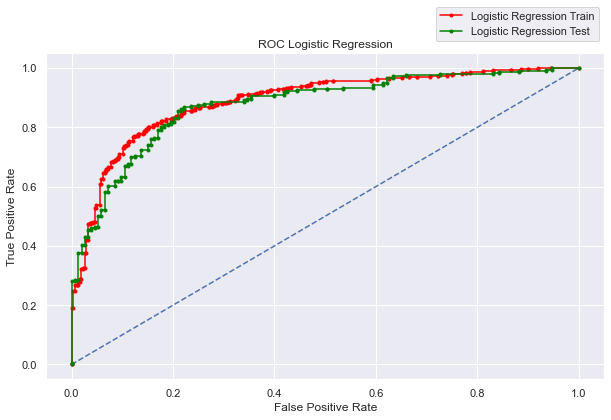

In [163]:
# ROC curve  

fpr_train_Log, tpr_train_Log, thresholds_train_Log = roc_curve(y_train, ytrain_predict_prob_Log)
fpr_test_Log, tpr_test_Log, thresholds_test_Log = roc_curve(y_test, ytest_predict_prob_Log)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_Log, tpr_train_Log, marker='.',color='red',label="Logistic Regression Train")
plt.plot(fpr_test_Log, tpr_test_Log, marker='.',color='green',label="Logistic Regression Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of Logistic Regression Model of Train and Test dataset :**')

In [164]:
# calculate AUC

Log_train_auc = roc_auc_score(y_train, ytrain_predict_prob_Log)
print('AUC Score Training Data of Logistic Regression model: %.3f' % Log_train_auc)

Log_test_auc = roc_auc_score(y_test, ytest_predict_prob_Log)
print('AUC Score Testing Data of Logistic Regression model: %.3f' % Log_test_auc)

AUC Score Training Data of Logistic Regression model: 0.890
AUC Score Testing Data of Logistic Regression model: 0.877


In [165]:
# Confusuion Matrix

printmd('**Train Confusision Matrix for Logistic Regression model :**')
print(confusion_matrix(y_train, ytrain_predict_Log))

printmd('**Test Confusision Matrix for Logistic Regression model :**')
print(confusion_matrix(y_test, ytest_predict_Log))

**Train Confusision Matrix for Logistic Regression model :**

[[230  77]
 [101 653]]


**Test Confusision Matrix for Logistic Regression model :**

[[121  32]
 [ 49 254]]


In [166]:
# Classification Report

printmd('**Train Classification Report for Logistic Regression model :**')
print(classification_report(y_train, ytrain_predict_Log))

printmd('**Test Classification Report for Logistic Regression model :**')
print(classification_report(y_test, ytest_predict_Log))

**Train Classification Report for Logistic Regression model :**

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       307
           1       0.89      0.87      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.81      0.80      1061
weighted avg       0.84      0.83      0.83      1061



**Test Classification Report for Logistic Regression model :**

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       153
           1       0.89      0.84      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.83      0.82      0.82       456



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- The difference between majority and minority class for different performance metrics of **Training Data** are as follows:
    - **precision :** Majority class is around **20%** more than minority class.
    - **recall :** Majority class is around **12%** more than minority class.
    - **f1 score :** Majority class is around **16%** more than minority class.
- The difference between majority and minority class for different performance metrics of **Testing Data** are as follows:
    - **precision :** Majority class is around **18%** more than minority class.
    - **recall :** Majority class is around **5%** more than minority class.
    - **f1 score :** Majority class is around **11%** more than minority class.
    
- The **Accuracy** for training and testing is approximately **83%** and **82%** respectively and the **AUC** for training and testing is approximately **89%** and **87.7%**. **The accuracy is nearly same for training and testing data.**

- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 89%,  87% and 88% respectively.
- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 89%,  84% and 86% respectively.

- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for training set is approximately 69%,  75% and 72% respectively.
- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 71%,  79% and 75% respectively.

- **No overfit performance metrics are obtained.**

## 2. LDA Model Evaluation:

### Getting the Predicted Classes and Probs

In [167]:
ytrain_predict_LDA = model_LDA.predict(X_train)
ytest_predict_LDA = model_LDA.predict(X_test)

In [168]:
ytrain_predict_prob_LDA = model_LDA.predict_proba(X_train)[:,1]
ytest_predict_prob_LDA = model_LDA.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of LDA Model of Train and Test dataset :**

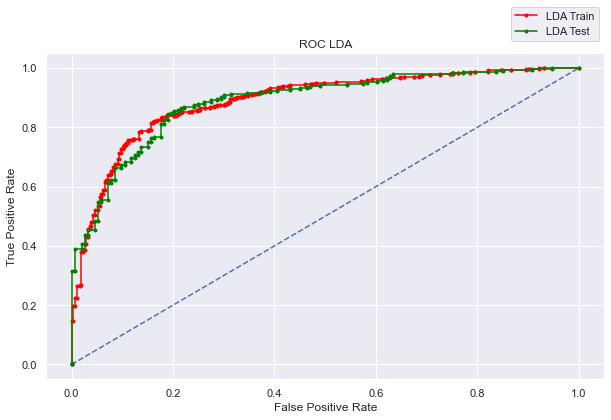

In [169]:
# ROC curve LDA

fpr_train_LDA, tpr_train_LDA, thresholds_train_LDA = roc_curve(y_train, ytrain_predict_prob_LDA)
fpr_test_LDA, tpr_test_LDA, thresholds_test_LDA = roc_curve(y_test, ytest_predict_prob_LDA)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_LDA, tpr_train_LDA, marker='.',color='red',label="LDA Train")
plt.plot(fpr_test_LDA, tpr_test_LDA, marker='.',color='green',label="LDA Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LDA')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of LDA Model of Train and Test dataset :**')

In [170]:
# calculate AUC LDA

LDA_train_auc = roc_auc_score(y_train, ytrain_predict_prob_LDA)
print('AUC Score Training Data of LDA model: %.3f' % LDA_train_auc)

LDA_test_auc = roc_auc_score(y_test, ytest_predict_prob_LDA)
print('AUC Score Testing Data of LDA model: %.3f' % LDA_test_auc)

AUC Score Training Data of LDA model: 0.890
AUC Score Testing Data of LDA model: 0.887


In [171]:
# Confusuion Matrix LDA

printmd('**Train Confusision Matrix for LDA model :**')
print(confusion_matrix(y_train, ytrain_predict_LDA))

printmd('**Test Confusision Matrix for LDA model :**')
print(confusion_matrix(y_test, ytest_predict_LDA))

**Train Confusision Matrix for LDA model :**

[[200 107]
 [ 70 684]]


**Test Confusision Matrix for LDA model :**

[[113  40]
 [ 35 268]]


In [172]:
# Classification Report LDA

printmd('**Train Classification Report for LDA model :**')
print(classification_report(y_train, ytrain_predict_LDA))

printmd('**Test Classification Report for LDA model :**')
print(classification_report(y_test, ytest_predict_LDA))

**Train Classification Report for LDA model :**

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



**Test Classification Report for LDA model :**

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- The difference between majority and minority class for different performance metrics of **Training Data** are as follows:
    - **precision :** Majority class is around **12%** more than minority class.
    - **recall :** Majority class is around **26%** more than minority class.
    - **f1 score :** Majority class is around **20%** more than minority class.
- The difference between majority and minority class for different performance metrics of **Testing Data** are as follows:
    - **precision :** Majority class is around **11%** more than minority class.
    - **recall :** Majority class is around **12%** more than minority class.
    - **f1 score :** Majority class is around **13%** more than minority class.
    
- The **Accuracy** for training and testing is approximately **83%** and **84%** respectively and the **AUC** for training and testing is approximately **89%** and **88.7%**. **The accuracy is nearly same for training and testing data.**

- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 86%,  91% and 89% respectively.
- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 87%,  88% and 88% respectively.

- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for training set is approximately 74%,  65% and 69% respectively.
- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 76%,  74% and 75% respectively.

- **No overfit performance metrics are obtained.**

## 3. KNN Model Evaluation:

### Getting the Predicted Classes and Probs

In [173]:
ytrain_predict_KNN = model_KNN.predict(X_train)
ytest_predict_KNN = model_KNN.predict(X_test)

In [174]:
ytrain_predict_prob_KNN = model_KNN.predict_proba(X_train)[:,1]
ytest_predict_prob_KNN = model_KNN.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of KNN Model of Train and Test dataset :**

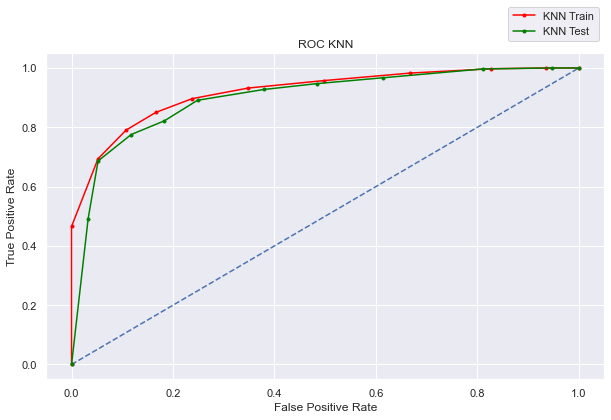

In [175]:
# ROC curve KNN

fpr_train_KNN, tpr_train_KNN, thresholds_train_KNN = roc_curve(y_train, ytrain_predict_prob_KNN)
fpr_test_KNN, tpr_test_KNN, thresholds_test_KNN = roc_curve(y_test, ytest_predict_prob_KNN)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_KNN, tpr_train_KNN, marker='.',color='red',label="KNN Train")
plt.plot(fpr_test_KNN, tpr_test_KNN, marker='.',color='green',label="KNN Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC KNN')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of KNN Model of Train and Test dataset :**')

In [176]:
# calculate AUC KNN

KNN_train_auc = roc_auc_score(y_train, ytrain_predict_prob_KNN)
print('AUC Score Training Data of KNN model: %.3f' % KNN_train_auc)

KNN_test_auc = roc_auc_score(y_test, ytest_predict_prob_KNN)
print('AUC Score Testing Data of KNN model: %.3f' % KNN_test_auc)

AUC Score Training Data of KNN model: 0.920
AUC Score Testing Data of KNN model: 0.899


In [177]:
# Confusuion Matrix KNN

printmd('**Train Confusision Matrix for KNN model :**')
print(confusion_matrix(y_train, ytrain_predict_KNN))

printmd('**Test Confusision Matrix for KNN model :**')
print(confusion_matrix(y_test, ytest_predict_KNN))

**Train Confusision Matrix for KNN model :**

[[234  73]
 [ 78 676]]


**Test Confusision Matrix for KNN model :**

[[115  38]
 [ 33 270]]


In [178]:
# Classification Report KNN

printmd('**Train Classification Report for KNN model :**')
print(classification_report(y_train, ytrain_predict_KNN))

printmd('**Test Classification Report for KNN model :**')
print(classification_report(y_test, ytest_predict_KNN))

**Train Classification Report for KNN model :**

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       307
           1       0.90      0.90      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061



**Test Classification Report for KNN model :**

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       153
           1       0.88      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.84      0.84      0.84       456



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- The difference between majority and minority class for different performance metrics of **Training Data** are as follows:
    - **precision :** Majority class is around **15%** more than minority class.
    - **recall :** Majority class is around **14%** more than minority class.
    - **f1 score :** Majority class is around **14%** more than minority class.
- The difference between majority and minority class for different performance metrics of **Testing Data** are as follows:
    - **precision :** Majority class is around **10%** more than minority class.
    - **recall :** Majority class is around **14%** more than minority class.
    - **f1 score :** Majority class is around **12%** more than minority class.
    
- The **Accuracy** for training and testing is approximately **86%** and **84%** respectively and the **AUC** for training and testing is approximately **92%** and **89.9%**. **The accuracy is nearly same for training and testing data.**

- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 90%,  90% and 90% respectively.
- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 88%,  89% and 88% respectively.

- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for training set is approximately 75%,  76% and 76% respectively.
- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 78%,  75% and 76% respectively.

- **The AUC score of Training data is just above 90% and also the performance metrics precision, recall and f1-score of the Labour class for Training Data is around 90%. Thus these values are on the overfit borderline but the testing data for these parameters are also nearly as high as the training data.**

## 4. Naive Bayes Model Evaluation:

### Getting the Predicted Classes and Probs

In [179]:
ytrain_predict_NB = model_NB.predict(X_train)
ytest_predict_NB = model_NB.predict(X_test)

In [180]:
ytrain_predict_prob_NB = model_NB.predict_proba(X_train)[:,1]
ytest_predict_prob_NB = model_NB.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of NB Model of Train and Test dataset :**

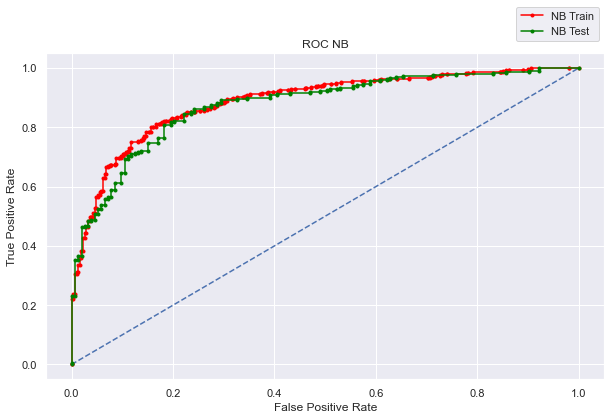

In [181]:
# ROC curve NB

fpr_train_NB, tpr_train_NB, thresholds_train_NB = roc_curve(y_train, ytrain_predict_prob_NB)
fpr_test_NB, tpr_test_NB, thresholds_test_NB = roc_curve(y_test, ytest_predict_prob_NB)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_NB, tpr_train_NB, marker='.',color='red',label="NB Train")
plt.plot(fpr_test_NB, tpr_test_NB, marker='.',color='green',label="NB Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC NB')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of NB Model of Train and Test dataset :**')

In [182]:
# calculate AUC NB

NB_train_auc = roc_auc_score(y_train, ytrain_predict_prob_NB)
print('AUC Score Training Data of NB model: %.3f' % NB_train_auc)

NB_test_auc = roc_auc_score(y_test, ytest_predict_prob_NB)
print('AUC Score Testing Data of NB model: %.3f' % NB_test_auc)

AUC Score Training Data of NB model: 0.888
AUC Score Testing Data of NB model: 0.876


In [183]:
# Confusuion Matrix NB

printmd('**Train Confusision Matrix for NB model :**')
print(confusion_matrix(y_train, ytrain_predict_NB))

printmd('**Test Confusision Matrix for NB model :**')
print(confusion_matrix(y_test, ytest_predict_NB))

**Train Confusision Matrix for NB model :**

[[211  96]
 [ 79 675]]


**Test Confusision Matrix for NB model :**

[[112  41]
 [ 40 263]]


In [184]:
# Classification Report NB

printmd('**Train Classification Report for NB model :**')
print(classification_report(y_train, ytrain_predict_NB))

printmd('**Test Classification Report for NB model :**')
print(classification_report(y_test, ytest_predict_NB))

**Train Classification Report for NB model :**

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



**Test Classification Report for NB model :**

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- The difference between majority and minority class for different performance metrics of **Training Data** are as follows:
    - **precision :** Majority class is around **15%** more than minority class.
    - **recall :** Majority class is around **21%** more than minority class.
    - **f1 score :** Majority class is around **18%** more than minority class.
- The difference between majority and minority class for different performance metrics of **Testing Data** are as follows:
    - **precision :** Majority class is around **13%** more than minority class.
    - **recall :** Majority class is around **14%** more than minority class.
    - **f1 score :** Majority class is around **14%** more than minority class.
    
- The **Accuracy** for training and testing is approximately **84%** and **82%** respectively and the **AUC** for training and testing is approximately **88.8%** and **87.6%**. **The accuracy is nearly same for training and testing data.**

- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 88%,  90% and 89% respectively.
- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 87%,  87% and 87% respectively.

- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for training set is approximately 73%,  69% and 71% respectively.
- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 74%,  73% and 73% respectively.

- **The majority class preision is 90% for training data but the testing data majority class preision is also high. All other performance metrics are less than 90%.**

## 5. SVM Model Evaluation:

### Getting the Predicted Classes and Probs

In [185]:
ytrain_predict_SVM = model_SVM.predict(X_train)
ytest_predict_SVM = model_SVM.predict(X_test)

In [186]:
ytrain_predict_prob_SVM = model_SVM.predict_proba(X_train)[:,1]
ytest_predict_prob_SVM = model_SVM.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of SVM Model of Train and Test dataset :**

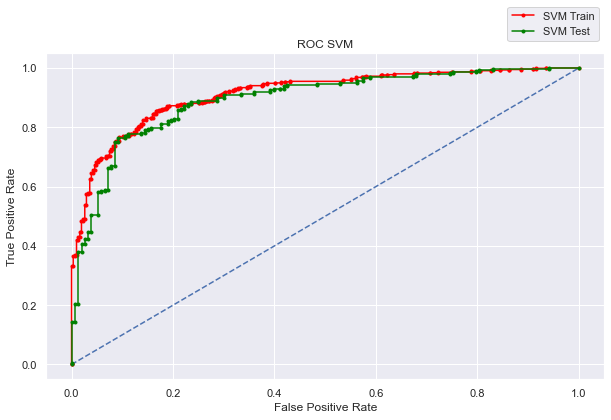

In [187]:
# ROC curve SVM

fpr_train_SVM, tpr_train_SVM, thresholds_train_SVM = roc_curve(y_train, ytrain_predict_prob_SVM)
fpr_test_SVM, tpr_test_SVM, thresholds_test_SVM = roc_curve(y_test, ytest_predict_prob_SVM)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_SVM, tpr_train_SVM, marker='.',color='red',label="SVM Train")
plt.plot(fpr_test_SVM, tpr_test_SVM, marker='.',color='green',label="SVM Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of SVM Model of Train and Test dataset :**')

In [188]:
# calculate AUC SVM

SVM_train_auc = roc_auc_score(y_train, ytrain_predict_prob_SVM)
print('AUC Score Training Data of SVM model: %.3f' % SVM_train_auc)

SVM_test_auc = roc_auc_score(y_test, ytest_predict_prob_SVM)
print('AUC Score Testing Data of SVM model: %.3f' % SVM_test_auc)

AUC Score Training Data of SVM model: 0.914
AUC Score Testing Data of SVM model: 0.894


In [189]:
# Confusuion Matrix SVM

printmd('**Train Confusision Matrix for SVM model :**')
print(confusion_matrix(y_train, ytrain_predict_SVM))

printmd('**Test Confusision Matrix for SVM model :**')
print(confusion_matrix(y_test, ytest_predict_SVM))

**Train Confusision Matrix for SVM model :**

[[253  54]
 [106 648]]


**Test Confusision Matrix for SVM model :**

[[121  32]
 [ 47 256]]


In [190]:
# Classification Report SVM

printmd('**Train Classification Report for SVM model :**')
print(classification_report(y_train, ytrain_predict_SVM))

printmd('**Test Classification Report for SVM model :**')
print(classification_report(y_test, ytest_predict_SVM))

**Train Classification Report for SVM model :**

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       307
           1       0.92      0.86      0.89       754

    accuracy                           0.85      1061
   macro avg       0.81      0.84      0.82      1061
weighted avg       0.86      0.85      0.85      1061



**Test Classification Report for SVM model :**

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       153
           1       0.89      0.84      0.87       303

    accuracy                           0.83       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.83      0.83      0.83       456



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- The difference between majority and minority class for different performance metrics of **Training Data** are as follows:
    - **precision :** Majority class is around **22%** more than minority class.
    - **recall :** Majority class is around **4%** more than minority class.
    - **f1 score :** Majority class is around **13%** more than minority class.
- The difference between majority and minority class for different performance metrics of **Testing Data** are as follows:
    - **precision :** Majority class is around **17%** more than minority class.
    - **recall :** Majority class is around **5%** more than minority class.
    - **f1 score :** Majority class is around **12%** more than minority class.
    
- The **Accuracy** for training and testing is approximately **85%** and **83%** respectively and the **AUC** for training and testing is approximately **91.4%** and **89.4%**. **The accuracy is nearly same for training and testing data.**

- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 92%,  86% and 89% respectively.
- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 89%,  84% and 87% respectively.

- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for training set is approximately 70%,  82% and 76% respectively.
- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 72%,  79% and 75% respectively.

- **The majority class preision is 92% for training data but the testing data majority class preision is also high. Also the AUC score for Training Data is 91.4% but the testing AUC is also high. All other performance metrics are less than 90%.**

## 6. Random Forest Model Evaluation:

### Getting the Predicted Classes and Probs

In [191]:
ytrain_predict_RF = model_RF.predict(X_train)
ytest_predict_RF = model_RF.predict(X_test)

In [192]:
ytrain_predict_prob_RF = model_RF.predict_proba(X_train)[:,1]
ytest_predict_prob_RF = model_RF.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of RF Model of Train and Test dataset :**

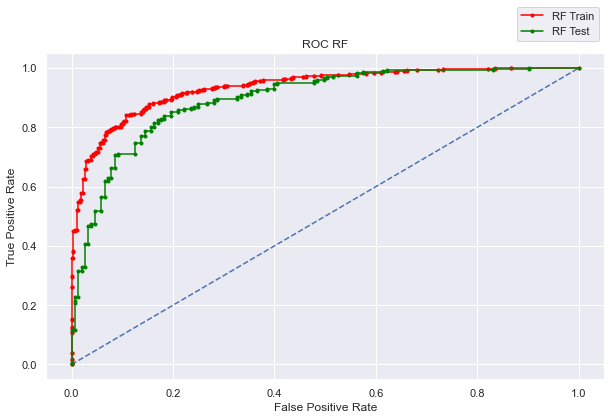

In [193]:
# ROC curve RF

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(y_train, ytrain_predict_prob_RF)
fpr_test_RF, tpr_test_RF, thresholds_test_RF= roc_curve(y_test, ytest_predict_prob_RF)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_RF, tpr_train_RF, marker='.',color='red',label="RF Train")
plt.plot(fpr_test_RF, tpr_test_RF, marker='.',color='green',label="RF Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RF')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of RF Model of Train and Test dataset :**')

In [194]:
# calculate AUC RF

RF_train_auc = roc_auc_score(y_train, ytrain_predict_prob_RF)
print('AUC Score Training Data of RF model: %.3f' % RF_train_auc)

RF_test_auc = roc_auc_score(y_test, ytest_predict_prob_RF)
print('AUC Score Testing Data of RF model: %.3f' % RF_test_auc)

AUC Score Training Data of RF model: 0.935
AUC Score Testing Data of RF model: 0.896


In [195]:
# Confusuion Matrix RF

printmd('**Train Confusision Matrix for RF model :**')
print(confusion_matrix(y_train, ytrain_predict_RF))

printmd('**Test Confusision Matrix for RF model :**')
print(confusion_matrix(y_test, ytest_predict_RF))

**Train Confusision Matrix for RF model :**

[[219  88]
 [ 48 706]]


**Test Confusision Matrix for RF model :**

[[102  51]
 [ 30 273]]


In [196]:
# Classification Report RF

printmd('**Train Classification Report for RF model :**')
print(classification_report(y_train, ytrain_predict_RF))

printmd('**Test Classification Report for RF model :**')
print(classification_report(y_test, ytest_predict_RF))

**Train Classification Report for RF model :**

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       307
           1       0.89      0.94      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.84      1061
weighted avg       0.87      0.87      0.87      1061



**Test Classification Report for RF model :**

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- The difference between majority and minority class for different performance metrics of **Training Data** are as follows:
    - **precision :** Majority class is around **7%** more than minority class.
    - **recall :** Majority class is around **23%** more than minority class.
    - **f1 score :** Majority class is around **15%** more than minority class.
- The difference between majority and minority class for different performance metrics of **Testing Data** are as follows:
    - **precision :** Majority class is around **7%** more than minority class.
    - **recall :** Majority class is around **23%** more than minority class.
    - **f1 score :** Majority class is around **15%** more than minority class.
    
- The **Accuracy** for training and testing is approximately **87%** and **82%** respectively and the **AUC** for training and testing is approximately **93.5%** and **89.6%**. **The accuracy for training data is around 5% higher than testing data.**

- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 89%,  94% and 91% respectively.
- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 84%,  90% and 87% respectively.

- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for training set is approximately 82%,  71% and 76% respectively.
- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 77%,  67% and 72% respectively.

- **The majority class recall is around 94% for training and 90% for testing, also the AUC for training is 93.5% and for testing is nearly 90%. All the other performance metrics are less than 90%.**

## 7. Adaptive Boost (ADB) Model Evaluation:

### Getting the Predicted Classes and Probs

In [197]:
ytrain_predict_ADB = model_ADB.predict(X_train)
ytest_predict_ADB = model_ADB.predict(X_test)

In [198]:
ytrain_predict_prob_ADB = model_ADB.predict_proba(X_train)[:,1]
ytest_predict_prob_ADB = model_ADB.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of ADB Model of Train and Test dataset :**

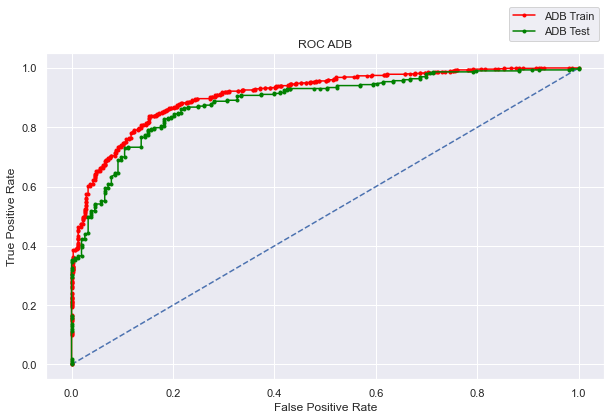

In [199]:
# ROC curve ADB

fpr_train_ADB, tpr_train_ADB, thresholds_train_ADB = roc_curve(y_train, ytrain_predict_prob_ADB)
fpr_test_ADB, tpr_test_ADB, thresholds_test_ADB= roc_curve(y_test, ytest_predict_prob_ADB)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_ADB, tpr_train_ADB, marker='.',color='red',label="ADB Train")
plt.plot(fpr_test_ADB, tpr_test_ADB, marker='.',color='green',label="ADB Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ADB')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of ADB Model of Train and Test dataset :**')

In [200]:
# calculate AUC ADB

ADB_train_auc = roc_auc_score(y_train, ytrain_predict_prob_ADB)
print('AUC Score Training Data of ADB model: %.3f' % ADB_train_auc)

ADB_test_auc = roc_auc_score(y_test, ytest_predict_prob_ADB)
print('AUC Score Testing Data of ADB model: %.3f' % ADB_test_auc)

AUC Score Training Data of ADB model: 0.912
AUC Score Testing Data of ADB model: 0.887


In [201]:
# Confusuion Matrix ADB

printmd('**Train Confusision Matrix for ADB model :**')
print(confusion_matrix(y_train, ytrain_predict_ADB))

printmd('**Test Confusision Matrix for ADB model :**')
print(confusion_matrix(y_test, ytest_predict_ADB))

**Train Confusision Matrix for ADB model :**

[[214  93]
 [ 61 693]]


**Test Confusision Matrix for ADB model :**

[[104  49]
 [ 33 270]]


In [202]:
# Classification Report ADB

printmd('**Train Classification Report for ADB model :**')
print(classification_report(y_train, ytrain_predict_ADB))

printmd('**Test Classification Report for ADB model :**')
print(classification_report(y_test, ytest_predict_ADB))

**Train Classification Report for ADB model :**

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



**Test Classification Report for ADB model :**

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- The difference between majority and minority class for different performance metrics of **Training Data** are as follows:
    - **precision :** Majority class is around **10%** more than minority class.
    - **recall :** Majority class is around **22%** more than minority class.
    - **f1 score :** Majority class is around **16%** more than minority class.
- The difference between majority and minority class for different performance metrics of **Testing Data** are as follows:
    - **precision :** Majority class is around **9%** more than minority class.
    - **recall :** Majority class is around **21%** more than minority class.
    - **f1 score :** Majority class is around **15%** more than minority class.
    
- The **Accuracy** for training and testing is approximately **85%** and **82%** respectively and the **AUC** for training and testing is approximately **91.2%** and **88.7%**. **The accuracy for training data and testing data are nearly same.**

- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 88%,  92% and 90% respectively.
- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 85%,  89% and 87% respectively.

- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for training set is approximately 78%,  70% and 74% respectively.
- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 76%,  68% and 72% respectively.

- **The majority class recall and f1-score is around 92% and 90% for training for testing data it is around 3% less. Also the AUC for training is 91.2% and for testing is nearly close at 88.7%. All the other performance metrics are less than 90%.**

## 8. Extreme Gradient Boost (XGB) Model Evaluation:

### Getting the Predicted Classes and Probs

In [203]:
ytrain_predict_XGB = model_XGB.predict(X_train)
ytest_predict_XGB = model_XGB.predict(X_test)

In [204]:
ytrain_predict_prob_XGB = model_XGB.predict_proba(X_train)[:,1]
ytest_predict_prob_XGB = model_XGB.predict_proba(X_test)[:,1]

## Performance Metrics:

**ROC Curve of XGB Model of Train and Test dataset :**

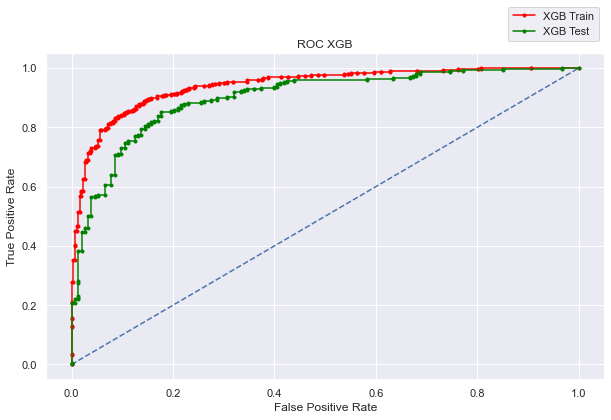

In [205]:
# ROC curve XGB

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(y_train, ytrain_predict_prob_XGB)
fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB= roc_curve(y_test, ytest_predict_prob_XGB)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_XGB, tpr_train_XGB, marker='.',color='red',label="XGB Train")
plt.plot(fpr_test_XGB, tpr_test_XGB, marker='.',color='green',label="XGB Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC XGB')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of XGB Model of Train and Test dataset :**')

In [206]:
# calculate AUC XGB

XGB_train_auc = roc_auc_score(y_train, ytrain_predict_prob_XGB)
print('AUC Score Training Data of XGB model: %.3f' % XGB_train_auc)

XGB_test_auc = roc_auc_score(y_test, ytest_predict_prob_XGB)
print('AUC Score Testing Data of XGB model: %.3f' % XGB_test_auc)

AUC Score Training Data of XGB model: 0.941
AUC Score Testing Data of XGB model: 0.900


In [207]:
# Confusuion Matrix XGB

printmd('**Train Confusision Matrix for XGB model :**')
print(confusion_matrix(y_train, ytrain_predict_XGB))

printmd('**Test Confusision Matrix for XGB model :**')
print(confusion_matrix(y_test, ytest_predict_XGB))

**Train Confusision Matrix for XGB model :**

[[246  61]
 [ 67 687]]


**Test Confusision Matrix for XGB model :**

[[118  35]
 [ 36 267]]


In [208]:
# Classification Report XGB

printmd('**Train Classification Report for XGB model :**')
print(classification_report(y_train, ytrain_predict_XGB))

printmd('**Test Classification Report for XGB model :**')
print(classification_report(y_test, ytest_predict_XGB))

**Train Classification Report for XGB model :**

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       307
           1       0.92      0.91      0.91       754

    accuracy                           0.88      1061
   macro avg       0.85      0.86      0.85      1061
weighted avg       0.88      0.88      0.88      1061



**Test Classification Report for XGB model :**

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       153
           1       0.88      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.83      0.83       456
weighted avg       0.84      0.84      0.84       456



## Inferences:
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- The difference between majority and minority class for different performance metrics of **Training Data** are as follows:
    - **precision :** Majority class is around **13%** more than minority class.
    - **recall :** Majority class is around **11%** more than minority class.
    - **f1 score :** Majority class is around **12%** more than minority class.
- The difference between majority and minority class for different performance metrics of **Testing Data** are as follows:
    - **precision :** Majority class is around **11%** more than minority class.
    - **recall :** Majority class is around **11%** more than minority class.
    - **f1 score :** Majority class is around **11%** more than minority class.
    
- The **Accuracy** for training and testing is approximately **88%** and **84%** respectively and the **AUC** for training and testing is approximately **94.1%** and **90%**. **The accuracy for training data and testing data are nearly same.**

- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for training set is approximately 92%,  91% and 91% respectively.
- The majority class ('Labour' coded as 1) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 88%,  88% and 88% respectively.

- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for training set is approximately 79%,  80% and 79% respectively.
- The minority class ('Conservative' coded as 0) 'Precision', 'Recall' and 'F1-score' for testing set is approximately 77%,  77% and 77% respectively.

- **The majority class precision, recall and f1-score are 92%, 91% and 91% for training data and for testing data it is 88% approximately for all of them. The AUC score for Training data is 94.1 % and for testing data it is around 90%. All the other performance metrics are less than 90%.**

## Performance Comparision between All the Models:

In [209]:
# Logistic Regression Performance

# Train
df_Log_train = pd.DataFrame(classification_report(y_train, ytrain_predict_Log, output_dict = True))
Log_train_acc = df_Log_train.iloc[0,2]
Log_train_recall = df_Log_train.iloc[1,3]
Log_train_precision = df_Log_train.iloc[0,3]
Log_train_f1 = df_Log_train.iloc[2,3]

# Test
df_Log_test = pd.DataFrame(classification_report(y_test, ytest_predict_Log, output_dict = True))
Log_test_acc = df_Log_test.iloc[0,2]
Log_test_recall = df_Log_test.iloc[1,3]
Log_test_precision = df_Log_test.iloc[0,3]
Log_test_f1 = df_Log_test.iloc[2,3]

# Confusion Matrix
confusion_matrix_train_Log = confusion_matrix(y_train, ytrain_predict_Log)
confusion_matrix_test_Log = confusion_matrix(y_test, ytest_predict_Log)

# Train
Log_train_TP = confusion_matrix_train_Log[1,1]
Log_train_FP = confusion_matrix_train_Log[0,1]
Log_train_TN = confusion_matrix_train_Log[0,0]
Log_train_FN = confusion_matrix_train_Log[1,0]

# Test
Log_test_TP = confusion_matrix_test_Log[1,1]
Log_test_FP = confusion_matrix_test_Log[0,1]
Log_test_TN = confusion_matrix_test_Log[0,0]
Log_test_FN = confusion_matrix_test_Log[1,0]

# Difference Majority and Minority

# Train
Log_train_recall_diff =  df_Log_train.iloc[1,1] - df_Log_train.iloc[1,0]
Log_train_precision_diff =  df_Log_train.iloc[0,1] - df_Log_train.iloc[0,0]
Log_train_f1_diff =  df_Log_train.iloc[2,1] - df_Log_train.iloc[2,0]
# Test
Log_test_recall_diff =  df_Log_test.iloc[1,1] - df_Log_test.iloc[1,0]
Log_test_precision_diff =  df_Log_test.iloc[0,1] - df_Log_test.iloc[0,0]
Log_test_f1_diff =  df_Log_test.iloc[2,1] - df_Log_test.iloc[2,0]

In [210]:
# LDA Performance

# Train
df_LDA_train = pd.DataFrame(classification_report(y_train, ytrain_predict_LDA, output_dict = True))
LDA_train_acc = df_LDA_train.iloc[0,2]
LDA_train_recall = df_LDA_train.iloc[1,3]
LDA_train_precision = df_LDA_train.iloc[0,3]
LDA_train_f1 = df_LDA_train.iloc[2,3]

# Test
df_LDA_test = pd.DataFrame(classification_report(y_test, ytest_predict_LDA, output_dict = True))
LDA_test_acc = df_LDA_test.iloc[0,2]
LDA_test_recall = df_LDA_test.iloc[1,3]
LDA_test_precision = df_LDA_test.iloc[0,3]
LDA_test_f1 = df_LDA_test.iloc[2,3]

# Confusion Matrix
confusion_matrix_train_LDA = confusion_matrix(y_train, ytrain_predict_LDA)
confusion_matrix_test_LDA = confusion_matrix(y_test, ytest_predict_LDA)

# Train
LDA_train_TP = confusion_matrix_train_LDA[1,1]
LDA_train_FP = confusion_matrix_train_LDA[0,1]
LDA_train_TN = confusion_matrix_train_LDA[0,0]
LDA_train_FN = confusion_matrix_train_LDA[1,0]

# Test
LDA_test_TP = confusion_matrix_test_LDA[1,1]
LDA_test_FP = confusion_matrix_test_LDA[0,1]
LDA_test_TN = confusion_matrix_test_LDA[0,0]
LDA_test_FN = confusion_matrix_test_LDA[1,0]

# Difference Majority and Minority

# Train
LDA_train_recall_diff =  df_LDA_train.iloc[1,1] - df_LDA_train.iloc[1,0]
LDA_train_precision_diff =  df_LDA_train.iloc[0,1] - df_LDA_train.iloc[0,0]
LDA_train_f1_diff =  df_LDA_train.iloc[2,1] - df_LDA_train.iloc[2,0]
# Test
LDA_test_recall_diff =  df_LDA_test.iloc[1,1] - df_LDA_test.iloc[1,0]
LDA_test_precision_diff =  df_LDA_test.iloc[0,1] - df_LDA_test.iloc[0,0]
LDA_test_f1_diff =  df_LDA_test.iloc[2,1] - df_LDA_test.iloc[2,0]

In [211]:
# KNN Performance

# Train
df_KNN_train = pd.DataFrame(classification_report(y_train, ytrain_predict_KNN, output_dict = True))
KNN_train_acc = df_KNN_train.iloc[0,2]
KNN_train_recall = df_KNN_train.iloc[1,3]
KNN_train_precision = df_KNN_train.iloc[0,3]
KNN_train_f1 = df_KNN_train.iloc[2,3]

# Test
df_KNN_test = pd.DataFrame(classification_report(y_test, ytest_predict_KNN, output_dict = True))
KNN_test_acc = df_KNN_test.iloc[0,2]
KNN_test_recall = df_KNN_test.iloc[1,3]
KNN_test_precision = df_KNN_test.iloc[0,3]
KNN_test_f1 = df_KNN_test.iloc[2,3]

# Confusion Matrix
confusion_matrix_train_KNN = confusion_matrix(y_train, ytrain_predict_KNN)
confusion_matrix_test_KNN = confusion_matrix(y_test, ytest_predict_KNN)

# Train
KNN_train_TP = confusion_matrix_train_KNN[1,1]
KNN_train_FP = confusion_matrix_train_KNN[0,1]
KNN_train_TN = confusion_matrix_train_KNN[0,0]
KNN_train_FN = confusion_matrix_train_KNN[1,0]

# Test
KNN_test_TP = confusion_matrix_test_KNN[1,1]
KNN_test_FP = confusion_matrix_test_KNN[0,1]
KNN_test_TN = confusion_matrix_test_KNN[0,0]
KNN_test_FN = confusion_matrix_test_KNN[1,0]

# Difference Majority and Minority

# Train
KNN_train_recall_diff =  df_KNN_train.iloc[1,1] - df_KNN_train.iloc[1,0]
KNN_train_precision_diff =  df_KNN_train.iloc[0,1] - df_KNN_train.iloc[0,0]
KNN_train_f1_diff =  df_KNN_train.iloc[2,1] - df_KNN_train.iloc[2,0]
# Test
KNN_test_recall_diff =  df_KNN_test.iloc[1,1] - df_KNN_test.iloc[1,0]
KNN_test_precision_diff =  df_KNN_test.iloc[0,1] - df_KNN_test.iloc[0,0]
KNN_test_f1_diff =  df_KNN_test.iloc[2,1] - df_KNN_test.iloc[2,0]

In [212]:
# NB Performance

# Train
df_NB_train = pd.DataFrame(classification_report(y_train, ytrain_predict_NB, output_dict = True))
NB_train_acc = df_NB_train.iloc[0,2]
NB_train_recall = df_NB_train.iloc[1,3]
NB_train_precision = df_NB_train.iloc[0,3]
NB_train_f1 = df_NB_train.iloc[2,3]

# Test
df_NB_test = pd.DataFrame(classification_report(y_test, ytest_predict_NB, output_dict = True))
NB_test_acc = df_NB_test.iloc[0,2]
NB_test_recall = df_NB_test.iloc[1,3]
NB_test_precision = df_NB_test.iloc[0,3]
NB_test_f1 = df_NB_test.iloc[2,3]

# Confusion Matrix
confusion_matrix_train_NB = confusion_matrix(y_train, ytrain_predict_NB)
confusion_matrix_test_NB = confusion_matrix(y_test, ytest_predict_NB)

# Train
NB_train_TP = confusion_matrix_train_NB[1,1]
NB_train_FP = confusion_matrix_train_NB[0,1]
NB_train_TN = confusion_matrix_train_NB[0,0]
NB_train_FN = confusion_matrix_train_NB[1,0]

# Test
NB_test_TP = confusion_matrix_test_NB[1,1]
NB_test_FP = confusion_matrix_test_NB[0,1]
NB_test_TN = confusion_matrix_test_NB[0,0]
NB_test_FN = confusion_matrix_test_NB[1,0]

# Difference Majority and Minority

# Train
NB_train_recall_diff =  df_NB_train.iloc[1,1] - df_NB_train.iloc[1,0]
NB_train_precision_diff =  df_NB_train.iloc[0,1] - df_NB_train.iloc[0,0]
NB_train_f1_diff =  df_NB_train.iloc[2,1] - df_NB_train.iloc[2,0]
# Test
NB_test_recall_diff =  df_NB_test.iloc[1,1] - df_NB_test.iloc[1,0]
NB_test_precision_diff =  df_NB_test.iloc[0,1] - df_NB_test.iloc[0,0]
NB_test_f1_diff =  df_NB_test.iloc[2,1] - df_NB_test.iloc[2,0]

In [213]:
# SVM Performance

# Train
df_SVM_train = pd.DataFrame(classification_report(y_train, ytrain_predict_SVM, output_dict = True))
SVM_train_acc = df_SVM_train.iloc[0,2]
SVM_train_recall = df_SVM_train.iloc[1,3]
SVM_train_precision = df_SVM_train.iloc[0,3]
SVM_train_f1 = df_SVM_train.iloc[2,3]

# Test
df_SVM_test = pd.DataFrame(classification_report(y_test, ytest_predict_SVM, output_dict = True))
SVM_test_acc = df_SVM_test.iloc[0,2]
SVM_test_recall = df_SVM_test.iloc[1,3]
SVM_test_precision = df_SVM_test.iloc[0,3]
SVM_test_f1 = df_SVM_test.iloc[2,3]

# Confusion Matrix
confusion_matrix_train_SVM = confusion_matrix(y_train, ytrain_predict_SVM)
confusion_matrix_test_SVM = confusion_matrix(y_test, ytest_predict_SVM)

# Train
SVM_train_TP = confusion_matrix_train_SVM[1,1]
SVM_train_FP = confusion_matrix_train_SVM[0,1]
SVM_train_TN = confusion_matrix_train_SVM[0,0]
SVM_train_FN = confusion_matrix_train_SVM[1,0]

# Test
SVM_test_TP = confusion_matrix_test_SVM[1,1]
SVM_test_FP = confusion_matrix_test_SVM[0,1]
SVM_test_TN = confusion_matrix_test_SVM[0,0]
SVM_test_FN = confusion_matrix_test_SVM[1,0]

# Difference Majority and Minority

# Train
SVM_train_recall_diff =  df_SVM_train.iloc[1,1] - df_SVM_train.iloc[1,0]
SVM_train_precision_diff =  df_SVM_train.iloc[0,1] - df_SVM_train.iloc[0,0]
SVM_train_f1_diff =  df_SVM_train.iloc[2,1] - df_SVM_train.iloc[2,0]
# Test
SVM_test_recall_diff =  df_SVM_test.iloc[1,1] - df_SVM_test.iloc[1,0]
SVM_test_precision_diff =  df_SVM_test.iloc[0,1] - df_SVM_test.iloc[0,0]
SVM_test_f1_diff =  df_SVM_test.iloc[2,1] - df_SVM_test.iloc[2,0]

In [214]:
# RF Performance

# Train
df_RF_train = pd.DataFrame(classification_report(y_train, ytrain_predict_RF, output_dict = True))
RF_train_acc = df_RF_train.iloc[0,2]
RF_train_recall = df_RF_train.iloc[1,3]
RF_train_precision = df_RF_train.iloc[0,3]
RF_train_f1 = df_RF_train.iloc[2,3]

# Test
df_RF_test = pd.DataFrame(classification_report(y_test, ytest_predict_RF, output_dict = True))
RF_test_acc = df_RF_test.iloc[0,2]
RF_test_recall = df_RF_test.iloc[1,3]
RF_test_precision = df_RF_test.iloc[0,3]
RF_test_f1 = df_RF_test.iloc[2,3]

# Confusion Matrix
confusion_matrix_train_RF = confusion_matrix(y_train, ytrain_predict_RF)
confusion_matrix_test_RF = confusion_matrix(y_test, ytest_predict_RF)

# Train
RF_train_TP = confusion_matrix_train_RF[1,1]
RF_train_FP = confusion_matrix_train_RF[0,1]
RF_train_TN = confusion_matrix_train_RF[0,0]
RF_train_FN = confusion_matrix_train_RF[1,0]

# Test
RF_test_TP = confusion_matrix_test_RF[1,1]
RF_test_FP = confusion_matrix_test_RF[0,1]
RF_test_TN = confusion_matrix_test_RF[0,0]
RF_test_FN = confusion_matrix_test_RF[1,0]

# Difference Majority and Minority

# Train
RF_train_recall_diff =  df_RF_train.iloc[1,1] - df_RF_train.iloc[1,0]
RF_train_precision_diff =  df_RF_train.iloc[0,1] - df_RF_train.iloc[0,0]
RF_train_f1_diff =  df_RF_train.iloc[2,1] - df_RF_train.iloc[2,0]
# Test
RF_test_recall_diff =  df_RF_test.iloc[1,1] - df_RF_test.iloc[1,0]
RF_test_precision_diff =  df_RF_test.iloc[0,1] - df_RF_test.iloc[0,0]
RF_test_f1_diff =  df_RF_test.iloc[2,1] - df_RF_test.iloc[2,0]

In [215]:
# ADB Performance

# Train
df_ADB_train = pd.DataFrame(classification_report(y_train, ytrain_predict_ADB, output_dict = True))
ADB_train_acc = df_ADB_train.iloc[0,2]
ADB_train_recall = df_ADB_train.iloc[1,3]
ADB_train_precision = df_ADB_train.iloc[0,3]
ADB_train_f1 = df_ADB_train.iloc[2,3]

# Test
df_ADB_test = pd.DataFrame(classification_report(y_test, ytest_predict_ADB, output_dict = True))
ADB_test_acc = df_ADB_test.iloc[0,2]
ADB_test_recall = df_ADB_test.iloc[1,3]
ADB_test_precision = df_ADB_test.iloc[0,3]
ADB_test_f1 = df_ADB_test.iloc[2,3]

# Confusion Matrix
confusion_matrix_train_ADB = confusion_matrix(y_train, ytrain_predict_ADB)
confusion_matrix_test_ADB = confusion_matrix(y_test, ytest_predict_ADB)

# Train
ADB_train_TP = confusion_matrix_train_ADB[1,1]
ADB_train_FP = confusion_matrix_train_ADB[0,1]
ADB_train_TN = confusion_matrix_train_ADB[0,0]
ADB_train_FN = confusion_matrix_train_ADB[1,0]

# Test
ADB_test_TP = confusion_matrix_test_ADB[1,1]
ADB_test_FP = confusion_matrix_test_ADB[0,1]
ADB_test_TN = confusion_matrix_test_ADB[0,0]
ADB_test_FN = confusion_matrix_test_ADB[1,0]

# Difference Majority and Minority

# Train
ADB_train_recall_diff =  df_ADB_train.iloc[1,1] - df_ADB_train.iloc[1,0]
ADB_train_precision_diff =  df_ADB_train.iloc[0,1] - df_ADB_train.iloc[0,0]
ADB_train_f1_diff =  df_ADB_train.iloc[2,1] - df_ADB_train.iloc[2,0]
# Test
ADB_test_recall_diff =  df_ADB_test.iloc[1,1] - df_ADB_test.iloc[1,0]
ADB_test_precision_diff =  df_ADB_test.iloc[0,1] - df_ADB_test.iloc[0,0]
ADB_test_f1_diff =  df_ADB_test.iloc[2,1] - df_ADB_test.iloc[2,0]

In [216]:
# XGB Performance

# Train
df_XGB_train = pd.DataFrame(classification_report(y_train, ytrain_predict_XGB, output_dict = True))
XGB_train_acc = df_XGB_train.iloc[0,2]
XGB_train_recall = df_XGB_train.iloc[1,3]
XGB_train_precision = df_XGB_train.iloc[0,3]
XGB_train_f1 = df_XGB_train.iloc[2,3]

# Test
df_XGB_test = pd.DataFrame(classification_report(y_test, ytest_predict_XGB, output_dict = True))
XGB_test_acc = df_XGB_test.iloc[0,2]
XGB_test_recall = df_XGB_test.iloc[1,3]
XGB_test_precision = df_XGB_test.iloc[0,3]
XGB_test_f1 = df_XGB_test.iloc[2,3]

# Confusion Matrix
confusion_matrix_train_XGB = confusion_matrix(y_train, ytrain_predict_XGB)
confusion_matrix_test_XGB = confusion_matrix(y_test, ytest_predict_XGB)

# Train
XGB_train_TP = confusion_matrix_train_XGB[1,1]
XGB_train_FP = confusion_matrix_train_XGB[0,1]
XGB_train_TN = confusion_matrix_train_XGB[0,0]
XGB_train_FN = confusion_matrix_train_XGB[1,0]

# Test
XGB_test_TP = confusion_matrix_test_XGB[1,1]
XGB_test_FP = confusion_matrix_test_XGB[0,1]
XGB_test_TN = confusion_matrix_test_XGB[0,0]
XGB_test_FN = confusion_matrix_test_XGB[1,0]

# Difference Majority and Minority

# Train
XGB_train_recall_diff =  df_XGB_train.iloc[1,1] - df_XGB_train.iloc[1,0]
XGB_train_precision_diff =  df_XGB_train.iloc[0,1] - df_XGB_train.iloc[0,0]
XGB_train_f1_diff =  df_XGB_train.iloc[2,1] - df_XGB_train.iloc[2,0]
# Test
XGB_test_recall_diff =  df_XGB_test.iloc[1,1] - df_XGB_test.iloc[1,0]
XGB_test_precision_diff =  df_XGB_test.iloc[0,1] - df_XGB_test.iloc[0,0]
XGB_test_f1_diff =  df_XGB_test.iloc[2,1] - df_XGB_test.iloc[2,0]

**ROC Curve of all the Tuned Models for Training set :**

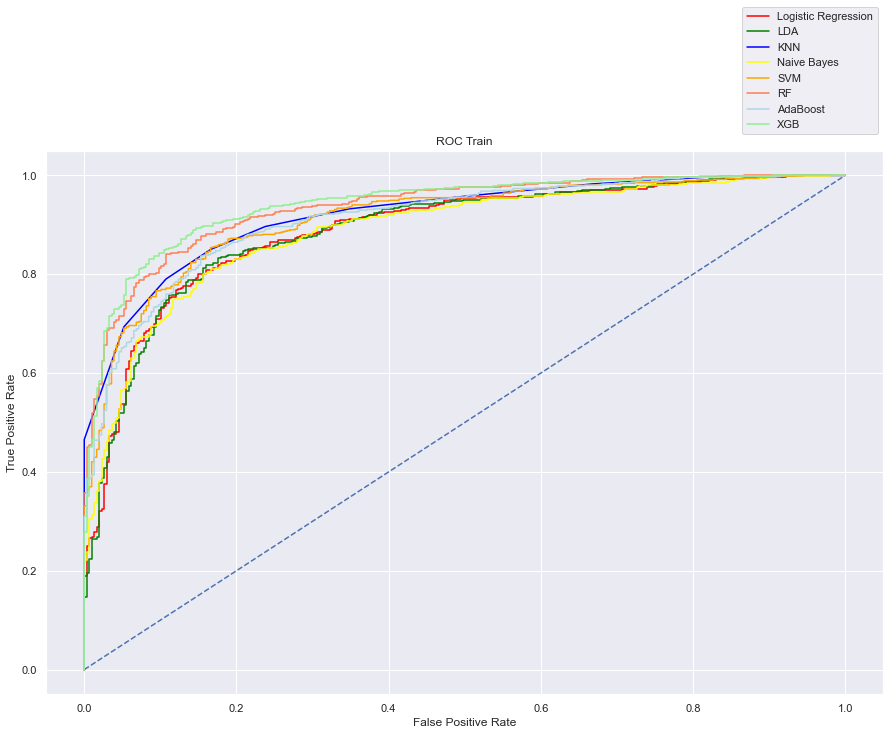

In [217]:
plt.figure(figsize = (15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_Log, tpr_train_Log, color='red',label="Logistic Regression")
plt.plot(fpr_train_LDA,tpr_train_LDA, color='green',label="LDA")
plt.plot(fpr_train_KNN, tpr_train_KNN, color='blue',label="KNN")
plt.plot(fpr_train_NB,tpr_train_NB, color='yellow',label="Naive Bayes")
plt.plot(fpr_train_SVM, tpr_train_SVM, color='orange',label="SVM")
plt.plot(fpr_train_RF,tpr_train_RF, color='coral',label="RF")
plt.plot(fpr_train_ADB, tpr_train_ADB, color='lightblue',label="AdaBoost")
plt.plot(fpr_train_XGB,tpr_train_XGB, color='lightgreen',label="XGB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of all the Tuned Models for Training set :**')

## Inferences:
- The XGB model seems to give the best ROC curve for the training data.

**ROC Curve of all the Tuned Models for Testing set :**

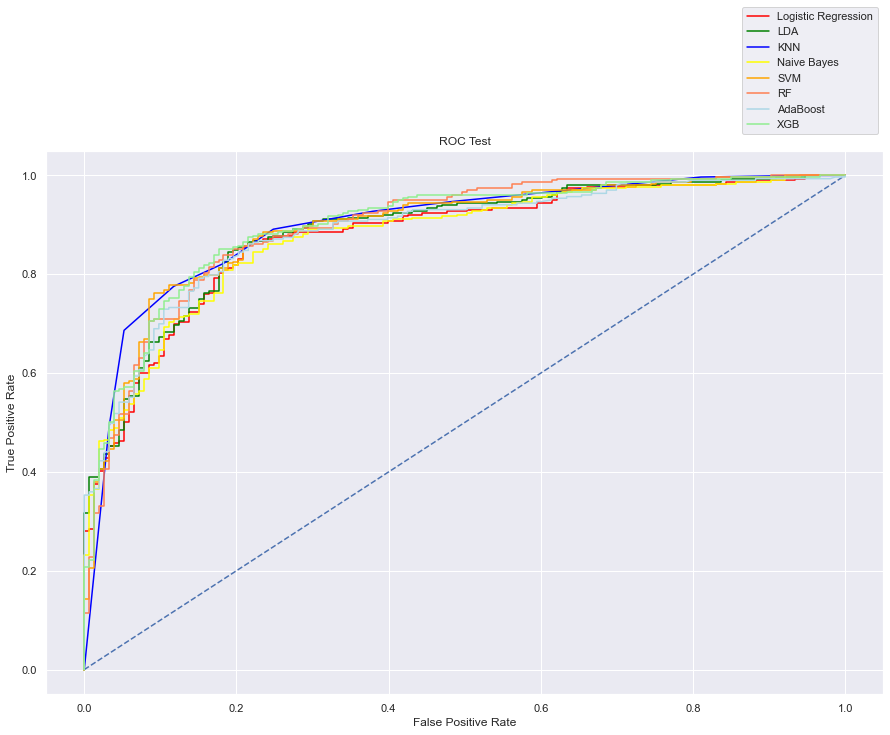

In [218]:
plt.figure(figsize = (15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test_Log, tpr_test_Log, color='red', label="Logistic Regression")
plt.plot(fpr_test_LDA, tpr_test_LDA, color='green', label="LDA")
plt.plot(fpr_test_KNN, tpr_test_KNN, color='blue', label="KNN")
plt.plot(fpr_test_NB, tpr_test_NB, color='yellow', label="Naive Bayes")
plt.plot(fpr_test_SVM, tpr_test_SVM, color='orange', label="SVM")
plt.plot(fpr_test_RF, tpr_test_RF, color='coral', label="RF")
plt.plot(fpr_test_ADB, tpr_test_ADB, color='lightblue', label="AdaBoost")
plt.plot(fpr_test_XGB, tpr_test_XGB, color='lightgreen', label="XGB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of all the Tuned Models for Testing set :**')

## Inferences:
- There are a few overlapping ROC curves. 

## Train Performance Metrics:

In [219]:
index=['Accuracy', 'AUC', 'Recall macro','Precision macro','f1 Score macro']
comparision_train = pd.DataFrame({'Log Reg Train':[Log_train_acc,Log_train_auc,Log_train_recall,Log_train_precision,Log_train_f1],
        'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'Naive Bayes Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'SVM Train':[SVM_train_acc,SVM_train_auc,SVM_train_recall,SVM_train_precision,SVM_train_f1],
        'RF Train':[RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
        'AdaBoost Train':[ADB_train_acc,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1],
        'XGB Train':[XGB_train_acc,XGB_train_auc,XGB_train_recall,XGB_train_precision,XGB_train_f1]}, index=index)
       
        
printmd('**Comparision Table of Performane Metrics of all Models Training data in Percentage:**')
round(comparision_train*100,2).T

**Comparision Table of Performane Metrics of all Models Training data in Percentage:**

Accuracy    AUC  Recall macro  Precision macro  \
Log Reg Train         83.22  89.00         80.76            79.47   
LDA Train             83.32  88.96         77.93            80.27   
KNN Train             85.77  91.97         82.94            82.63   
Naive Bayes Train     83.51  88.79         79.13            80.15   
SVM Train             84.92  91.36         84.18            81.39   
RF Train              87.18  93.53         82.48            85.47   
AdaBoost Train        85.49  91.19         80.81            82.99   
XGB Train             87.94  94.10         85.62            85.22   

                   f1 Score macro  
Log Reg Train               80.05  
LDA Train                   78.93  
KNN Train                   82.78  
Naive Bayes Train           79.61  
SVM Train                   82.49  
RF Train                    83.76  
AdaBoost Train              81.77  
XGB Train                   85.42

## Inferences:
- For Training data the f1-score macro value is highest for XGB model at 85.42% followed by RF at 83.76%.

**Comparision of Performance Metrics of of all Models for Training set :**

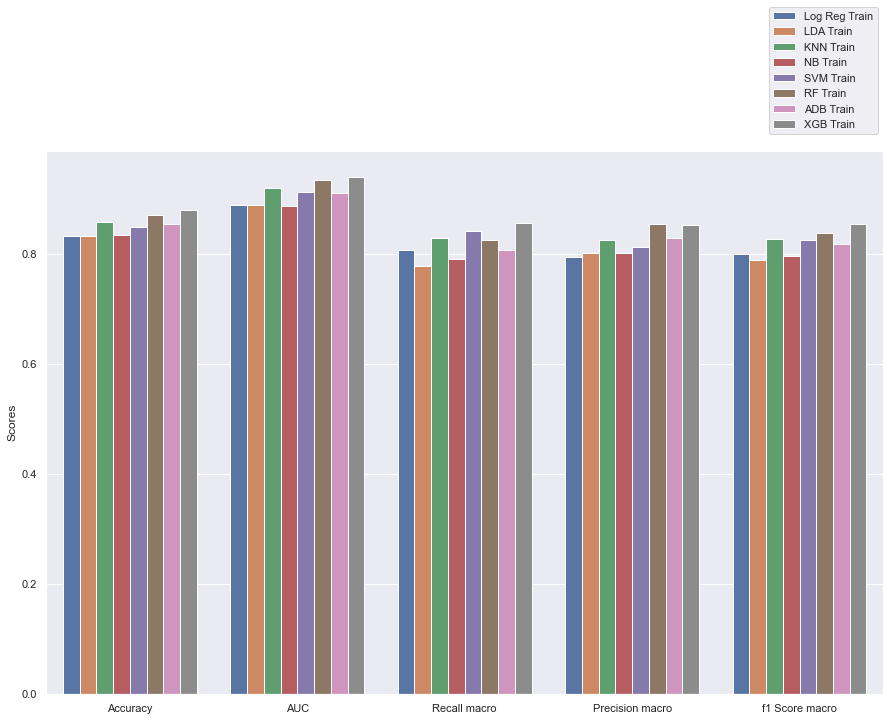

In [220]:
# Train

train_metrics = [Log_train_acc,Log_train_auc,Log_train_recall,Log_train_precision,Log_train_f1,
                LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1,
                KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1,
                NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1,
                SVM_train_acc,SVM_train_auc,SVM_train_recall,SVM_train_precision,SVM_train_f1,
                RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1,
                ADB_train_acc,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1,
                XGB_train_acc,XGB_train_auc,XGB_train_recall,XGB_train_precision,XGB_train_f1]
           
train_metrics_name = index*8
train_scores = pd.DataFrame(train_metrics, columns = ['Scores'], index = train_metrics_name)
train_models = ['Log Reg Train']*5 + ['LDA Train']*5 + ['KNN Train']*5 + ['NB Train']*5 + ['SVM Train']*5 
train_models = train_models + ['RF Train']*5 + ['ADB Train']*5 + ['XGB Train']*5
                 
train_scores['Model'] = train_models


plt.figure(figsize = (15,10))
sns.barplot( y = train_scores['Scores'], x = train_scores.index, hue = train_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Performance Metrics of of all Models for Training set :**')

**Comparision of Performance Metrics of of all Models for Training set :**

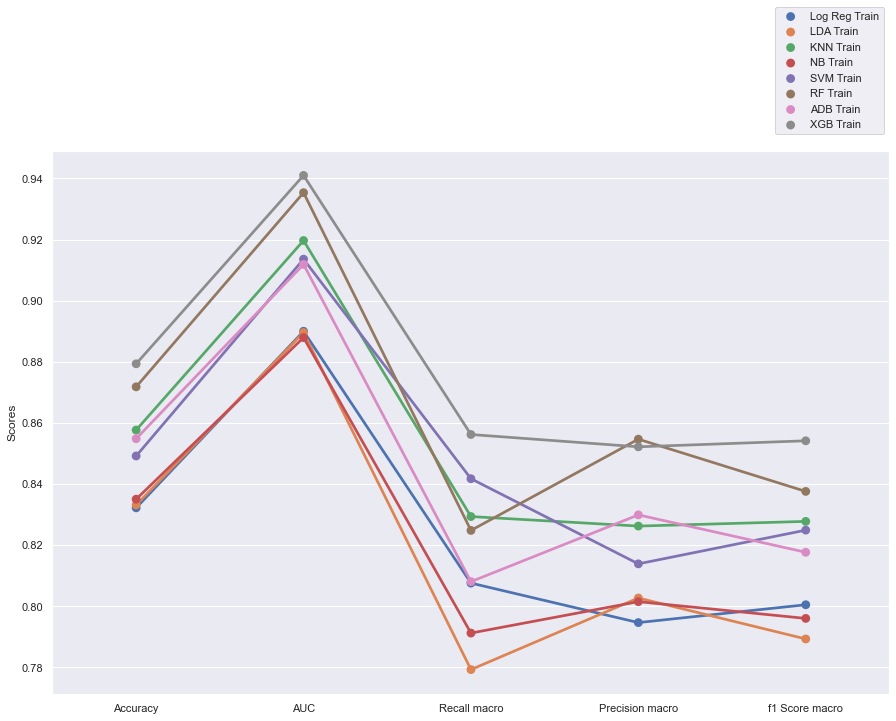

In [221]:
# Train

train_metrics = [Log_train_acc,Log_train_auc,Log_train_recall,Log_train_precision,Log_train_f1,
                LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1,
                KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1,
                NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1,
                SVM_train_acc,SVM_train_auc,SVM_train_recall,SVM_train_precision,SVM_train_f1,
                RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1,
                ADB_train_acc,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1,
                XGB_train_acc,XGB_train_auc,XGB_train_recall,XGB_train_precision,XGB_train_f1]
           
train_metrics_name = index*8
train_scores = pd.DataFrame(train_metrics, columns = ['Scores'], index = train_metrics_name)
train_models = ['Log Reg Train']*5 + ['LDA Train']*5 + ['KNN Train']*5 + ['NB Train']*5 + ['SVM Train']*5 
train_models = train_models + ['RF Train']*5 + ['ADB Train']*5 + ['XGB Train']*5
                 
train_scores['Model'] = train_models


plt.figure(figsize = (15,10))
sns.pointplot( y = train_scores['Scores'], x = train_scores.index, hue = train_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Performance Metrics of of all Models for Training set :**')

## Inferences:
- For Training Data it is observed that accuracy, AUC score, Recall macro and f1-score macro metrics are highest for XGB model and precision macro metric is second highest for XGB model.

## Test Performance Metrics:

In [222]:
index=['Accuracy', 'AUC', 'Recall macro','Precision macro','f1 Score macro']
comparision_test = pd.DataFrame({'Log Reg Test':[Log_test_acc,Log_test_auc,Log_test_recall,Log_test_precision,Log_test_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'Naive Bayes Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        'SVM Test':[SVM_test_acc,SVM_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1],
        'RF Test':[RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
        'AdaBoost Test':[ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
        'XGB Test':[XGB_test_acc,XGB_test_auc,XGB_test_recall,XGB_test_precision,XGB_test_f1]}, index=index)

printmd('**Comparision Table of Performane Metrics of all Models Testing data in Percentage:**')
round(comparision_test*100,2).T

**Comparision Table of Performane Metrics of all Models Testing data in Percentage:**

Accuracy    AUC  Recall macro  Precision macro  \
Log Reg Test         82.24  87.68         81.46            79.99   
LDA Test             83.55  88.69         81.15            81.68   
KNN Test             84.43  89.94         82.14            82.68   
Naive Bayes Test     82.24  87.64         80.00            80.10   
SVM Test             82.68  89.42         81.79            80.46   
RF Test              82.24  89.64         78.38            80.77   
AdaBoost Test        82.02  88.66         78.54            80.28   
XGB Test             84.43  89.97         82.62            82.52   

                  f1 Score macro  
Log Reg Test               80.59  
LDA Test                   81.40  
KNN Test                   82.40  
Naive Bayes Test           80.05  
SVM Test                   81.01  
RF Test                    79.33  
AdaBoost Test              79.27  
XGB Test                   82.57

## Inferences:
- For Testing data the f1-score macro value is highest for XGB model at 82.57% followed by KNN at 82.4%.

**Comparision of Performance Metrics of of all Models for Testing set :**

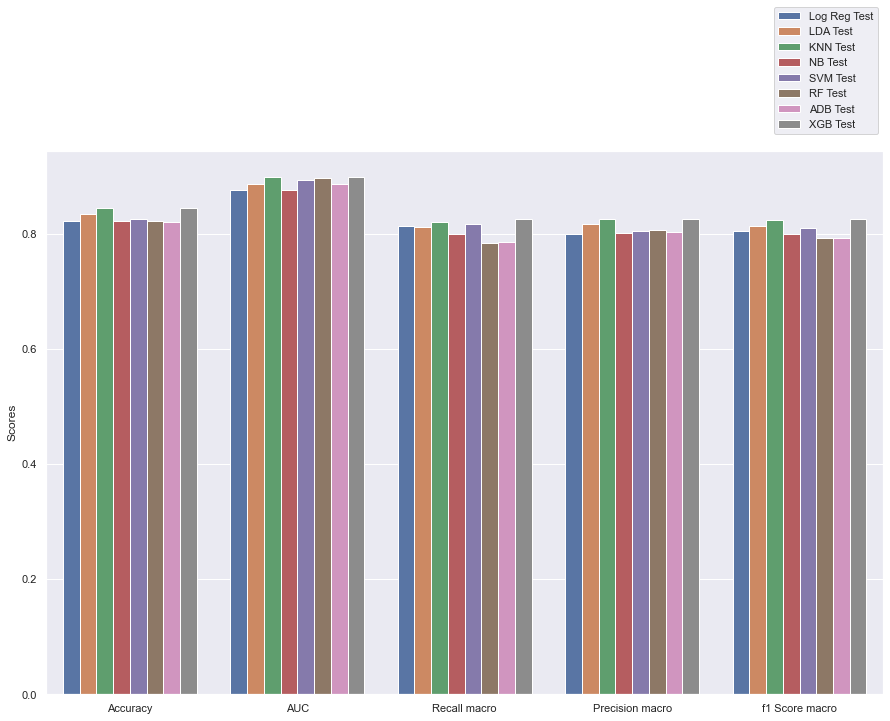

In [223]:
# Test

test_metrics = [Log_test_acc,Log_test_auc,Log_test_recall,Log_test_precision,Log_test_f1,
                LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1,
                KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1,
                NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1,
                SVM_test_acc,SVM_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1,
                RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1,
                ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1,
                XGB_test_acc,XGB_test_auc,XGB_test_recall,XGB_test_precision,XGB_test_f1]
           
           
test_metrics_name =index*8
test_scores = pd.DataFrame(test_metrics, columns = ['Scores'], index = test_metrics_name)
test_models = ['Log Reg Test']*5 + ['LDA Test']*5 + ['KNN Test']*5 + ['NB Test']*5 + ['SVM Test']*5 
test_models = test_models + ['RF Test']*5 + ['ADB Test']*5 + ['XGB Test']*5

test_scores['Model'] = test_models


plt.figure(figsize = (15,10))
sns.barplot( y = test_scores['Scores'], x = test_scores.index, hue = test_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Performance Metrics of of all Models for Testing set :**')

**Comparision of Performance Metrics of of all Models for Testing set :**

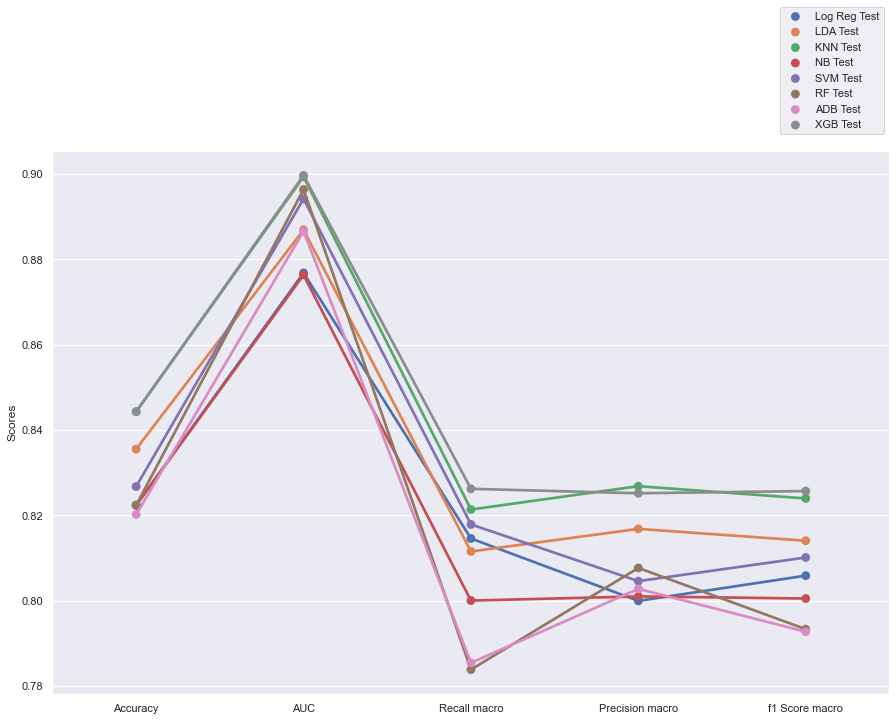

In [224]:
# Test

test_metrics = [Log_test_acc,Log_test_auc,Log_test_recall,Log_test_precision,Log_test_f1,
                LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1,
                KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1,
                NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1,
                SVM_test_acc,SVM_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1,
                RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1,
                ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1,
                XGB_test_acc,XGB_test_auc,XGB_test_recall,XGB_test_precision,XGB_test_f1]
           
           
test_metrics_name =index*8
test_scores = pd.DataFrame(test_metrics, columns = ['Scores'], index = test_metrics_name)
test_models = ['Log Reg Test']*5 + ['LDA Test']*5 + ['KNN Test']*5 + ['NB Test']*5 + ['SVM Test']*5 
test_models = test_models + ['RF Test']*5 + ['ADB Test']*5 + ['XGB Test']*5

test_scores['Model'] = test_models


plt.figure(figsize = (15,10))
sns.pointplot( y = test_scores['Scores'], x = test_scores.index, hue = test_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Performance Metrics of of all Models for Testing set :**')

## Inferences:
- For Testing Data it is observed that accuracy, AUC score, Recall macro and f1-score macro metrics are highest for XGB model and precision macro metric is second highest for XGB model.
- KNN model seems to be the second best model in performance metrics for Test data.

## Difference between Majority and Minority Class Precision, Recall and f1-score:

In [225]:
# Train 
index_diff = ['Precision','Recall','f1 Score']
XGB_train_recall_diff
comparision_maj_min = pd.DataFrame({'Log Reg Diff':[Log_train_precision_diff, Log_train_recall_diff, Log_train_f1_diff],
        'LDA Diff':[LDA_train_precision_diff, LDA_train_recall_diff, LDA_train_f1_diff],
        'KNN Diff':[KNN_train_precision_diff, KNN_train_recall_diff, KNN_train_f1_diff],
        'Naive Bayes Diff':[NB_train_precision_diff, NB_train_recall_diff, NB_train_f1_diff],
        'SVM Diff':[SVM_train_precision_diff, SVM_train_recall_diff, SVM_train_f1_diff],
        'RF Diff':[RF_train_precision_diff, RF_train_recall_diff, RF_train_f1_diff],
        'AdaBoost Diff':[ADB_train_precision_diff, ADB_train_recall_diff, ADB_train_f1_diff],
        'XGB Diff':[XGB_train_precision_diff, XGB_train_recall_diff, XGB_train_f1_diff]}, index=index_diff)

printmd('**Comparision Table of Difference in Performane Metrics between Majority and Minority Class of Training Data for all Models in Percentage:**')
round(comparision_maj_min*100,2).T

**Comparision Table of Difference in Performane Metrics between Majority and Minority Class of Training Data for all Models in Percentage:**

Precision  Recall  f1 Score
Log Reg Diff          19.97   11.69     15.91
LDA Diff              12.40   25.57     19.22
KNN Diff              15.25   13.43     14.35
Naive Bayes Diff      14.79   20.79     17.84
SVM Diff              21.83    3.53     13.04
RF Diff                6.89   22.30     14.91
AdaBoost Diff         10.35   22.20     16.46
XGB Diff              13.25   10.98     12.12

**Comparision of Difference in Performane Metrics between Majority and Minority Class of Training Data for all Models in Percentage:**

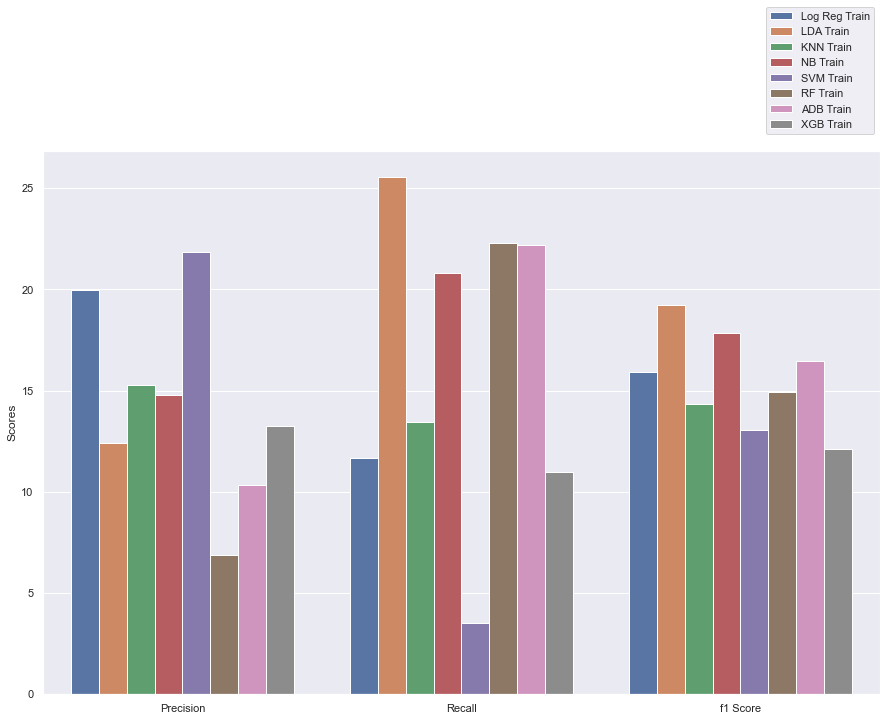

In [226]:
# Train Plot
index_diff = ['Precision','Recall','f1 Score']
diff_train_metrics = [Log_train_precision_diff, Log_train_recall_diff, Log_train_f1_diff,
                LDA_train_precision_diff, LDA_train_recall_diff, LDA_train_f1_diff,
                KNN_train_precision_diff, KNN_train_recall_diff, KNN_train_f1_diff,
                NB_train_precision_diff, NB_train_recall_diff, NB_train_f1_diff,
                SVM_train_precision_diff, SVM_train_recall_diff, SVM_train_f1_diff,
                RF_train_precision_diff, RF_train_recall_diff, RF_train_f1_diff,
                ADB_train_precision_diff, ADB_train_recall_diff, ADB_train_f1_diff,
                XGB_train_precision_diff, XGB_train_recall_diff, XGB_train_f1_diff]
           
           
diff_train_metrics_name =index_diff*8
diff_train_scores = pd.DataFrame(diff_train_metrics, columns = ['Scores'], index = diff_train_metrics_name)
diff_train_scores = (diff_train_scores)*100
diff_train_models = ['Log Reg Train']*3 + ['LDA Train']*3 + ['KNN Train']*3 + ['NB Train']*3 + ['SVM Train']*3 
diff_train_models = diff_train_models + ['RF Train']*3 + ['ADB Train']*3 + ['XGB Train']*3

diff_train_scores['Model'] = diff_train_models


plt.figure(figsize = (15,10))
sns.barplot( y = diff_train_scores['Scores'], x = diff_train_scores.index, hue = diff_train_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Difference in Performane Metrics between Majority and Minority Class of Training Data for all Models in Percentage:**')

**Comparision of Difference in Performane Metrics between Majority and Minority Class of Training Data for all Models in Percentage:**

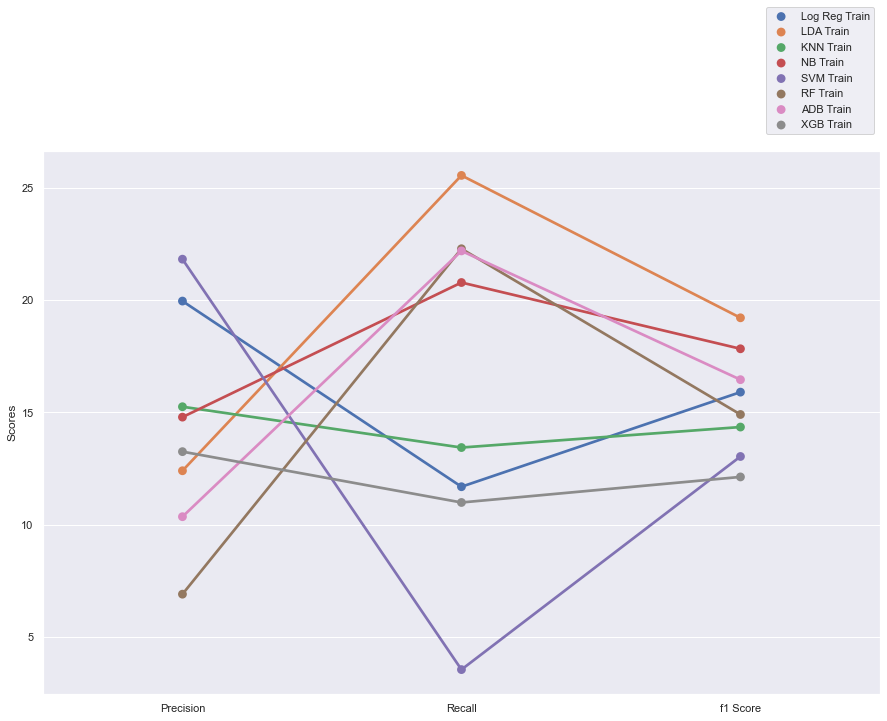

In [227]:
# Train Plot
index_diff = ['Precision','Recall','f1 Score']
diff_train_metrics = [Log_train_precision_diff, Log_train_recall_diff, Log_train_f1_diff,
                LDA_train_precision_diff, LDA_train_recall_diff, LDA_train_f1_diff,
                KNN_train_precision_diff, KNN_train_recall_diff, KNN_train_f1_diff,
                NB_train_precision_diff, NB_train_recall_diff, NB_train_f1_diff,
                SVM_train_precision_diff, SVM_train_recall_diff, SVM_train_f1_diff,
                RF_train_precision_diff, RF_train_recall_diff, RF_train_f1_diff,
                ADB_train_precision_diff, ADB_train_recall_diff, ADB_train_f1_diff,
                XGB_train_precision_diff, XGB_train_recall_diff, XGB_train_f1_diff]
           
           
diff_train_metrics_name =index_diff*8
diff_train_scores = pd.DataFrame(diff_train_metrics, columns = ['Scores'], index = diff_train_metrics_name)
diff_train_scores = (diff_train_scores)*100
diff_train_models = ['Log Reg Train']*3 + ['LDA Train']*3 + ['KNN Train']*3 + ['NB Train']*3 + ['SVM Train']*3 
diff_train_models = diff_train_models + ['RF Train']*3 + ['ADB Train']*3 + ['XGB Train']*3

diff_train_scores['Model'] = diff_train_models


plt.figure(figsize = (15,10))
sns.pointplot( y = diff_train_scores['Scores'], x = diff_train_scores.index, hue = diff_train_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Difference in Performane Metrics between Majority and Minority Class of Training Data for all Models in Percentage:**')

## Inferences:
- **For Training Data, it is observed that XGB model has low and similar difference between majority class and minority class precision and recall both. This is also observed only in KNN model but the precision and recall difference here is higher than XGB. All the other models have very high difference between precision and recall. Moreover for XGB model it is observed that the f1-score difference between majority and minority class is minimum.**

In [228]:
# Test 
index_diff = ['Precision','Recall','f1 Score']

comparision_maj_min = pd.DataFrame({'Log Reg Diff':[Log_test_precision_diff, Log_test_recall_diff, Log_test_f1_diff],
        'LDA Diff':[LDA_test_precision_diff, LDA_test_recall_diff, LDA_test_f1_diff],
        'KNN Diff':[KNN_test_precision_diff, KNN_test_recall_diff, KNN_test_f1_diff],
        'Naive Bayes Diff':[NB_test_precision_diff, NB_test_recall_diff, NB_test_f1_diff],
        'SVM Diff':[SVM_test_precision_diff, SVM_test_recall_diff, SVM_test_f1_diff],
        'RF Diff':[RF_test_precision_diff, RF_test_recall_diff, RF_test_f1_diff],
        'AdaBoost Diff':[ADB_test_precision_diff, ADB_test_recall_diff, ADB_test_f1_diff],
        'XGB Diff':[XGB_test_precision_diff, XGB_test_recall_diff, XGB_test_f1_diff]}, index=index_diff)

printmd('**Comparision Table of Difference in Performane Metrics between Majority and Minority Class of Testing Data for all Models in Percentage:**')
round(comparision_maj_min*100,2).T

**Comparision Table of Difference in Performane Metrics between Majority and Minority Class of Testing Data for all Models in Percentage:**

Precision  Recall  f1 Score
Log Reg Diff          17.63    4.74     11.33
LDA Diff              10.66   14.59     12.64
KNN Diff               9.96   13.95     11.97
Naive Bayes Diff      12.83   13.60     13.21
SVM Diff              16.87    5.40     11.24
RF Diff                6.99   23.43     15.50
AdaBoost Diff          8.73   21.14     15.09
XGB Diff              11.79   10.99     11.39

**Comparision of Difference in Performane Metrics between Majority and Minority Class of Testing Data for all Models in Percentage:**

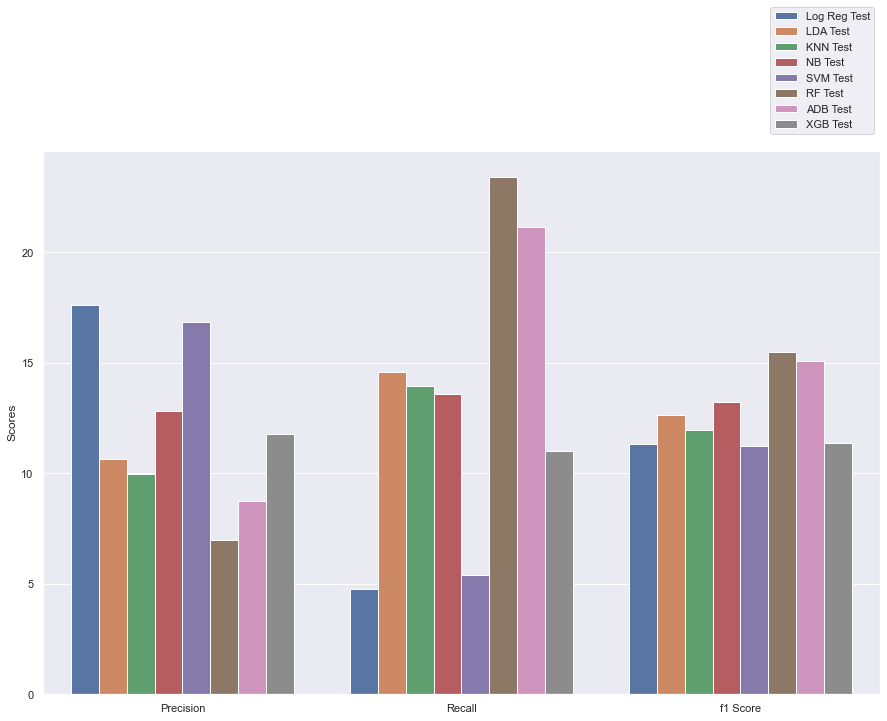

In [229]:
# Test plot
index_diff = ['Precision','Recall','f1 Score']
diff_test_metrics = [Log_test_precision_diff, Log_test_recall_diff, Log_test_f1_diff,
                LDA_test_precision_diff, LDA_test_recall_diff, LDA_test_f1_diff,
                KNN_test_precision_diff, KNN_test_recall_diff, KNN_test_f1_diff,
                NB_test_precision_diff, NB_test_recall_diff, NB_test_f1_diff,
                SVM_test_precision_diff, SVM_test_recall_diff, SVM_test_f1_diff,
                RF_test_precision_diff, RF_test_recall_diff, RF_test_f1_diff,
                ADB_test_precision_diff, ADB_test_recall_diff, ADB_test_f1_diff,
                XGB_test_precision_diff, XGB_test_recall_diff, XGB_test_f1_diff]
           
           
diff_test_metrics_name =index_diff*8
diff_test_scores = pd.DataFrame(diff_test_metrics, columns = ['Scores'], index = diff_test_metrics_name)
diff_test_scores = (diff_test_scores)*100
diff_test_models = ['Log Reg Test']*3 + ['LDA Test']*3 + ['KNN Test']*3 + ['NB Test']*3 + ['SVM Test']*3 
diff_test_models = diff_test_models + ['RF Test']*3 + ['ADB Test']*3 + ['XGB Test']*3

diff_test_scores['Model'] = diff_test_models


plt.figure(figsize = (15,10))
sns.barplot( y = diff_test_scores['Scores'], x = diff_test_scores.index, hue = diff_test_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Difference in Performane Metrics between Majority and Minority Class of Testing Data for all Models in Percentage:**')

**Comparision of Difference in Performane Metrics between Majority and Minority Class of Testing Data for all Models in Percentage:**

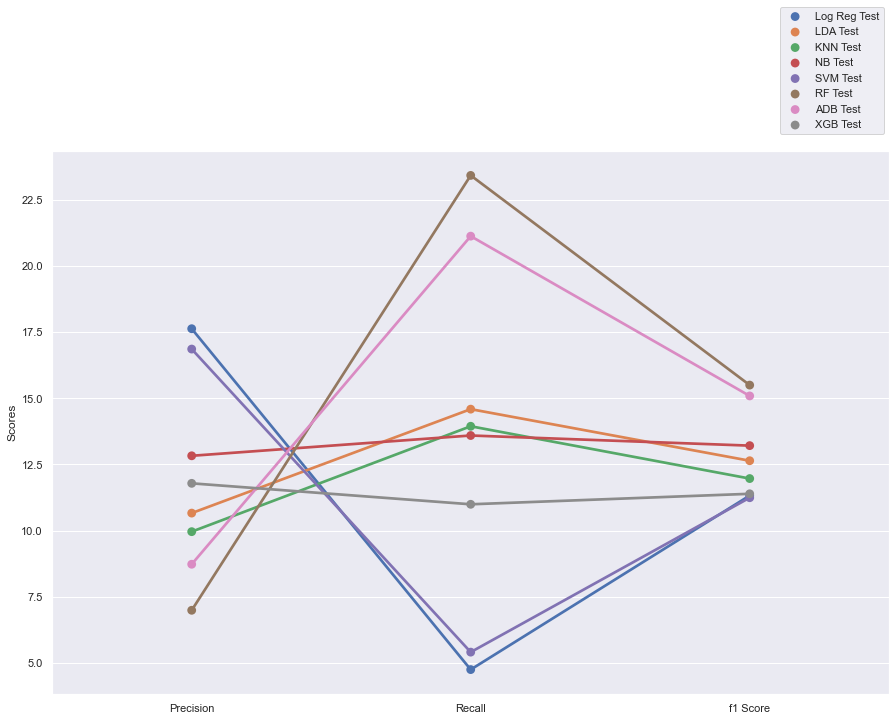

In [230]:
# Test plot
index_diff = ['Precision','Recall','f1 Score']
diff_test_metrics = [Log_test_precision_diff, Log_test_recall_diff, Log_test_f1_diff,
                LDA_test_precision_diff, LDA_test_recall_diff, LDA_test_f1_diff,
                KNN_test_precision_diff, KNN_test_recall_diff, KNN_test_f1_diff,
                NB_test_precision_diff, NB_test_recall_diff, NB_test_f1_diff,
                SVM_test_precision_diff, SVM_test_recall_diff, SVM_test_f1_diff,
                RF_test_precision_diff, RF_test_recall_diff, RF_test_f1_diff,
                ADB_test_precision_diff, ADB_test_recall_diff, ADB_test_f1_diff,
                XGB_test_precision_diff, XGB_test_recall_diff, XGB_test_f1_diff]
           
           
diff_test_metrics_name =index_diff*8
diff_test_scores = pd.DataFrame(diff_test_metrics, columns = ['Scores'], index = diff_test_metrics_name)
diff_test_scores = (diff_test_scores)*100
diff_test_models = ['Log Reg Test']*3 + ['LDA Test']*3 + ['KNN Test']*3 + ['NB Test']*3 + ['SVM Test']*3 
diff_test_models = diff_test_models + ['RF Test']*3 + ['ADB Test']*3 + ['XGB Test']*3

diff_test_scores['Model'] = diff_test_models


plt.figure(figsize = (15,10))
sns.pointplot( y = diff_test_scores['Scores'], x = diff_test_scores.index, hue = diff_test_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Difference in Performane Metrics between Majority and Minority Class of Testing Data for all Models in Percentage:**')

## Inferences:
- **For Testing Data, it is also observed that XGB model has low and similar difference between majority class and minority class precision and recall both. This is also observed only in Naive Bayes model but the precision and recall difference here is higher than XGB. All the other models have very high difference between precision and recall.** 
- **Moreover the f1-score difference between majority and mnority class is minimum for SVM followed by Logistic Regression and then XGB, but the values are very close to each other.**

## Comparing Train and Test Performance Metrics:

In [231]:
# Comparing Train and Test for each model

Log_diff_acc = Log_train_acc - Log_test_acc
Log_diff_auc = Log_train_auc - Log_test_auc
Log_diff_recall = Log_train_recall - Log_test_recall
Log_diff_precision = Log_train_precision - Log_test_precision
Log_diff_f1 = Log_train_f1 - Log_test_f1

LDA_diff_acc = LDA_train_acc - LDA_test_acc
LDA_diff_auc = LDA_train_auc - LDA_test_auc
LDA_diff_recall = LDA_train_recall - LDA_test_recall
LDA_diff_precision = LDA_train_precision - LDA_test_precision
LDA_diff_f1 = LDA_train_f1 - LDA_test_f1

KNN_diff_acc = KNN_train_acc - KNN_test_acc
KNN_diff_auc = KNN_train_auc - KNN_test_auc
KNN_diff_recall = KNN_train_recall - KNN_test_recall
KNN_diff_precision = KNN_train_precision - KNN_test_precision
KNN_diff_f1 = KNN_train_f1 - KNN_test_f1

NB_diff_acc = NB_train_acc - NB_test_acc
NB_diff_auc = NB_train_auc - NB_test_auc
NB_diff_recall = NB_train_recall - NB_test_recall
NB_diff_precision = NB_train_precision - NB_test_precision
NB_diff_f1 = NB_train_f1 - NB_test_f1

SVM_diff_acc = SVM_train_acc - SVM_test_acc
SVM_diff_auc = SVM_train_auc - SVM_test_auc
SVM_diff_recall = SVM_train_recall - SVM_test_recall
SVM_diff_precision = SVM_train_precision - SVM_test_precision
SVM_diff_f1 = SVM_train_f1 - SVM_test_f1

RF_diff_acc = RF_train_acc - RF_test_acc
RF_diff_auc = RF_train_auc - RF_test_auc
RF_diff_recall = RF_train_recall - RF_test_recall
RF_diff_precision = RF_train_precision - RF_test_precision
RF_diff_f1 = RF_train_f1 - RF_test_f1

ADB_diff_acc = ADB_train_acc - ADB_test_acc
ADB_diff_auc = ADB_train_auc - ADB_test_auc
ADB_diff_recall = ADB_train_recall - ADB_test_recall
ADB_diff_precision = ADB_train_precision - ADB_test_precision
ADB_diff_f1 = ADB_train_f1 - ADB_test_f1

XGB_diff_acc = XGB_train_acc - XGB_test_acc
XGB_diff_auc = XGB_train_auc - XGB_test_auc
XGB_diff_recall = XGB_train_recall - XGB_test_recall
XGB_diff_precision = XGB_train_precision - XGB_test_precision
XGB_diff_f1 = XGB_train_f1 - XGB_test_f1

In [232]:
index=['Accuracy', 'AUC', 'Recall macro','Precision macro','f1 Score macro']

comparision = pd.DataFrame({'Log Reg Diff':[Log_diff_acc,Log_diff_auc,Log_diff_recall,Log_diff_precision,Log_diff_f1],
        'LDA Diff':[LDA_diff_acc,LDA_diff_auc,LDA_diff_recall,LDA_diff_precision,LDA_diff_f1],
        'KNN Diff':[KNN_diff_acc,KNN_diff_auc,KNN_diff_recall,KNN_diff_precision,KNN_diff_f1],
        'Naive Bayes Diff':[NB_diff_acc,NB_diff_auc,NB_diff_recall,NB_diff_precision,NB_diff_f1],
        'SVM Diff':[SVM_diff_acc,SVM_diff_auc,SVM_diff_recall,SVM_diff_precision,SVM_diff_f1],
        'RF Diff':[RF_diff_acc,RF_diff_auc,RF_diff_recall,RF_diff_precision,RF_diff_f1],
        'AdaBoost Diff':[ADB_diff_acc,ADB_diff_auc,ADB_diff_recall,ADB_diff_precision,ADB_diff_f1],
        'XGB Diff':[XGB_diff_acc,XGB_diff_auc,XGB_diff_recall,XGB_diff_precision,XGB_diff_f1]}, index=index)

printmd('**Comparision Table of Absolute Difference in Performane Metrics between Training and Testing data of all Models in Percentage:**')
round(abs(comparision)*100,2).T

**Comparision Table of Absolute Difference in Performane Metrics between Training and Testing data of all Models in Percentage:**

Accuracy   AUC  Recall macro  Precision macro  \
Log Reg Diff          0.99  1.32          0.70             0.52   
LDA Diff              0.24  0.27          3.22             1.41   
KNN Diff              1.34  2.03          0.80             0.06   
Naive Bayes Diff      1.27  1.16          0.87             0.05   
SVM Diff              2.24  1.94          2.39             0.93   
RF Diff               4.95  3.90          4.10             4.70   
AdaBoost Diff         3.47  2.53          2.27             2.72   
XGB Diff              3.51  4.13          3.00             2.70   

                  f1 Score macro  
Log Reg Diff                0.53  
LDA Diff                    2.47  
KNN Diff                    0.38  
Naive Bayes Diff            0.44  
SVM Diff                    1.48  
RF Diff                     4.43  
AdaBoost Diff               2.50  
XGB Diff                    2.85

**Comparision of Absolute Difference in Performane Metrics between Training and Testing data of all Models in Percentage:**

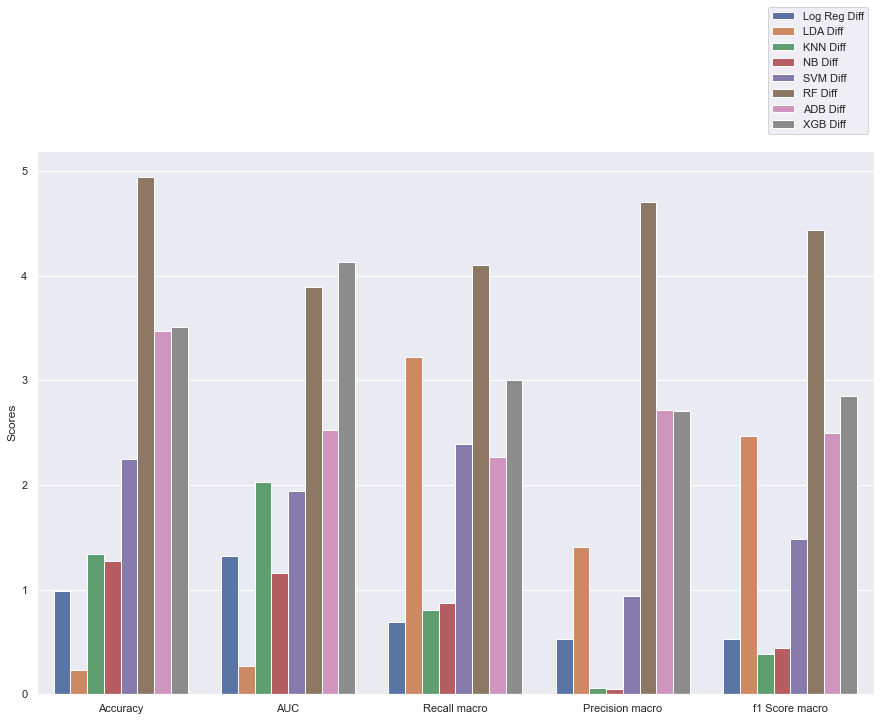

In [233]:
# Difference plot

diff_metrics = [Log_diff_acc,Log_diff_auc,Log_diff_recall,Log_diff_precision,Log_diff_f1,
                LDA_diff_acc,LDA_diff_auc,LDA_diff_recall,LDA_diff_precision,LDA_diff_f1,
                KNN_diff_acc,KNN_diff_auc,KNN_diff_recall,KNN_diff_precision,KNN_diff_f1,
                NB_diff_acc,NB_diff_auc,NB_diff_recall,NB_diff_precision,NB_diff_f1,
                SVM_diff_acc,SVM_diff_auc,SVM_diff_recall,SVM_diff_precision,SVM_diff_f1,
                RF_diff_acc,RF_diff_auc,RF_diff_recall,RF_diff_precision,RF_diff_f1,
                ADB_diff_acc,ADB_diff_auc,ADB_diff_recall,ADB_diff_precision,ADB_diff_f1,
                XGB_diff_acc,XGB_diff_auc,XGB_diff_recall,XGB_diff_precision,XGB_diff_f1]
           


diff_metrics_name =index*8
diff_scores = pd.DataFrame(diff_metrics, columns = ['Scores'], index = diff_metrics_name)
diff_scores = abs(diff_scores)*100
diff_models = ['Log Reg Diff']*5 + ['LDA Diff']*5 + ['KNN Diff']*5 + ['NB Diff']*5 + ['SVM Diff']*5 
diff_models = diff_models + ['RF Diff']*5 + ['ADB Diff']*5 + ['XGB Diff']*5

diff_scores['Model'] = diff_models


plt.figure(figsize = (15,10))
sns.barplot( y = diff_scores['Scores'], x = diff_scores.index, hue = diff_scores['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Absolute Difference in Performane Metrics between Training and Testing data of all Models in Percentage:**')

## Inferences:
- The lowest difference in accuracy between training and testing is observed for LDA.
- The lowest difference in AUC score between training and testing is observed for LDA.
- The lowest difference in Recall macro between training and testing is observed for Logistic Regression.
- The lowest difference in Precision macro between training and testing is observed for Naive Bayes.
- The lowest difference in f1-score macro between training and testing is observed for KNN.

## TP, FP, TN and FN counts:
- **Note:** Class coded as 1 i.e. Labour Party is treated as Positive class and class coded as 0 i.e. Conservative Party is treated as Negative class below.

**Comparision of Prediction counts of all models for Training set :**

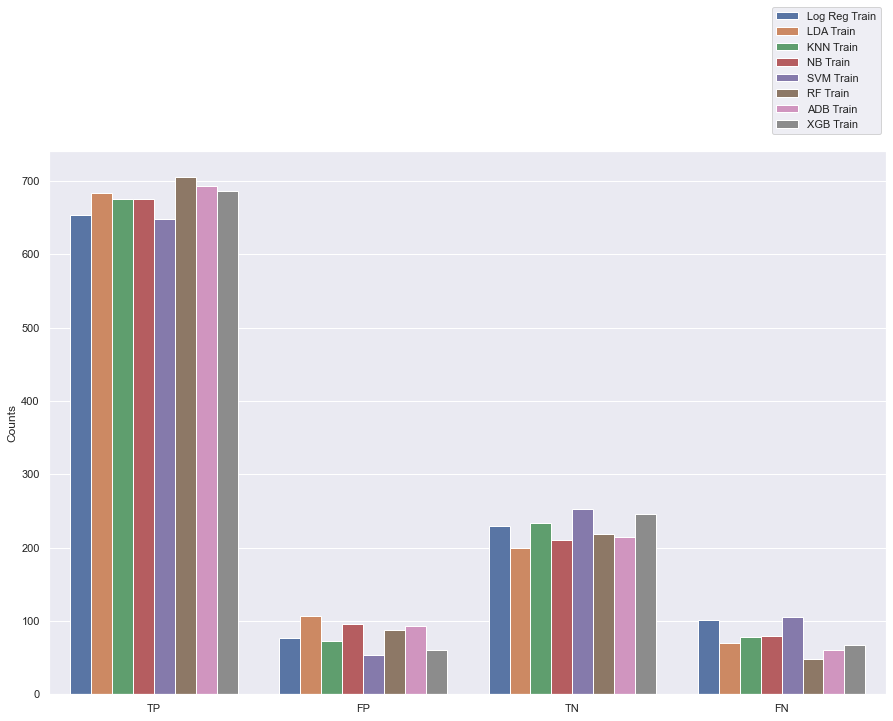

In [234]:
# Train

index = ['TP', 'FP', 'TN', 'FN']
train_predictions = [Log_train_TP, Log_train_FP, Log_train_TN, Log_train_FN,
                     LDA_train_TP, LDA_train_FP, LDA_train_TN, LDA_train_FN,
                     KNN_train_TP, KNN_train_FP, KNN_train_TN, KNN_train_FN,
                     NB_train_TP, NB_train_FP, NB_train_TN, NB_train_FN,
                     SVM_train_TP, SVM_train_FP, SVM_train_TN, SVM_train_FN,
                     RF_train_TP, RF_train_FP, RF_train_TN, RF_train_FN,
                     ADB_train_TP, ADB_train_FP, ADB_train_TN, ADB_train_FN,
                     XGB_train_TP, XGB_train_FP, XGB_train_TN, XGB_train_FN]
                     
train_predictions_name =index*8
train_predictions_df = pd.DataFrame(train_predictions, columns = ['Counts'], index = train_predictions_name)
train_models_predictions = ['Log Reg Train']*4 + ['LDA Train']*4 + ['KNN Train']*4 + ['NB Train']*4 + ['SVM Train']*4
train_models_predictions = train_models_predictions + ['RF Train']*4 + ['ADB Train']*4 + ['XGB Train']*4
train_predictions_df['Model'] = train_models_predictions


plt.figure(figsize = (15,10))
sns.barplot( y = train_predictions_df['Counts'], x = train_predictions_df.index, hue = train_predictions_df['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Prediction counts of all models for Training set :**')

## Inferences:
- The highest count of TP for Training Data is observed for RF.
- The lowest count of FP for Training Data is observed for SVM.
- The highest count of TN for Training Data is observed for SVM.
- The lowest count of FN for Training Data is observed for RF.

**Comparision of Prediction counts of all models for Testing set :**

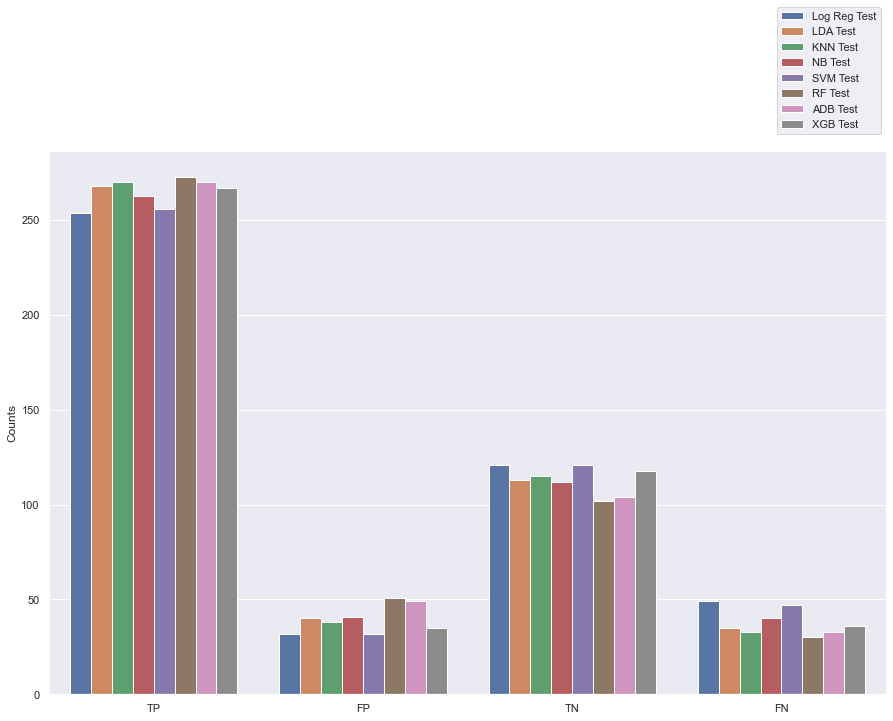

In [235]:
# Test
index = ['TP', 'FP', 'TN', 'FN']
test_predictions = [Log_test_TP, Log_test_FP, Log_test_TN, Log_test_FN,
                    LDA_test_TP, LDA_test_FP, LDA_test_TN, LDA_test_FN,
                    KNN_test_TP, KNN_test_FP, KNN_test_TN, KNN_test_FN,
                    NB_test_TP, NB_test_FP, NB_test_TN, NB_test_FN,
                    SVM_test_TP, SVM_test_FP, SVM_test_TN, SVM_test_FN,
                    RF_test_TP, RF_test_FP, RF_test_TN, RF_test_FN,
                    ADB_test_TP, ADB_test_FP, ADB_test_TN, ADB_test_FN,
                    XGB_test_TP, XGB_test_FP, XGB_test_TN, XGB_test_FN]




test_predictions_name =index*8
test_predictions_df = pd.DataFrame(test_predictions, columns = ['Counts'], index = test_predictions_name)
test_models_predictions = ['Log Reg Test']*4 + ['LDA Test']*4 + ['KNN Test']*4 + ['NB Test']*4 + ['SVM Test']*4
test_models_predictions = test_models_predictions + ['RF Test']*4 + ['ADB Test']*4 + ['XGB Test']*4
test_predictions_df['Model'] = test_models_predictions


plt.figure(figsize = (15,10))
sns.barplot( y = test_predictions_df['Counts'], x = test_predictions_df.index, hue = test_predictions_df['Model'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**Comparision of Prediction counts of all models for Testing set :**')

## Inferences:
- The highest count of TP for Testing Data is observed for RF.
- The lowest count of FP for Testing Data is observed for SVM and Logistic Regression.
- The highest count of TN for Testing Data is observed for SVM.
- The lowest count of FN for Testing Data is observed for RF.

# Conclusion and Selection of Optimized Model:
**We can compare the two models on the following parameters:**
    
1. **Difference in performance between Train and Test Data:** We have already observed that all the model performance metrics are well within the general norm of +/- 10% of each other. 
    
2. **Difference between minority and majority class:** 
    - For Training Data, it is observed that XGB model has low and similar difference between majority class and minority class precision and recall both. This is also observed only in KNN model but the precision and recall difference here is higher than XGB. All the other models have very high difference between precision and recall. Moreover for XGB model it is observed that the f1-score difference between majority and minority class is minimum.
    - For Testing Data, it is also observed that XGB model has low and similar difference between majority class and minority class precision and recall both. This is also observed only in Naive Bayes model but the precision and recall difference here is higher than XGB. All the other models have very high difference between precision and recall. Moreover the f1-score difference between majority and minority class is minimum for SVM followed by Logistic Regression and then XGB, but the values are very close to each other.
    - **Hence according to this logic we can consider the XGB model is better the other models on this front.**
    
3. **Overfitting:** Certain models have values of performance metrics above 90% but for these metrics the training and testing values are close to each other with a maximum difference of around 4%.
    
4. **Overall Performance Metrics:** The different evaluation metrics (upto 2 decimal places) with the best performances in Training and Testing data is as follows:
    - **Accuracy:** The highest accuracy for training is observed for XGB and for testing data it is observed for both KNN and XGB.
    - **AUC Score:** The highest AUC Score for training is observed for XGB and for testing data it is observed for XGB.
    - **Recall macro:** The highest Recall macro for training is observed for XGB and for testing data it is observed for XGB.
    - **Precision macro:** The highest Precision macro for training is observed for RF followed by XGB and for testing data it is observed for KNN followed by XGB.
    - **f1-score macro:** The highest Precision macro for training is observed for XGB and for testing data it is observed for XGB.
    - **Thus it observed that XGB model has performed very well in all the performance metrics both for training and testing data.**
    - Moreover for the given case study we want to correctly predict votes in favour of both Conservative Party and Labour Party. **Thus type I error and type II error are both equally important for us. Hence 'f1 score' (note: here we are considering 'f1 score macro' because it calculates the non weighted average of minority and majority class) is the most important performance metric here. And since as observed 'f1 score macro' for XGB Model is higher than all other models. Thus according the performance metrics, XGB Model is overall better than the other models.**

**Thus considering all the above points XGB model is found to best optimized.**
    

# Insights & Recommendations:

### Some Important insights from Bivariate Analysis with Target variable 'vote':
- Already some Bivariate analysis has been done and important inferences drawn, the plots of which are shown below. 

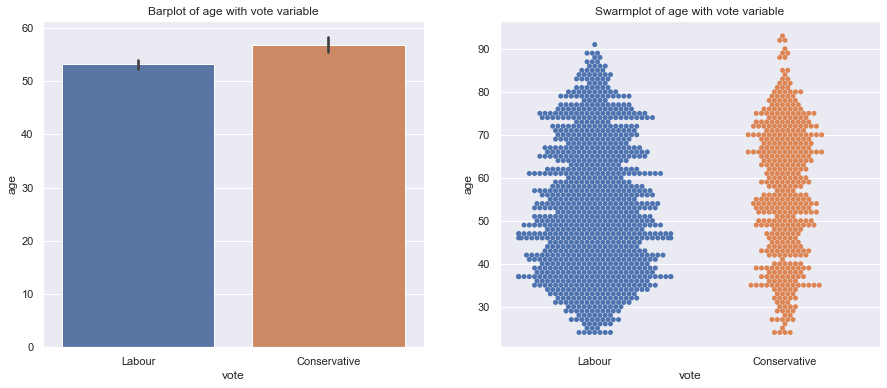

In [236]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(x = 'vote', y = 'age', data = election_copy)
plt.title('Barplot of age with vote variable')
plt.subplot(1,2,2)
sns.swarmplot(x = 'vote', y = 'age', data = election_copy)
plt.title('Swarmplot of age with vote variable');

## Inferences:
- The Average age of voters who voted for Conservative Party seem to be a little higher than those who voted for Labour party.

**Perecentage wise tabulation of gender of voters as per Party choice :**

gender        female   male
vote                       
Conservative   31.81  28.63
Labour         68.19  71.37


**Countplot of gender Variable according to Party choice :**

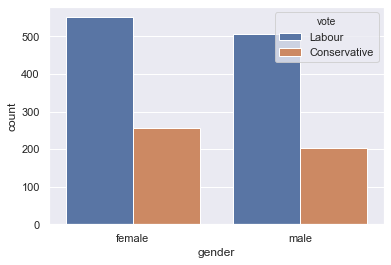

In [237]:
sns.countplot(election_copy['gender'], hue  = election_copy['vote'])
printmd('**Perecentage wise tabulation of gender of voters as per Party choice :**')
print(round(pd.crosstab(index = election_copy['vote'], columns = election_copy['gender']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of gender Variable according to Party choice :**')

## Inferences:
- No special observation can be made as the overall percentage of votes in favour of either Party remain same even when the gender of voters are considered.

**Perecentage wise tabulation of National economic condition ratings given by voter as per Party choice :**

economic.cond.national      1      2      3      4      5
vote                                                     
Conservative            56.76  54.69  32.95  16.91  10.98
Labour                  43.24  45.31  67.05  83.09  89.02


**Countplot of economic.cond.national variable according to Party choice :**

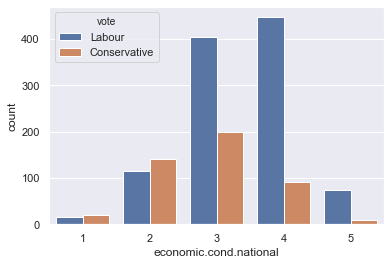

In [238]:
sns.countplot(election_copy['economic.cond.national'], hue  = election_copy['vote'])
printmd('**Perecentage wise tabulation of National economic condition ratings given by voter as per Party choice :**')
print(round(pd.crosstab(index = election_copy['vote'], columns = election_copy['economic.cond.national']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of economic.cond.national variable according to Party choice :**')

## Inferences:
- **Voters who have given higher ratings for current national economic condition favour the Labour Party highly.** 

**Perecentage wise tabulation of household economic condition ratings given by voter as per Party choice :**

economic.cond.household      1     2      3      4     5
vote                                                    
Conservative             43.08  45.0  30.54  19.77  25.0
Labour                   56.92  55.0  69.46  80.23  75.0


**Countplot of economic.cond.household Variable according to Party choice :**

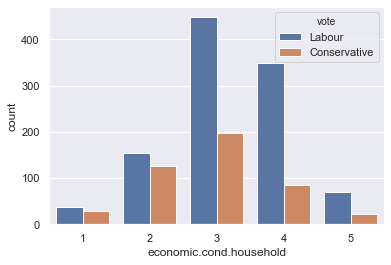

In [239]:
sns.countplot(election_copy['economic.cond.household'], hue  = election_copy['vote'])
printmd('**Perecentage wise tabulation of household economic condition ratings given by voter as per Party choice :**')
print(round(pd.crosstab(index = election_copy['vote'], columns = election_copy['economic.cond.household']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of economic.cond.household Variable according to Party choice :**')

## Inferences:
- **Voters who have given higher ratings for current household economic condition favour the Labour Party much more than who have given lower ratings.** 

**Perecentage wise tabulation of ratings given in favour of Blair by voter as per Party choice :**

Blair             1     2      3      4      5
vote                                          
Conservative  60.82  55.3  100.0  18.85   1.97
Labour        39.18  44.7    0.0  81.15  98.03


**Countplot of Blair Variable according to Party choice :**

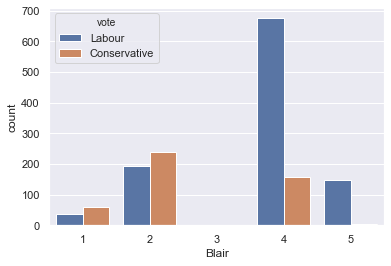

In [240]:
sns.countplot(election_copy['Blair'], hue  = election_copy['vote'])
printmd('**Perecentage wise tabulation of ratings given in favour of Blair by voter as per Party choice :**')
print(round(pd.crosstab(index = election_copy['vote'], columns = election_copy['Blair']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of Blair Variable according to Party choice :**')

## Inferences:
- **Voters who have given 4 and above ratings for Blair favour the Labour Party highly.** 

**Perecentage wise tabulation of  ratings given in favour of Hague by voter as per Party choice :**

Hague             1     2      3      4      5
vote                                          
Conservative   4.72  15.4  24.32  51.35  80.82
Labour        95.28  84.6  75.68  48.65  19.18


**Countplot of  Hague Variable according to Party choice :**

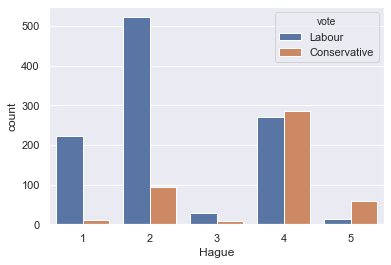

In [241]:
sns.countplot(election_copy['Hague'], hue  = election_copy['vote'])
printmd('**Perecentage wise tabulation of  ratings given in favour of Hague by voter as per Party choice :**')
print(round(pd.crosstab(index = election_copy['vote'], columns = election_copy['Hague']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of  Hague Variable according to Party choice :**')

## Inferences:
- **Voters who have given ratings of 3 or less for Hague are more in favour of the Labour party. Voters who have given a rating of 4 for Hague seem to be equally in favour of either parties, and voters who have given a rating of 5 for Hague seem to favour the Conservative party more.** 

**Perecentage wise tabulation of ratings according to Eurosceptic Sentiment level by voter as per Party choice :**

Europe           1      2      3      4      5      6      7      8      9   \
vote                                                                          
Conservative   4.59   7.79  10.94  14.29  16.26  16.91  37.21  43.24  50.45   
Labour        95.41  92.21  89.06  85.71  83.74  83.09  62.79  56.76  49.55   

Europe           10     11  
vote                        
Conservative  53.47  50.89  
Labour        46.53  49.11  


**Countplot of  Europe Variable according to Party choice :**

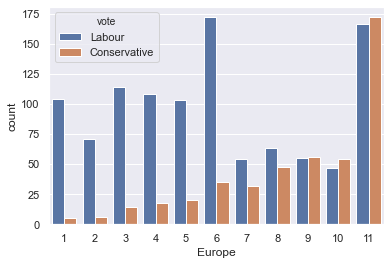

In [242]:
sns.countplot(election_copy['Europe'], hue  = election_copy['vote'])
printmd('**Perecentage wise tabulation of ratings according to Eurosceptic Sentiment level by voter as per Party choice :**')
print(round(pd.crosstab(index = election_copy['vote'], columns = election_copy['Europe']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of  Europe Variable according to Party choice :**')

## Inferences:
- As the Eurosceptic sentiments of the voters increase the percentage of voters in favour of Conservative Party also increase. For the lower ratings it is observed that the percentage of voters is much higher for Labour Party. **Thus overall the voters who have less Eurosceptic sentiments seem to favour the Labour Party more.**

**Perecentage wise tabulation of ratings according to knowledge of parties positions on European integration by voter as per Party choice :**

political.knowledge     0      1      2      3
vote                                          
Conservative         20.7  28.95  36.47  28.92
Labour               79.3  71.05  63.53  71.08


**Countplot of political.knowledge Variable according to Party choice :**

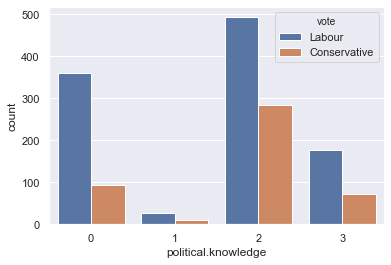

In [243]:
sns.countplot(election_copy['political.knowledge'], hue  = election_copy['vote'])
printmd('**Perecentage wise tabulation of ratings according to knowledge of parties positions on European integration by voter as per Party choice :**')
print(round(pd.crosstab(index = election_copy['vote'], columns = election_copy['political.knowledge']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of political.knowledge Variable according to Party choice :**')

## Inferences:
- **Voters with different levels of knowledge on the either Parties' stance on Europe Integration seem to support Labour Party especially those who seem to have no political knowledge highly favour Labour Party.**

## Importance of Variables from the Different Models:
- **Note:** All the Models do not calculate feature importances. The models which do not calculate feature importances are: KNN, Naive Bayes and SVM (only for linear kernel). All the other models used here can give feature importances. 

## Logistic Regression Feature Importances:

In [244]:
coeffs_df = pd.DataFrame(model_Log_Reg.coef_.reshape(X_train.shape[1]), columns = ['Coefficients'], index = X_train.columns)
printmd('**Logistic Regression coefficients :**')
coeffs_df

**Logistic Regression coefficients :**

Coefficients
age                         -0.196404
economic.cond.national       0.733034
economic.cond.household      0.086203
Blair                        0.654941
Hague                       -0.774692
Europe                      -0.224003
political.knowledge         -0.271340
gender                       0.231148

In [245]:
coeffs_df = pd.DataFrame(model_Log_Reg.coef_.reshape(X_train.shape[1]), columns = ['Coefficients'], index = X_train.columns)
printmd('**Logistic Regression coefficients absolute values to observe the coefficients with highest magnitude:**')
abs(coeffs_df).sort_values('Coefficients', ascending = False)

**Logistic Regression coefficients absolute values to observe the coefficients with highest magnitude:**

Coefficients
Hague                        0.774692
economic.cond.national       0.733034
Blair                        0.654941
political.knowledge          0.271340
gender                       0.231148
Europe                       0.224003
age                          0.196404
economic.cond.household      0.086203

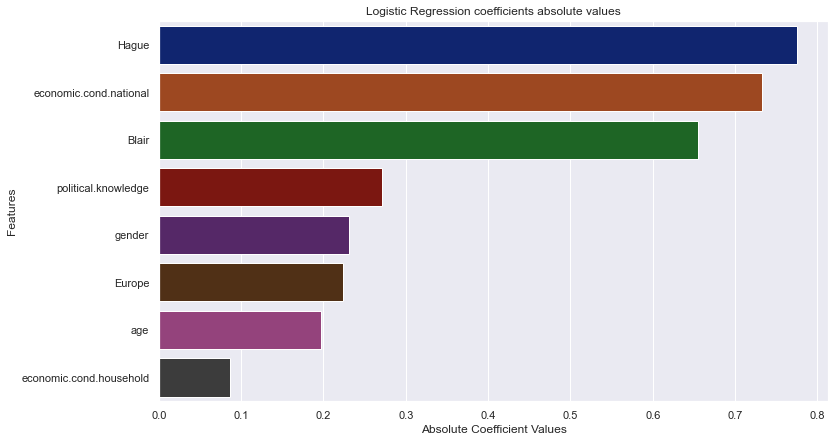

In [246]:
coeffs_abs = abs(coeffs_df['Coefficients']).sort_values(ascending = False)
plt.figure(figsize=(12,7))
sns.barplot( abs(coeffs_df['Coefficients']).sort_values(ascending = False), coeffs_abs.index, palette='dark')
plt.xlabel('Absolute Coefficient Values')
plt.ylabel('Features')
plt.title('Logistic Regression coefficients absolute values')
plt.show()

## Inferences:
- For Linear Regression Model, the top four features in decreasing order of feature importance are: 'Hague', 'economic.cond.national', 'Blair' and 'political.knowledge'. 

## LDA Feature Importances:

In [247]:
coeffs_df = pd.DataFrame(model_LDA.coef_.reshape(X_train.shape[1]), columns = ['Coefficients'], index = X_train.columns)
printmd('**LDA coefficients :**')
coeffs_df

**LDA coefficients :**

Coefficients
age                         -0.300656
economic.cond.national       0.632353
economic.cond.household      0.084974
Blair                        0.767361
Hague                       -0.939558
Europe                      -0.238747
political.knowledge         -0.428492
gender                       0.119384

In [248]:
coeffs_df = pd.DataFrame(model_LDA.coef_.reshape(X_train.shape[1]), columns = ['Coefficients'], index = X_train.columns)
printmd('**LDA coefficients absolute values to observe the coefficients with highest magnitude:**')
abs(coeffs_df).sort_values('Coefficients', ascending = False)

**LDA coefficients absolute values to observe the coefficients with highest magnitude:**

Coefficients
Hague                        0.939558
Blair                        0.767361
economic.cond.national       0.632353
political.knowledge          0.428492
age                          0.300656
Europe                       0.238747
gender                       0.119384
economic.cond.household      0.084974

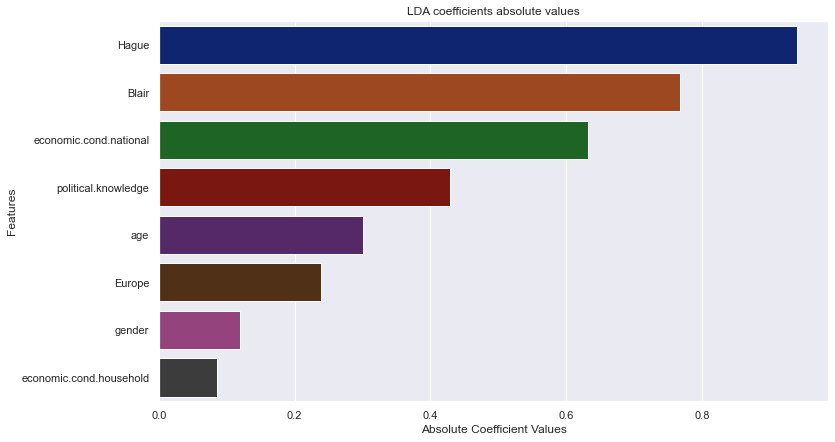

In [249]:
coeffs_abs = abs(coeffs_df['Coefficients']).sort_values(ascending = False)
plt.figure(figsize=(12,7))
sns.barplot( abs(coeffs_df['Coefficients']).sort_values(ascending = False), coeffs_abs.index, palette='dark')
plt.xlabel('Absolute Coefficient Values')
plt.ylabel('Features')
plt.title('LDA coefficients absolute values')
plt.show()

## Inferences:
- For LDA Model, the top four features in decreasing order of feature importance are: 'Hague', 'Blair', 'economic.cond.national' and 'political.knowledge'.


## RF Feature Importances:

In [250]:
coeffs_df = pd.DataFrame(model_RF.feature_importances_.reshape(X_train.shape[1]), columns = ['Importance'], index = X_train.columns)
printmd('**The normalised importance of different variables using RF model:**')
coeffs_df.sort_values(by = 'Importance', ascending = False)

**The normalised importance of different variables using RF model:**

Importance
Hague                      0.299052
Blair                      0.227162
Europe                     0.193781
economic.cond.national     0.087633
age                        0.079637
political.knowledge        0.071100
economic.cond.household    0.030257
gender                     0.011380

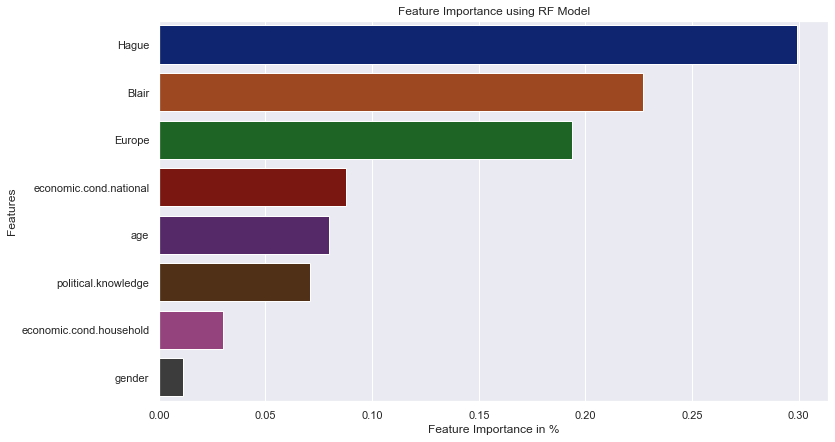

In [251]:
coeffs = coeffs_df['Importance'].sort_values(ascending = False)
plt.figure(figsize=(12,7))
sns.barplot( coeffs_df['Importance'].sort_values(ascending = False), coeffs.index, palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF Model')
plt.show()

## Inferences:
- For RF Model, the top four features in decreasing order of feature importance are: 'Hague', 'Blair', 'Europe' and 'economic.cond.national'.


## AdaBoost Feature Importances:

In [252]:
coeffs_df = pd.DataFrame(model_ADB.feature_importances_.reshape(X_train.shape[1]), columns = ['Importance'], index = X_train.columns)
printmd('**The normalised importance of different variables using AdaBoost model:**')
coeffs_df.sort_values(by = 'Importance', ascending = False)

**The normalised importance of different variables using AdaBoost model:**

Importance
age                            0.43
Blair                          0.12
Europe                         0.12
economic.cond.household        0.11
Hague                          0.11
economic.cond.national         0.07
political.knowledge            0.04
gender                         0.00

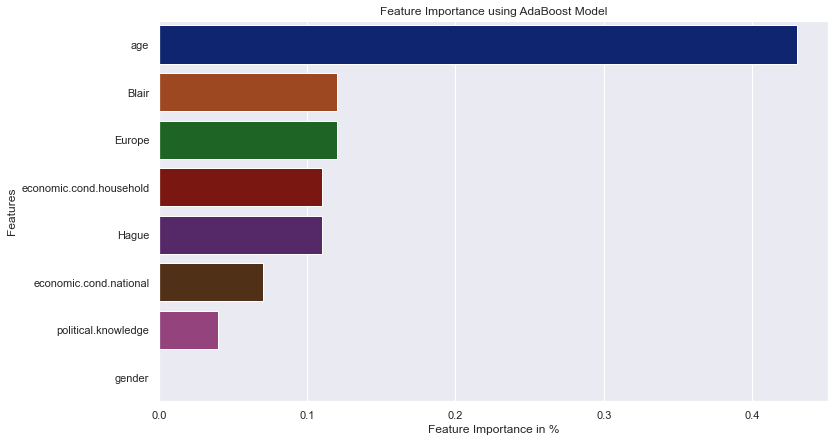

In [253]:
coeffs = coeffs_df.sort_values(by = 'Importance', ascending = False)
plt.figure(figsize=(12,7))
sns.barplot( coeffs_df['Importance'].sort_values(ascending = False), coeffs.index, palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using AdaBoost Model')
plt.show()

## Inferences:
- For AdaBoost Model, the top three features in decreasing order of feature importance are: 'age', 'Europe', 'Blair', 'Hague', 'economic.cond.household'.
- Note: In all the three above Models age was not an important feature.

## XGBoost Feature Importances:

In [254]:
coeffs_df = pd.DataFrame(model_XGB.feature_importances_.reshape(X_train.shape[1]), columns = ['Importance'], index = X_train.columns)
printmd('**The normalised importance of different variables using XGBoost model:**')
coeffs_df.sort_values(by = 'Importance', ascending = False)

**The normalised importance of different variables using XGBoost model:**

Importance
Hague                      0.272086
Blair                      0.231300
Europe                     0.151116
political.knowledge        0.105547
economic.cond.national     0.095122
age                        0.055422
economic.cond.household    0.052556
gender                     0.036849

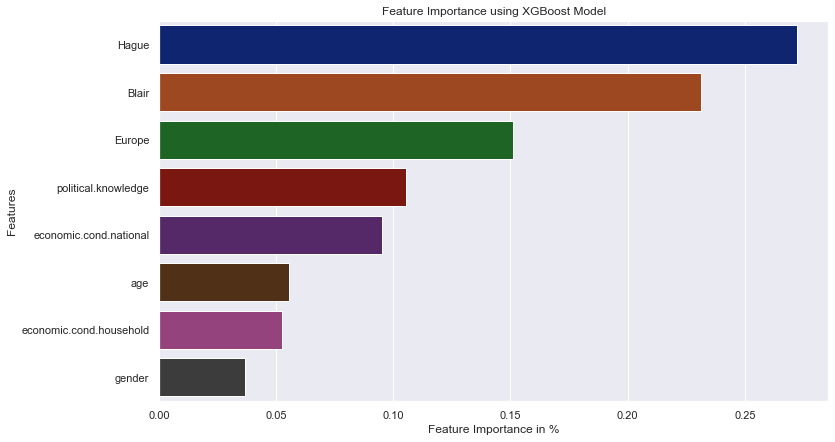

In [255]:
coeffs = coeffs_df['Importance'].sort_values(ascending = False)
plt.figure(figsize=(12,7))
sns.barplot( coeffs_df['Importance'].sort_values(ascending = False), coeffs.index, palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using XGBoost Model')
plt.show()

## Inferences:
- For XgBoost Model, the top four features in decreasing order of feature importance are: 'Hague', 'Blair', 'Europe' and 'political.knowledge'.

## Important Insights from above:
- The important insights of Target variable 'vote' with the independent variables are as follows:
    - **The Average age of voters who voted for Conservative Party seem to be a little higher than those who voted for Labour party.**
    - **Voters who have given higher ratings for current national economic conditions and current household economic conditions show favour the Labour Party highly.**
    - **Voters who have given 4 and above ratings for Blair favour the Labour Party highly.**
    - **Voters who have given ratings of 3 or less for Hague are more in favour of the Labour party. Voters who have given a rating of 4 for Hague seem to be equally in favour of either parties, and voters who have given a rating of 5 for Hague seem to favour the Conservative party more.**
    - As the Eurosceptic sentiments of the voters increase the percentage of voters in favour of Conservative Party also increase. For the lower ratings it is observed that the percentage of voters is much higher for Labour Party. **Thus overall the voters who have less Eurosceptic sentiments seem to favour the Labour Party more.**
    - **Voters with different levels of knowledge on the either Parties' stance on Europe Integration seem to support Labour Party especially those who seem to have no political knowledge highly favour Labour Party.**
- The top three features for classification from different models are shown below. Although note that all the Models do not calculate feature importances. The models which do not calculate feature importances are: KNN, Naive Bayes and SVM (only for linear kernel). All the other models used here can give feature importances.
    - For Linear Regression Model, the top three features in decreasing order of feature importance are: **'Hague', 'economic.cond.national' and 'Blair'**.
    - For LDA Model, the top three features in decreasing order of feature importance are: **'Hague', 'Blair' and 'economic.cond.national'**.
    - For RF Model, the top three features in decreasing order of feature importance are: **'Hague', 'Blair' and 'Europe'**.
    - For AdaBoost Model, the top three features in decreasing order of feature importance are: **'age', 'Europe' and 'Blair'**. 
    - For XgBoost Model, the top three features in decreasing order of feature importance are: **'Hague', 'Blair' and 'Europe'**.    
    **From the model important features it is observed that 'Hague' is the most important feature in four out of the five models above and 'Blair' is present in top three important features in all the five models above.**


# PROBLEM 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
    
    1. President Franklin D. Roosevelt in 1941
    2. President John F. Kennedy in 1961
    3. President Richard Nixon in 1963

## Dataset Background:
- Here three speeches of the Presidents of the United States of America from the inaugural corpora of nltk in Python are downloaded and the given questions are answered. The three speeches are as follows:
    1. **President Franklin D. Roosevelt in 1941**
    2. **President John F. Kennedy in 1961**
    3. **President Richard Nixon in 1963**

## Steps to Download the three speeches:
1. Import the nltk package using the command: **'import nltk'**
2. Download the inaugural corpora locally using the command: **'nltk.download('inaugural')'**
3. The inaugral package is imported using the command: **from nltk.corpus import inaugural**
4. From the many speeches we observe the file ids such that we can download the speeches given question. The command used is: **'inaugural.fileids()'**
5. The name of the given speeches and their file ids are observed and imported in raw text format.

In [256]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [257]:
printmd('**The field ids of the different text files available in inaugural corpus :**')
inaugural.fileids()

**The field ids of the different text files available in inaugural corpus :**

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [258]:
roosevelt = inaugural.raw('1941-Roosevelt.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')
speeches = [roosevelt, kennedy, nixon]

In [259]:
printmd('**The speech of President Franklin D. Roosevelt in 1941 :**')
print(roosevelt)

**The speech of President Franklin D. Roosevelt in 1941 :**

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [260]:
printmd('**The speech of President John F. Kennedy in 1961 :**')
print(kennedy)

**The speech of President John F. Kennedy in 1961 :**

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [261]:
printmd('**The speech of President Richard Nixon in 1973 :**')
print(nixon)

**The speech of President Richard Nixon in 1973 :**

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

## Question 2.1: Find the number of characters, words and sentences for the mentioned documents.

## Removing Special characters:

In [262]:
roosevelt_speech_without_punctutation = re.sub('[^\w\s]', '',roosevelt)
printmd('**The speech by President President Franklin D. Roosevelt in 1941 after removal of special characters:**')
roosevelt_speech_without_punctutation

**The speech by President President Franklin D. Roosevelt in 1941 after removal of special characters:**

'On each national day of inauguration since 1789 the people have renewed their sense of dedication to the United States\n\nIn Washingtons day the task of the people was to create and weld together a nation\n\nIn Lincolns day the task of the people was to preserve that Nation from disruption from within\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without\n\nTo us there has come a time in the midst of swift happenings to pause for a moment and take stock  to recall what our place in history has been and to rediscover what we are and what we may be If we do not we risk the real peril of inaction\n\nLives of nations are determined not by the count of years but by the lifetime of the human spirit The life of a man is threescore years and ten a little more a little less The life of a nation is the fullness of the measure of its will to live\n\nThere are men who doubt this There are men who believe that democracy as a form of Governme

In [263]:
kennedy_speech_without_punctutation = re.sub('[^\w\s]', '', kennedy)
printmd('**The speech by President President John F. Kennedy in 1961 after removal of special characters:**')
kennedy_speech_without_punctutation

**The speech by President President John F. Kennedy in 1961 after removal of special characters:**

'Vice President Johnson Mr Speaker Mr Chief Justice President Eisenhower Vice President Nixon President Truman reverend clergy fellow citizens we observe today not a victory of party but a celebration of freedom  symbolizing an end as well as a beginning  signifying renewal as well as change For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago\n\nThe world is very different now For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe  the belief that the rights of man come not from the generosity of the state but from the hand of God\n\nWe dare not forget today that we are the heirs of that first revolution Let the word go forth from this time and place to friend and foe alike that the torch has been passed to a new generation of Americans  born in 

In [264]:
nixon_speech_without_punctutation = re.sub('[^\w\s]', '', nixon)
printmd('**The speech by President Franklin Richard Nixon in 1973 after removal of special characters:**')
nixon_speech_without_punctutation

**The speech by President Franklin Richard Nixon in 1973 after removal of special characters:**

'Mr Vice President Mr Speaker Mr Chief Justice Senator Cook Mrs Eisenhower and my fellow citizens of this great and good country we share together\n\nWhen we met here four years ago America was bleak in spirit depressed by the prospect of seemingly endless war abroad and of destructive conflict at home\n\nAs we meet here today we stand on the threshold of a new era of peace in the world\n\nThe central question before us is How shall we use that peace Let us resolve that this era we are about to enter will not be what other postwar periods have so often been a time of retreat and isolation that leads to stagnation at home and invites new danger abroad\n\nLet us resolve that this will be what it can become a time of great responsibilities greatly borne in which we renew the spirit and the promise of America as we enter our third century as a nation\n\nThis past year saw farreaching results from our new policies for peace By continuing to revitalize our traditional friendships and by our 

## Characters:
- Note: The spaces are not counted as characters.

In [265]:
def character_count(words):
    char_count = []
    for i in range(0, len(words)):
        char_count.append(len(words[i]))
    final_char_count = sum(char_count)
    return(final_char_count)

In [266]:
printmd('**Character Count before removal of special characters :**')
print('The number of characters in the speech by President Franklin D. Roosevelt in 1941 is:', character_count(roosevelt.split()))
print('The number of characters in the speech by President John F. Kennedy in 1961 is:', character_count(kennedy.split()))
print('The number of characters in the speech by President Richard Nixon in 1973 is:', character_count(nixon.split()))

**Character Count before removal of special characters :**

The number of characters in the speech by President Franklin D. Roosevelt in 1941 is: 6174
The number of characters in the speech by President John F. Kennedy in 1961 is: 6202
The number of characters in the speech by President Richard Nixon in 1973 is: 8122


In [267]:
printmd('**Character Count after removal of special characters :**')
print('The number of characters in the speech by President Franklin D. Roosevelt in 1941 is:', character_count(roosevelt_speech_without_punctutation.split()))
print('The number of characters in the speech by President John F. Kennedy in 1961 is:', character_count(kennedy_speech_without_punctutation.split()))
print('The number of characters in the speech by President Richard Nixon in 1973 is:', character_count(nixon_speech_without_punctutation.split()))

**Character Count after removal of special characters :**

The number of characters in the speech by President Franklin D. Roosevelt in 1941 is: 5962
The number of characters in the speech by President John F. Kennedy in 1961 is: 5998
The number of characters in the speech by President Richard Nixon in 1973 is: 7895


## Words:

In [268]:
printmd('**Words Count before removal of special characters :**')
print('The number of words in the speech by President Franklin D. Roosevelt in 1941 is:', len(roosevelt.split()))
print('The number of words in the speech by President John F. Kennedy in 1961 is:', len(kennedy.split()) )
print('The number of words in the speech by President Richard Nixon in 1973 is:', len(nixon.split()) )  

**Words Count before removal of special characters :**

The number of words in the speech by President Franklin D. Roosevelt in 1941 is: 1360
The number of words in the speech by President John F. Kennedy in 1961 is: 1390
The number of words in the speech by President Richard Nixon in 1973 is: 1819


In [269]:
printmd('**Words Count after removal of special characters :**')
print('The number of words in the speech by President Franklin D. Roosevelt in 1941 is:', len(roosevelt_speech_without_punctutation.split()))
print('The number of words in the speech by President John F. Kennedy in 1961 is:', len(kennedy_speech_without_punctutation.split()) )
print('The number of words in the speech by President Richard Nixon in 1973 is:', len(nixon_speech_without_punctutation.split()) )  

**Words Count after removal of special characters :**

The number of words in the speech by President Franklin D. Roosevelt in 1941 is: 1338
The number of words in the speech by President John F. Kennedy in 1961 is: 1365
The number of words in the speech by President Richard Nixon in 1973 is: 1802


## Sentences:

In [270]:
roosevelt_sentence = nltk.sent_tokenize(roosevelt)
printmd('**The paragraph of text is broken down into list of sentences and shown below :**')
roosevelt_sentence

**The paragraph of text is broken down into list of sentences and shown below :**

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.',
 "In Washington's day the task of the people was to create and weld together a nation.",
 "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.",
 'In this day the task of the people is to save that Nation and its institutions from disruption from without.',
 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be.',
 'If we do not, we risk the real peril of inaction.',
 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit.',
 'The life of a man is three-score years and ten: a little more, a little less.',
 'The life of a nation is the fullness of the measure of its will to live.',
 'There are men who doubt this.',
 'There are men wh

In [271]:
kennedy_sentence = nltk.sent_tokenize(kennedy)
printmd('**The paragraph of text is broken down into list of sentences and shown below :**')
kennedy_sentence

**The paragraph of text is broken down into list of sentences and shown below :**

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.',
 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.',
 'The world is very different now.',
 'For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life.',
 'And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.',
 'We dare not forget today that we are the heirs of that first revolution.',
 'Let the word go forth from this time and place, to friend and foe alike, that the torch has been pa

In [272]:
nixon_sentence = nltk.sent_tokenize(nixon)
printmd('**The paragraph of text is broken down into list of sentences and shown below :**')
nixon_sentence

**The paragraph of text is broken down into list of sentences and shown below :**

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.',
 'As we meet here today, we stand on the threshold of a new era of peace in the world.',
 'The central question before us is: How shall we use that peace?',
 'Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.',
 'Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.',
 'This past year saw far-reaching results from our new policies for peace.',
 'By continuing to revitalize ou

In [273]:
print('The number of sentences in the speech by President Franklin D. Roosevelt in 1941 is', len(roosevelt_sentence))
print('The number of sentences in the speech by President John F. Kennedy in 1961 is', len(kennedy_sentence))
print('The number of sentences in the speech by President Richard Nixon in 1973 is', len(nixon_sentence))

The number of sentences in the speech by President Franklin D. Roosevelt in 1941 is 68
The number of sentences in the speech by President John F. Kennedy in 1961 is 52
The number of sentences in the speech by President Richard Nixon in 1973 is 68


## Question 2.2: Remove all the stopwords from all the three speeches. 

## Note:
- **The original speeches are considered for stopword removal and not the special character removed speech, because there are certain stopwords like you're, you've, you'll, you'd, she's, it's, that'll, don't, should've, aren't etc. which have apostrophe mark.**
- **The speeches are converted to lower case before stopwords removal.**

In [274]:
def stopwords_remove(speech):
    speech = speech.lower()
    words = []
    for word in speech.split():
        if word not in set(stopwords.words('english')):
            words.append(word)
        speech = ' '.join(words)
    return(speech)    

In [275]:
no_stopwords_roosevelt = stopwords_remove(roosevelt)
no_stopwords_kennedy = stopwords_remove(kennedy)
no_stopwords_nixon = stopwords_remove(nixon)

In [276]:
stop_count_roosevelt = len(roosevelt.lower().split()) - len(no_stopwords_roosevelt.split())
stop_count_kennedy = len(kennedy.lower().split()) - len(no_stopwords_kennedy.split())
stop_count_nixon = len(nixon.lower().split()) - len(no_stopwords_nixon.split())

In [277]:
print('The number of stop words present in the speech by President Franklin D. Roosevelt in 1941 is:', stop_count_roosevelt)
print('The number of stop words present in the speech by President John F. Kennedy in 1961 is:', stop_count_kennedy)
print('The number of stop words present in the speech by President Richard Nixon in 1973 is:', stop_count_nixon)

The number of stop words present in the speech by President Franklin D. Roosevelt in 1941 is: 694
The number of stop words present in the speech by President John F. Kennedy in 1961 is: 660
The number of stop words present in the speech by President Richard Nixon in 1973 is: 958


## Inferences:
- The stopwords are removed as shown above.

## Question 2.3: Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords).

In [278]:
# Special Character Removal
processed_roosevelt = re.sub('[^\w\s]', '', no_stopwords_roosevelt)
processed_kennedy = re.sub('[^\w\s]', '', no_stopwords_kennedy)
processed_nixon = re.sub('[^\w\s]', '', no_stopwords_nixon)

In [279]:
counts_roosevelt = Counter(processed_roosevelt.split())
printmd('**High frequency words after removal of stopwords in the speech by President Franklin D. Roosevelt in 1941:**')
counts_roosevelt.most_common(10)

**High frequency words after removal of stopwords in the speech by President Franklin D. Roosevelt in 1941:**

[('nation', 11),
 ('know', 10),
 ('spirit', 9),
 ('democracy', 9),
 ('us', 8),
 ('life', 8),
 ('people', 7),
 ('america', 7),
 ('years', 6),
 ('freedom', 6)]

In [280]:
counts_kennedy = Counter(processed_kennedy.split())
printmd('**High frequency words after removal of stopwords in the speech by President John F. Kennedy in 1961:**')
counts_kennedy.most_common(10)

**High frequency words after removal of stopwords in the speech by President John F. Kennedy in 1961:**

[('let', 16),
 ('us', 12),
 ('world', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('power', 5),
 ('shall', 5),
 ('free', 5)]

In [281]:
counts_nixon = Counter(processed_nixon.split())
printmd('**High frequency words after removal of stopwords in the speech by President Richard Nixon in 1973:**') 
counts_nixon.most_common(10)

**High frequency words after removal of stopwords in the speech by President Richard Nixon in 1973:**

[('us', 26),
 ('let', 22),
 ('peace', 19),
 ('world', 16),
 ('new', 15),
 ('america', 13),
 ('responsibility', 11),
 ('government', 10),
 ('great', 9),
 ('home', 9)]

## Inferences:
- The top three high frequency words after removal of stopwords are as follows:
    - President Franklin D. Roosevelt Speech in 1941:
        1. 'nation': It occurs 11 times.
        2. 'know': It occurs 10 times.
        3. 'spirit' & 'democracy': They occur 9 times.
    - President John F. Kennedy Speech in 1961:
        1. 'let': It occurs 16 times.
        2. 'us': It occurs 12 times.
        3. 'world' & 'sides': They occur 8 times.
    - President Richard Nixon Speech in 1973:
        1. 'us': It occurs 26 times.
        2. 'let': It occurs 22 times.
        3. 'peace': It occurs 19 times.

## Answer 2.3 :
- In the speech by given by President Franklin D. Roosevelt in 1941, the word 'nation' occurs most number of times. The words having the top three counts are 'nation', 'know', 'spirit' and 'democracy'.
- In the speech by given by President John F. Kennedy in 1961, the word 'let' occurs most number of times. The words having the top three counts are 'let', 'us', 'world' and 'sides'.
- In the speech by given by President Richard Nixon in 1973, the word 'us' occurs most number of times. The words having the top three counts are 'us', 'let' and 'peace'.

## Question 2.4: Plot the word cloud of each of the speeches of the variable. (after removing the stopwords). 

**The word cloud of the speech by President Franklin D. Roosevelt in 1941:**

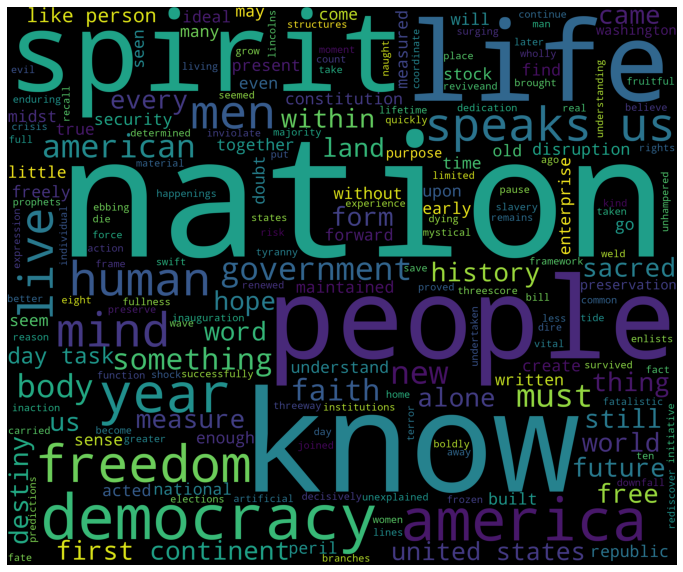

In [282]:
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(processed_roosevelt)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
printmd('**The word cloud of the speech by President Franklin D. Roosevelt in 1941:**')
plt.show()

**The word cloud of the speech by President John F. Kennedy in 1961:**

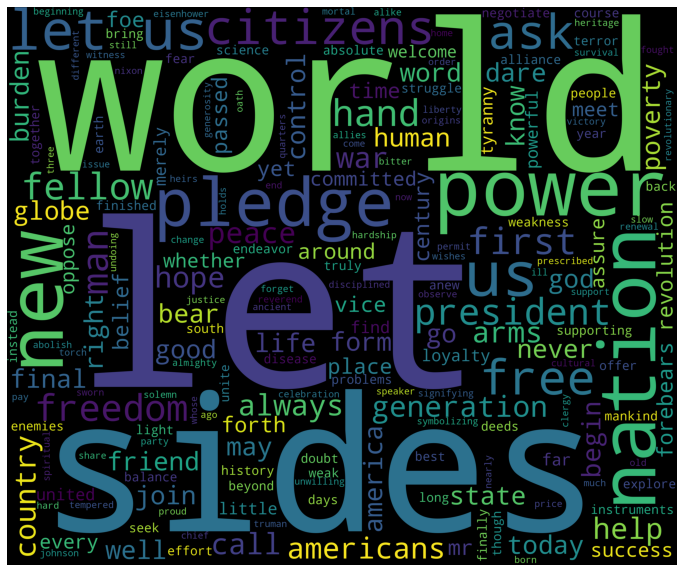

In [283]:
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(processed_kennedy)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
printmd('**The word cloud of the speech by President John F. Kennedy in 1961:**')
plt.show()

**The word cloud of the speech by President President Richard Nixon in 1973:**

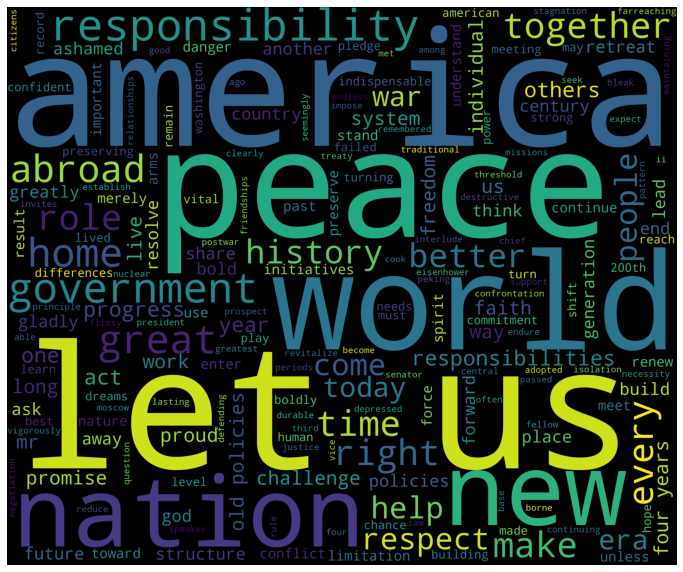

In [284]:
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(processed_nixon)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
printmd('**The word cloud of the speech by President President Richard Nixon in 1973:**')
plt.show()